In [1]:
#import ROOT

In [2]:
#ROOT.gSystem.Load("/data/km3net/Jpp/out/Linux/lib/liblang.so")
#ROOT.gSystem.Load("/data/km3net/Jpp/out/Linux/lib/libevtROOT.so")
#ROOT.gSystem.Load("/data/km3net/Jpp/out/Linux/lib/libtriggerROOT.so")
#ROOT.gSystem.Load("/data/km3net/Jpp/externals/install/lib/libKM3NeTROOT.so")

In [3]:
#f = ROOT.TFile.Open("/data/km3net/Jpp/data/processed_v2.root")
#f.ls()

In [4]:
#tree = f.Get("KM3NET_EVENT")
#if tree:
#    tree.Print()
#    tree.Show(0)

In [1]:
import uproot
#upf = uproot.open("/data/km3net/Jpp/data/processed_v2.root")
upf = uproot.open("/data/km3net/data/raw/raw-sea-KM3NeT_00000267-24-KM3NeT_00000267_00024678.root")
uptree = upf["KM3NET_EVENT"]

In [2]:
uptree.show(name_width=50,interpretation_width=120)

name                                               | typename                 | interpretation                                                                                                          
---------------------------------------------------+--------------------------+-------------------------------------------------------------------------------------------------------------------------
KM3NET_EVENT                                       | KM3NETDAQ::JDAQEvent     | AsGroup(<TBranchElement 'KM3NET_EVENT' (4 subbranches) at 0x7fe004bab6a0>, {'KM3NETDAQ::JDAQPreamble': <UnknownInterp...
KM3NET_EVENT/KM3NETDAQ::JDAQPreamble               | unknown                  | <UnknownInterpretation 'none of the rules matched'>
KM3NET_EVENT/KM3NETDAQ::JDAQEventHeader            | unknown                  | <UnknownInterpretation 'none of the rules matched'>
KM3NET_EVENT/triggeredHits                         | std::vector<KM3NETDAQ... | AsJagged(AsStridedObjects(Model_KM3NETDAQ_3a3a_JDAQTr

In [3]:
snapshot_hits = uptree["snapshotHits"].array(
    uproot.AsJagged(
        uproot.AsDtype(
                [
                    ("dom_id", ">i4"),
                    ("channel_id", "u1"),
                    ("time", "<u4"),
                    ("tot", "u1")
                ]
        ),
        header_bytes=10
    )
)

In [4]:
print(snapshot_hits)

[[{dom_id: 806460902, channel_id: 2, time: 89292668, tot: 18}, ..., {...}], ...]


In [5]:
print(len(snapshot_hits[0]))

819


In [6]:
triggered_hits = uptree["triggeredHits"].array(
    uproot.AsJagged(
        uproot.AsDtype(
            [
                ("dom_id", ">i4"),
                ("channel_id", "u1"),
                ("time", "<u4"),
                ("tot", "u1"),
                (" cnt", "u4"),
                (" vers", "u2"),
                ("trigger_mask", ">u8"),
            ]
        ),
        header_bytes=10
    )
)

In [7]:
print(triggered_hits)

[[{dom_id: 806460902, channel_id: 2, time: 89292668, tot: 18, ...}, ...], ...]


In [8]:
print(triggered_hits[0][:]["dom_id"])

[806460902, 806460902, 808474373, ..., 808976252, 808976252, 808976252]


In [9]:
print(len(triggered_hits[0]))

18


In [10]:
print(len(triggered_hits))

10000


In [11]:
headers = uptree["KM3NETDAQ::JDAQEventHeader"].array(
                uproot.interpretation.numerical.AsDtype(
                [
                    (" cnt7", "u4"),
                    (" cnt8", "u4"),
                    (" cnt", "u4"),
                    (" vers", "u2"),
                    (" cnt2", "u4"),
                    ("detector_id", ">i4"),
                    ("run", ">i4"),
                    ("frame_index", ">i4"),
                    (" vers2", "u2"),
                    (" cnt3", "u4"),
                    ("UTC_seconds", ">u4"),
                    ("UTC_16nanosecondcycles", ">u4"),
                    (" vers3", "u2"),                    
                    ("overlays", ">u4"),  
                    ("trigger_counter", ">u8"),
                    (" vers4", "u2"),
                    (" vers5", "u2"),   
                    (" vers6", "u2"), 
                    ("trigger_mask", ">u8"),
                    (" cnt9", "u4"), 
                ]
    )
)

In [12]:
print(headers)

[{' cnt7': 1207959616, ' cnt8': 4195072, ' cnt': 33563136, ...}, ..., {...}]


In [13]:
print(len(headers))

10000


In [14]:
print(headers[0])

{' cnt7': 1207959616, ' cnt8': 4195072, ' cnt': 33563136, ' vers': 64, ...}


In [15]:
for l in range(0,30):
   print("l = ",l,        
         headers[l]['detector_id'],
         headers[l]['run'], 
         headers[l]['frame_index'],
         headers[l]['UTC_seconds'], 
         headers[l]['UTC_16nanosecondcycles'],
         headers[l]['trigger_counter'],
         f"{headers[l]['trigger_mask']:08b}"
        )

l =  0 267 24678 2028 1755486202 50000000 0 00010100
l =  1 267 24678 2029 1755486202 56250000 0 00010100
l =  2 267 24678 2030 1755486203 0 0 00010100
l =  3 267 24678 2030 1755486203 0 1 00000100
l =  4 267 24678 2030 1755486203 0 2 00010000
l =  5 267 24678 2033 1755486203 18750000 0 00010110
l =  6 267 24678 2034 1755486203 25000000 0 00000100
l =  7 267 24678 2036 1755486203 37500000 0 00000100
l =  8 267 24678 2037 1755486203 43750000 0 00010010
l =  9 267 24678 2038 1755486203 50000000 0 00000100
l =  10 267 24678 2040 1755486204 0 0 00010100
l =  11 267 24678 2041 1755486204 6250000 0 00000100
l =  12 267 24678 2043 1755486204 18750000 0 00000100
l =  13 267 24678 2045 1755486204 31250000 0 00010000
l =  14 267 24678 2053 1755486205 18750000 0 00000100
l =  15 267 24678 2053 1755486205 18750000 1 00000100
l =  16 267 24678 2053 1755486205 18750000 2 00000100
l =  17 267 24678 2054 1755486205 25000000 0 00010110
l =  18 267 24678 2055 1755486205 31250000 0 00000100
l =  19 267 2

In [16]:
for i in triggered_hits[18]:
    print(f"{i['trigger_mask']:08b}")

00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100
00000100


In [17]:
for i in snapshot_hits[0]:
    print(i)

{dom_id: 806460902, channel_id: 2, time: 89292668, tot: 18}
{dom_id: 806460902, channel_id: 18, time: 89292676, tot: 27}
{dom_id: 806460902, channel_id: 21, time: 89296104, tot: 25}
{dom_id: 806460914, channel_id: 1, time: 89288478, tot: 25}
{dom_id: 806460914, channel_id: 1, time: 89289096, tot: 24}
{dom_id: 806460914, channel_id: 30, time: 89290748, tot: 26}
{dom_id: 806460914, channel_id: 8, time: 89293353, tot: 20}
{dom_id: 806463047, channel_id: 10, time: 89285934, tot: 28}
{dom_id: 806463047, channel_id: 10, time: 89285965, tot: 21}
{dom_id: 806463047, channel_id: 10, time: 89286260, tot: 29}
{dom_id: 806463047, channel_id: 10, time: 89286716, tot: 28}
{dom_id: 806463047, channel_id: 10, time: 89287059, tot: 20}
{dom_id: 806463047, channel_id: 10, time: 89290999, tot: 25}
{dom_id: 806463047, channel_id: 23, time: 89295527, tot: 26}
{dom_id: 806465110, channel_id: 12, time: 89288995, tot: 25}
{dom_id: 806465110, channel_id: 5, time: 89298161, tot: 20}
{dom_id: 806474791, channel_i

In [18]:
#import km3pipe as kp
#print(dir(kp))

In [19]:
#from km3pipe import io
#from km3pipe import tools
#from km3pipe import physics

In [20]:
#import km3io
#print(dir(km3io))

In [21]:
#from km3pipe.io.daq import DAQPreamble, DAQEvent
#from km3io.tools import is_3dshower, is_3dmuon, is_mxshower
#from km3modules.common import MemoryObserver
#import km3pipe.style

In [22]:
#detector = kp.hardware.Detector(det_id=267)

In [23]:
#detector.doms.values()

In [24]:
#detector.doms.items()

In [25]:
#print(detector.pmts)

In [26]:
#print(detector.version)

In [27]:
#print(detector.dom_ids)

In [28]:
#print(detector.pmt_angles)

In [29]:
#print(detector.dom_positions[808469948])

In [30]:
#print(detector.pmt_angles[0])

In [31]:
#print("{")
#for dom_id, dom_values in detector.doms.items():
#    print(f'"{dom_id}"',": ",list(dom_values),",")
#print("}")

In [32]:
# key "dom_id" :
#    string, floor, # of pmts, pos_x, pos_y, pos_z, dir_length, dir_x, dir_y, dir_z, status, t0 
# floor = 0 is the anchor location, not a dom (0.95m above Lake bed)
#267
dom_dict = {
"809503302" :  [1, 0, 0, -23.09, 49.68, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817606477" :  [1, 1, 31, -23.09, 49.68, 67.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595519" :  [1, 2, 31, -23.09, 49.68, 103.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597099" :  [1, 3, 31, -23.09, 49.68, 139.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569698" :  [1, 4, 31, -23.09, 49.68, 175.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595498" :  [1, 5, 31, -23.09, 49.68, 211.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569264" :  [1, 6, 31, -23.09, 49.68, 247.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649098" :  [1, 7, 31, -23.09, 49.68, 283.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"813672464" :  [1, 8, 31, -23.09, 49.68, 319.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649079" :  [1, 9, 31, -23.09, 49.68, 355.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608081" :  [1, 10, 31, -23.09, 49.68, 391.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806668470" :  [1, 11, 31, -23.09, 49.68, 427.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649097" :  [1, 12, 31, -23.09, 49.68, 463.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806611545" :  [1, 13, 31, -23.09, 49.68, 499.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806611619" :  [1, 14, 31, -23.09, 49.68, 535.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649080" :  [1, 15, 31, -23.09, 49.68, 571.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819752665" :  [1, 16, 31, -23.09, 49.68, 607.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819706738" :  [1, 17, 31, -23.09, 49.68, 643.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819853440" :  [1, 18, 31, -23.09, 49.68, 679.252, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565857" :  [3, 0, 0, 44.779, 86.729, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806611673" :  [3, 1, 31, 44.779, 86.729, 66.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806611292" :  [3, 2, 31, 44.779, 86.729, 102.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649061" :  [3, 3, 31, 44.779, 86.729, 138.27100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806657372" :  [3, 4, 31, 44.779, 86.729, 174.27100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649043" :  [3, 5, 31, 44.779, 86.729, 210.27100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649044" :  [3, 6, 31, 44.779, 86.729, 246.27100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806649117" :  [3, 7, 31, 44.779, 86.729, 282.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806611540" :  [3, 8, 31, 44.779, 86.729, 318.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819852785" :  [3, 9, 31, 44.779, 86.729, 354.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581778" :  [3, 10, 31, 44.779, 86.729, 390.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819737814" :  [3, 11, 31, 44.779, 86.729, 426.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819740048" :  [3, 12, 31, 44.779, 86.729, 462.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819737781" :  [3, 13, 31, 44.779, 86.729, 498.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819737799" :  [3, 14, 31, 44.779, 86.729, 534.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819737873" :  [3, 15, 31, 44.779, 86.729, 570.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819737832" :  [3, 16, 31, 44.779, 86.729, 606.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819814836" :  [3, 17, 31, 44.779, 86.729, 642.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819762610" :  [3, 18, 31, 44.779, 86.729, 678.271, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817563117" :  [4, 0, 0, -49.851, 138.069, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595516" :  [4, 1, 31, -49.851, 138.069, 67.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595465" :  [4, 2, 31, -49.851, 138.069, 103.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817603393" :  [4, 3, 31, -49.851, 138.069, 139.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597175" :  [4, 4, 31, -49.851, 138.069, 175.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595443" :  [4, 5, 31, -49.851, 138.069, 211.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817584016" :  [4, 6, 31, -49.851, 138.069, 247.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817584003" :  [4, 7, 31, -49.851, 138.069, 283.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817583908" :  [4, 8, 31, -49.851, 138.069, 319.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817606672" :  [4, 9, 31, -49.851, 138.069, 355.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595480" :  [4, 10, 31, -49.851, 138.069, 391.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597153" :  [4, 11, 31, -49.851, 138.069, 427.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569271" :  [4, 12, 31, -49.851, 138.069, 463.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565192" :  [4, 13, 31, -49.851, 138.069, 499.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817607140" :  [4, 14, 31, -49.851, 138.069, 535.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597227" :  [4, 15, 31, -49.851, 138.069, 571.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817606459" :  [4, 16, 31, -49.851, 138.069, 607.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597193" :  [4, 17, 31, -49.851, 138.069, 643.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595370" :  [4, 18, 31, -49.851, 138.069, 679.341, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565846" :  [5, 0, 0, -165.175, 91.838, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597102" :  [5, 1, 31, -165.175, 91.838, 68.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597135" :  [5, 2, 31, -165.175, 91.838, 104.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581894" :  [5, 3, 31, -165.175, 91.838, 140.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608176" :  [5, 4, 31, -165.175, 91.838, 176.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597117" :  [5, 5, 31, -165.175, 91.838, 212.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565751" :  [5, 6, 31, -165.175, 91.838, 248.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569720" :  [5, 7, 31, -165.175, 91.838, 284.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597172" :  [5, 8, 31, -165.175, 91.838, 320.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817589211" :  [5, 9, 31, -165.175, 91.838, 356.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595446" :  [5, 10, 31, -165.175, 91.838, 392.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817618826" :  [5, 11, 31, -165.175, 91.838, 428.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817607155" :  [5, 12, 31, -165.175, 91.838, 464.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595462" :  [5, 13, 31, -165.175, 91.838, 500.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817607122" :  [5, 14, 31, -165.175, 91.838, 536.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569253" :  [5, 15, 31, -165.175, 91.838, 572.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608086" :  [5, 16, 31, -165.175, 91.838, 608.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608171" :  [5, 17, 31, -165.175, 91.838, 644.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608117" :  [5, 18, 31, -165.175, 91.838, 680.072, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974724" :  [6, 0, 0, -167.612, -26.579, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817318104" :  [6, 1, 31, -167.612, -26.579, 74.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964808" :  [6, 2, 31, -167.612, -26.579, 110.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808447104" :  [6, 3, 31, -167.612, -26.579, 146.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971766" :  [6, 4, 31, -167.612, -26.579, 182.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808451689" :  [6, 5, 31, -167.612, -26.579, 218.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808947003" :  [6, 6, 31, -167.612, -26.579, 254.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808998824" :  [6, 7, 31, -167.612, -26.579, 290.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808953659" :  [6, 8, 31, -167.612, -26.579, 326.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976207" :  [6, 9, 31, -167.612, -26.579, 362.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817618810" :  [6, 10, 31, -167.612, -26.579, 398.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971633" :  [6, 11, 31, -167.612, -26.579, 434.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808983860" :  [6, 12, 31, -167.612, -26.579, 470.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808455493" :  [6, 13, 31, -167.612, -26.579, 506.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976293" :  [6, 14, 31, -167.612, -26.579, 542.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808956926" :  [6, 15, 31, -167.612, -26.579, 578.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976252" :  [6, 16, 31, -167.612, -26.579, 614.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971803" :  [6, 17, 31, -167.612, -26.579, 650.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474373" :  [6, 18, 31, -167.612, -26.579, 686.24, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808465916" :  [7, 0, 0, -59.66, -84.038, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817319003" :  [7, 1, 31, -59.66, -84.038, 73.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605302" :  [7, 2, 31, -59.66, -84.038, 109.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817589175" :  [7, 3, 31, -59.66, -84.038, 145.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608030" :  [7, 4, 31, -59.66, -84.038, 181.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819791082" :  [7, 5, 31, -59.66, -84.038, 217.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581949" :  [7, 6, 31, -59.66, -84.038, 253.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817589157" :  [7, 7, 31, -59.66, -84.038, 289.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569715" :  [7, 8, 31, -59.66, -84.038, 325.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605293" :  [7, 9, 31, -59.66, -84.038, 361.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817578090" :  [7, 10, 31, -59.66, -84.038, 397.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819740051" :  [7, 11, 31, -59.66, -84.038, 433.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581952" :  [7, 12, 31, -59.66, -84.038, 469.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819782401" :  [7, 13, 31, -59.66, -84.038, 505.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819713767" :  [7, 15, 31, -59.66, -84.038, 577.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806483357" :  [7, 16, 31, -59.66, -84.038, 613.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817589168" :  [7, 17, 31, -59.66, -84.038, 649.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819739797" :  [7, 18, 31, -59.66, -84.038, 685.019, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817563135" :  [8, 0, 0, 41.695, -28.116, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605786" :  [8, 1, 31, 41.695, -28.116, 67.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565802" :  [8, 2, 31, 41.695, -28.116, 103.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817563170" :  [8, 3, 31, 41.695, -28.116, 139.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565811" :  [8, 4, 31, 41.695, -28.116, 175.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608135" :  [8, 5, 31, 41.695, -28.116, 211.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608158" :  [8, 6, 31, 41.695, -28.116, 247.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565947" :  [8, 7, 31, 41.695, -28.116, 283.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608140" :  [8, 8, 31, 41.695, -28.116, 319.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817603883" :  [8, 9, 31, 41.695, -28.116, 355.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605768" :  [8, 10, 31, 41.695, -28.116, 391.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597792" :  [8, 11, 31, 41.695, -28.116, 427.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981267" :  [8, 12, 31, 41.695, -28.116, 463.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808472253" :  [8, 13, 31, 41.695, -28.116, 499.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976171" :  [8, 14, 31, 41.695, -28.116, 535.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809524545" :  [8, 15, 31, 41.695, -28.116, 571.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538794" :  [8, 16, 31, 41.695, -28.116, 607.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816943524" :  [8, 17, 31, 41.695, -28.116, 643.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816965930" :  [8, 18, 31, 41.695, -28.116, 679.774, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808469291" :  [9, 0, 0, 121.119, 110.588, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808992603" :  [9, 1, 31, 121.119, 110.588, 66.551, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974928" :  [9, 2, 31, 121.119, 110.588, 102.041, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808995481" :  [9, 3, 31, 121.119, 110.588, 139.891, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808966287" :  [9, 4, 31, 121.119, 110.588, 176.75099999999998, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808467569" :  [9, 5, 31, 121.119, 110.588, 214.25099999999998, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808430036" :  [9, 6, 31, 121.119, 110.588, 251.551, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808430571" :  [9, 7, 31, 121.119, 110.588, 288.381, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808996420" :  [9, 8, 31, 121.119, 110.588, 326.001, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987051" :  [9, 9, 31, 121.119, 110.588, 363.381, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808965918" :  [9, 10, 31, 121.119, 110.588, 400.181, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808447091" :  [9, 11, 31, 121.119, 110.588, 437.501, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808430449" :  [9, 12, 31, 121.119, 110.588, 474.661, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808468365" :  [9, 13, 31, 121.119, 110.588, 511.391, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987121" :  [9, 14, 31, 121.119, 110.588, 548.831, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474231" :  [9, 15, 31, 121.119, 110.588, 586.111, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809503299" :  [9, 16, 31, 121.119, 110.588, 622.431, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808972586" :  [9, 17, 31, 121.119, 110.588, 659.3910000000001, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982574" :  [9, 18, 31, 121.119, 110.588, 696.191, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808461200" :  [10, 0, 0, 51.392, 181.939, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984207" :  [10, 1, 31, 51.392, 181.939, 65.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474244" :  [10, 2, 31, 51.392, 181.939, 101.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808959403" :  [10, 3, 31, 51.392, 181.939, 137.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964322" :  [10, 4, 31, 51.392, 181.939, 173.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538805" :  [10, 5, 31, 51.392, 181.939, 209.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806468834" :  [10, 6, 31, 51.392, 181.939, 245.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964925" :  [10, 7, 31, 51.392, 181.939, 281.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474243" :  [10, 8, 31, 51.392, 181.939, 317.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808447066" :  [10, 9, 31, 51.392, 181.939, 353.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808978646" :  [10, 10, 31, 51.392, 181.939, 389.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984717" :  [10, 11, 31, 51.392, 181.939, 425.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984662" :  [10, 12, 31, 51.392, 181.939, 461.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808949990" :  [10, 13, 31, 51.392, 181.939, 497.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981369" :  [10, 14, 31, 51.392, 181.939, 533.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474602" :  [10, 15, 31, 51.392, 181.939, 569.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808977015" :  [10, 16, 31, 51.392, 181.939, 605.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961716" :  [10, 17, 31, 51.392, 181.939, 641.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808480486" :  [10, 18, 31, 51.392, 181.939, 677.049, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808469411" :  [11, 0, 0, -29.188, 213.238, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808992753" :  [11, 1, 31, -29.188, 213.238, 66.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808985796" :  [11, 2, 31, -29.188, 213.238, 102.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964913" :  [11, 3, 31, -29.188, 213.238, 138.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808447052" :  [11, 4, 31, -29.188, 213.238, 174.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808973936" :  [11, 5, 31, -29.188, 213.238, 210.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808960330" :  [11, 6, 31, -29.188, 213.238, 246.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964932" :  [11, 7, 31, -29.188, 213.238, 282.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808975010" :  [11, 8, 31, -29.188, 213.238, 318.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808978557" :  [11, 9, 31, -29.188, 213.238, 354.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808451783" :  [11, 10, 31, -29.188, 213.238, 390.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808986422" :  [11, 11, 31, -29.188, 213.238, 426.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809520652" :  [11, 12, 31, -29.188, 213.238, 462.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808946994" :  [11, 13, 31, -29.188, 213.238, 498.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976206" :  [11, 14, 31, -29.188, 213.238, 534.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808480525" :  [11, 15, 31, -29.188, 213.238, 570.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958322" :  [11, 16, 31, -29.188, 213.238, 606.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808440691" :  [11, 17, 31, -29.188, 213.238, 642.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808972605" :  [11, 18, 31, -29.188, 213.238, 678.576, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964754" :  [12, 0, 0, -142.339, 190.365, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538660" :  [12, 1, 31, -142.339, 190.365, 65.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808998401" :  [12, 2, 31, -142.339, 190.365, 101.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984610" :  [12, 3, 31, -142.339, 190.365, 137.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808432823" :  [12, 4, 31, -142.339, 190.365, 173.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808443733" :  [12, 5, 31, -142.339, 190.365, 209.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808455517" :  [12, 6, 31, -142.339, 190.365, 245.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971305" :  [12, 7, 31, -142.339, 190.365, 281.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808947505" :  [12, 8, 31, -142.339, 190.365, 317.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981121" :  [12, 9, 31, -142.339, 190.365, 353.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971936" :  [12, 10, 31, -142.339, 190.365, 389.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976232" :  [12, 11, 31, -142.339, 190.365, 425.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808960289" :  [12, 12, 31, -142.339, 190.365, 461.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808476725" :  [12, 13, 31, -142.339, 190.365, 497.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474593" :  [12, 14, 31, -142.339, 190.365, 533.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981503" :  [12, 15, 31, -142.339, 190.365, 569.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964876" :  [12, 16, 31, -142.339, 190.365, 605.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958588" :  [12, 17, 31, -142.339, 190.365, 641.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806451584" :  [12, 18, 31, -142.339, 190.365, 677.437, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474350" :  [13, 0, 0, 181.131, 130.018, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809003161" :  [13, 1, 31, 181.131, 130.018, 66.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974966" :  [13, 2, 31, 181.131, 130.018, 102.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808972346" :  [13, 3, 31, 181.131, 130.018, 138.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808465342" :  [13, 4, 31, 181.131, 130.018, 174.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808960452" :  [13, 5, 31, 181.131, 130.018, 210.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971937" :  [13, 6, 31, 181.131, 130.018, 246.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987005" :  [13, 7, 31, 181.131, 130.018, 282.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981211" :  [13, 8, 31, 181.131, 130.018, 318.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806459597" :  [13, 9, 31, 181.131, 130.018, 354.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808952499" :  [13, 10, 31, 181.131, 130.018, 390.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808993089" :  [13, 11, 31, 181.131, 130.018, 426.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981839" :  [13, 12, 31, 181.131, 130.018, 462.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958591" :  [13, 13, 31, 181.131, 130.018, 498.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808979723" :  [13, 14, 31, 181.131, 130.018, 534.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809520819" :  [13, 15, 31, 181.131, 130.018, 570.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971630" :  [13, 16, 31, 181.131, 130.018, 606.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958372" :  [13, 17, 31, 181.131, 130.018, 642.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808957378" :  [13, 18, 31, 181.131, 130.018, 678.31, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817607859" :  [14, 0, 0, 148.307, 199.178, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605775" :  [14, 1, 31, 148.307, 199.178, 62.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"813679125" :  [14, 2, 31, 148.307, 199.178, 98.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817603865" :  [14, 3, 31, 148.307, 199.178, 134.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817602920" :  [14, 4, 31, 148.307, 199.178, 170.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605238" :  [14, 5, 31, 148.307, 199.178, 206.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565893" :  [14, 6, 31, 148.307, 199.178, 242.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817603876" :  [14, 7, 31, 148.307, 199.178, 278.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605256" :  [14, 8, 31, 148.307, 199.178, 314.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608062" :  [14, 9, 31, 148.307, 199.178, 350.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608153" :  [14, 10, 31, 148.307, 199.178, 386.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605756" :  [14, 11, 31, 148.307, 199.178, 422.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565936" :  [14, 12, 31, 148.307, 199.178, 458.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817603894" :  [14, 13, 31, 148.307, 199.178, 494.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817603901" :  [14, 14, 31, 148.307, 199.178, 530.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817600816" :  [14, 15, 31, 148.307, 199.178, 566.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597157" :  [14, 16, 31, 148.307, 199.178, 602.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595410" :  [14, 17, 31, 148.307, 199.178, 638.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"813676374" :  [14, 18, 31, 148.307, 199.178, 674.824, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808465776" :  [15, 0, 0, 78.916, 262.728, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581915" :  [15, 1, 31, 78.916, 262.728, 64.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608122" :  [15, 2, 31, 78.916, 262.728, 100.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581879" :  [15, 3, 31, 78.916, 262.728, 136.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817600798" :  [15, 4, 31, 78.916, 262.728, 172.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817600801" :  [15, 5, 31, 78.916, 262.728, 208.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581800" :  [15, 6, 31, 78.916, 262.728, 244.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817605793" :  [15, 7, 31, 78.916, 262.728, 280.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817600819" :  [15, 8, 31, 78.916, 262.728, 316.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608048" :  [15, 9, 31, 78.916, 262.728, 352.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581796" :  [15, 10, 31, 78.916, 262.728, 388.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608012" :  [15, 11, 31, 78.916, 262.728, 424.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608025" :  [15, 12, 31, 78.916, 262.728, 460.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581897" :  [15, 13, 31, 78.916, 262.728, 496.714, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581838" :  [15, 14, 31, 78.916, 262.728, 532.7139999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817608007" :  [15, 15, 31, 78.916, 262.728, 568.7139999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581823" :  [15, 16, 31, 78.916, 262.728, 604.7139999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581861" :  [15, 17, 31, 78.916, 262.728, 640.7139999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817581876" :  [15, 18, 31, 78.916, 262.728, 676.7139999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565864" :  [16, 0, 0, -22.197, 295.303, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817620192" :  [16, 1, 31, -22.197, 295.303, 65.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595425" :  [16, 2, 31, -22.197, 295.303, 101.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817606442" :  [16, 3, 31, -22.197, 295.303, 137.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817612559" :  [16, 4, 31, -22.197, 295.303, 173.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565173" :  [16, 5, 31, -22.197, 295.303, 209.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817620193" :  [16, 6, 31, -22.197, 295.303, 245.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597212" :  [16, 7, 31, -22.197, 295.303, 281.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817606460" :  [16, 8, 31, -22.197, 295.303, 317.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817583890" :  [16, 9, 31, -22.197, 295.303, 353.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817309199" :  [16, 10, 31, -22.197, 295.303, 389.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817569719" :  [16, 11, 31, -22.197, 295.303, 425.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817616430" :  [16, 12, 31, -22.197, 295.303, 461.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595373" :  [16, 13, 31, -22.197, 295.303, 497.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565769" :  [16, 14, 31, -22.197, 295.303, 533.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817616429" :  [16, 15, 31, -22.197, 295.303, 569.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817595428" :  [16, 16, 31, -22.197, 295.303, 605.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817597230" :  [16, 17, 31, -22.197, 295.303, 641.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565754" :  [16, 18, 31, -22.197, 295.303, 677.398, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565882" :  [17, 0, 0, -111.422, 299.875, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816982359" :  [17, 1, 31, -111.422, 299.875, 64.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817803008" :  [17, 2, 31, -111.422, 299.875, 100.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816965069" :  [17, 3, 31, -111.422, 299.875, 136.04000000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816978595" :  [17, 4, 31, -111.422, 299.875, 172.04000000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817801283" :  [17, 5, 31, -111.422, 299.875, 208.04000000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816929974" :  [17, 6, 31, -111.422, 299.875, 244.04000000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816963601" :  [17, 7, 31, -111.422, 299.875, 280.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817802207" :  [17, 8, 31, -111.422, 299.875, 316.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816929954" :  [17, 9, 31, -111.422, 299.875, 352.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919166" :  [17, 10, 31, -111.422, 299.875, 388.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817801432" :  [17, 11, 31, -111.422, 299.875, 424.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816935868" :  [17, 12, 31, -111.422, 299.875, 460.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816963596" :  [17, 13, 31, -111.422, 299.875, 496.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817801419" :  [17, 14, 31, -111.422, 299.875, 532.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816928251" :  [17, 15, 31, -111.422, 299.875, 568.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816982347" :  [17, 16, 31, -111.422, 299.875, 604.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817801431" :  [17, 17, 31, -111.422, 299.875, 640.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816936594" :  [17, 18, 31, -111.422, 299.875, 676.04, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809520643" :  [18, 0, 0, 245.434, 220.301, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808489829" :  [18, 1, 31, 245.434, 220.301, 64.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808434118" :  [18, 2, 31, 245.434, 220.301, 100.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817299859" :  [18, 3, 31, 245.434, 220.301, 136.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808960454" :  [18, 4, 31, 245.434, 220.301, 172.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987583" :  [18, 5, 31, 245.434, 220.301, 208.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808956724" :  [18, 6, 31, 245.434, 220.301, 244.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808960478" :  [18, 7, 31, 245.434, 220.301, 280.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806460902" :  [18, 8, 31, 245.434, 220.301, 316.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808966350" :  [18, 9, 31, 245.434, 220.301, 352.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808979220" :  [18, 10, 31, 245.434, 220.301, 388.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984692" :  [18, 11, 31, 245.434, 220.301, 424.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808480499" :  [18, 12, 31, 245.434, 220.301, 460.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808437877" :  [18, 13, 31, 245.434, 220.301, 496.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809000516" :  [18, 14, 31, 245.434, 220.301, 532.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808947469" :  [18, 15, 31, 245.434, 220.301, 568.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964411" :  [18, 16, 31, 245.434, 220.301, 604.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808944706" :  [18, 17, 31, 245.434, 220.301, 640.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961200" :  [18, 18, 31, 245.434, 220.301, 676.35, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808435266" :  [19, 0, 0, 190.541, 292.041, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808437870" :  [19, 1, 31, 190.541, 292.041, 62.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991979" :  [19, 2, 31, 190.541, 292.041, 98.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809524437" :  [19, 3, 31, 190.541, 292.041, 134.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808998707" :  [19, 4, 31, 190.541, 292.041, 170.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809007638" :  [19, 5, 31, 190.541, 292.041, 206.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808966284" :  [19, 6, 31, 190.541, 292.041, 242.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808977515" :  [19, 7, 31, 190.541, 292.041, 278.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987075" :  [19, 8, 31, 190.541, 292.041, 314.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982042" :  [19, 9, 31, 190.541, 292.041, 350.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961396" :  [19, 10, 31, 190.541, 292.041, 386.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982571" :  [19, 11, 31, 190.541, 292.041, 422.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808443728" :  [19, 12, 31, 190.541, 292.041, 458.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808998502" :  [19, 13, 31, 190.541, 292.041, 494.78499999999997, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808447081" :  [19, 14, 31, 190.541, 292.041, 530.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808489105" :  [19, 15, 31, 190.541, 292.041, 566.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964895" :  [19, 16, 31, 190.541, 292.041, 602.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982006" :  [19, 17, 31, 190.541, 292.041, 638.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809548797" :  [19, 18, 31, 190.541, 292.041, 674.785, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565918" :  [20, 0, 0, 112.461, 339.074, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808491794" :  [20, 1, 31, 112.461, 339.074, 64.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808469556" :  [20, 2, 31, 112.461, 339.074, 100.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808972687" :  [20, 3, 31, 112.461, 339.074, 136.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806465110" :  [20, 4, 31, 112.461, 339.074, 172.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808979069" :  [20, 5, 31, 112.461, 339.074, 208.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987108" :  [20, 6, 31, 112.461, 339.074, 244.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808490690" :  [20, 7, 31, 112.461, 339.074, 280.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958923" :  [20, 8, 31, 112.461, 339.074, 316.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991960" :  [20, 9, 31, 112.461, 339.074, 352.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808437092" :  [20, 10, 31, 112.461, 339.074, 388.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808956870" :  [20, 11, 31, 112.461, 339.074, 424.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974726" :  [20, 12, 31, 112.461, 339.074, 460.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538769" :  [20, 13, 31, 112.461, 339.074, 496.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809548794" :  [20, 14, 31, 112.461, 339.074, 532.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806463047" :  [20, 15, 31, 112.461, 339.074, 568.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808956797" :  [20, 16, 31, 112.461, 339.074, 604.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981913" :  [20, 17, 31, 112.461, 339.074, 640.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808979692" :  [20, 18, 31, 112.461, 339.074, 676.877, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817565900" :  [21, 0, 0, 28.281, 365.855, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819006535" :  [21, 1, 31, 28.281, 365.855, 64.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919163" :  [21, 2, 31, 28.281, 365.855, 100.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817333853" :  [21, 3, 31, 28.281, 365.855, 136.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817801282" :  [21, 4, 31, 28.281, 365.855, 172.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816964122" :  [21, 5, 31, 28.281, 365.855, 208.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976351" :  [21, 6, 31, 28.281, 365.855, 244.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817804228" :  [21, 7, 31, 28.281, 365.855, 280.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816929914" :  [21, 8, 31, 28.281, 365.855, 316.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817302383" :  [21, 9, 31, 28.281, 365.855, 352.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817802374" :  [21, 10, 31, 28.281, 365.855, 388.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919151" :  [21, 11, 31, 28.281, 365.855, 424.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816929999" :  [21, 12, 31, 28.281, 365.855, 460.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817802231" :  [21, 13, 31, 28.281, 365.855, 496.368, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816930809" :  [21, 14, 31, 28.281, 365.855, 532.3679999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919154" :  [21, 15, 31, 28.281, 365.855, 568.3679999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819047388" :  [21, 16, 31, 28.281, 365.855, 604.3679999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816978576" :  [21, 17, 31, 28.281, 365.855, 640.3679999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816943531" :  [21, 18, 31, 28.281, 365.855, 676.3679999999999, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817563134" :  [22, 0, 0, -64.17, 396.589, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982550" :  [22, 1, 31, -64.17, 396.589, 62.891999999999996, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809006175" :  [22, 2, 31, -64.17, 396.589, 98.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964845" :  [22, 3, 31, -64.17, 396.589, 134.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808960476" :  [22, 4, 31, -64.17, 396.589, 170.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808978561" :  [22, 5, 31, -64.17, 396.589, 206.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991947" :  [22, 6, 31, -64.17, 396.589, 242.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987098" :  [22, 7, 31, -64.17, 396.589, 278.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991967" :  [22, 8, 31, -64.17, 396.589, 314.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987950" :  [22, 9, 31, -64.17, 396.589, 350.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991955" :  [22, 10, 31, -64.17, 396.589, 386.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809503407" :  [22, 11, 31, -64.17, 396.589, 422.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809526122" :  [22, 12, 31, -64.17, 396.589, 458.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808950076" :  [22, 13, 31, -64.17, 396.589, 494.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982608" :  [22, 14, 31, -64.17, 396.589, 530.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808430346" :  [22, 15, 31, -64.17, 396.589, 566.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808469399" :  [22, 16, 31, -64.17, 396.589, 602.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984598" :  [22, 17, 31, -64.17, 396.589, 638.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808977112" :  [22, 18, 31, -64.17, 396.589, 674.892, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808969872" :  [23, 0, 0, 310.449, 294.426, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808986392" :  [23, 1, 31, 310.449, 294.426, 62.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808979072" :  [23, 2, 31, 310.449, 294.426, 98.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808953666" :  [23, 3, 31, 310.449, 294.426, 134.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808957390" :  [23, 4, 31, 310.449, 294.426, 170.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538793" :  [23, 5, 31, 310.449, 294.426, 206.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808978706" :  [23, 6, 31, 310.449, 294.426, 242.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808967695" :  [23, 7, 31, 310.449, 294.426, 278.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808485247" :  [23, 8, 31, 310.449, 294.426, 314.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808959563" :  [23, 9, 31, 310.449, 294.426, 350.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987789" :  [23, 10, 31, 310.449, 294.426, 386.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808476713" :  [23, 11, 31, 310.449, 294.426, 422.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806460914" :  [23, 12, 31, 310.449, 294.426, 458.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808966047" :  [23, 13, 31, 310.449, 294.426, 494.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981223" :  [23, 14, 31, 310.449, 294.426, 530.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958239" :  [23, 15, 31, 310.449, 294.426, 566.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808994616" :  [23, 16, 31, 310.449, 294.426, 602.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808976340" :  [23, 17, 31, 310.449, 294.426, 638.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474361" :  [23, 18, 31, 310.449, 294.426, 674.625, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808451470" :  [24, 0, 0, 221.282, 386.244, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981131" :  [24, 1, 31, 221.282, 386.244, 62.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806474791" :  [24, 2, 31, 221.282, 386.244, 98.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991942" :  [24, 3, 31, 221.282, 386.244, 134.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982538" :  [24, 4, 31, 221.282, 386.244, 170.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808488845" :  [24, 5, 31, 221.282, 386.244, 206.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808991896" :  [24, 6, 31, 221.282, 386.244, 242.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808477017" :  [24, 7, 31, 221.282, 386.244, 278.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808957044" :  [24, 8, 31, 221.282, 386.244, 314.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981689" :  [24, 9, 31, 221.282, 386.244, 350.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961489" :  [24, 10, 31, 221.282, 386.244, 386.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808447025" :  [24, 11, 31, 221.282, 386.244, 422.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808493106" :  [24, 12, 31, 221.282, 386.244, 458.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982029" :  [24, 13, 31, 221.282, 386.244, 494.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981866" :  [24, 14, 31, 221.282, 386.244, 530.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808965415" :  [24, 15, 31, 221.282, 386.244, 566.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808461197" :  [24, 16, 31, 221.282, 386.244, 602.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809000713" :  [24, 17, 31, 221.282, 386.244, 638.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808474578" :  [24, 18, 31, 221.282, 386.244, 674.87, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808973241" :  [25, 0, 0, 180.736, 415.762, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817319004" :  [25, 1, 31, 180.736, 415.762, 63.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919142" :  [25, 2, 31, 180.736, 415.762, 99.36500000000001, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817802219" :  [25, 3, 31, 180.736, 415.762, 135.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816928405" :  [25, 4, 31, 180.736, 415.762, 171.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808959398" :  [25, 5, 31, 180.736, 415.762, 207.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819005766" :  [25, 6, 31, 180.736, 415.762, 243.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816982250" :  [25, 7, 31, 180.736, 415.762, 279.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817335809" :  [25, 8, 31, 180.736, 415.762, 315.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817802210" :  [25, 9, 31, 180.736, 415.762, 351.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919071" :  [25, 10, 31, 180.736, 415.762, 387.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816919701" :  [25, 11, 31, 180.736, 415.762, 423.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819047967" :  [25, 12, 31, 180.736, 415.762, 459.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817342973" :  [25, 13, 31, 180.736, 415.762, 495.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816978588" :  [25, 14, 31, 180.736, 415.762, 531.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817802243" :  [25, 15, 31, 180.736, 415.762, 567.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817344240" :  [25, 16, 31, 180.736, 415.762, 603.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816985715" :  [25, 17, 31, 180.736, 415.762, 639.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"819006150" :  [25, 18, 31, 180.736, 415.762, 675.365, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817563152" :  [26, 0, 0, 95.521, 449.964, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958576" :  [26, 1, 31, 95.521, 449.964, 63.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961256" :  [26, 2, 31, 95.521, 449.964, 99.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816982323" :  [26, 3, 31, 95.521, 449.964, 135.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809503404" :  [26, 4, 31, 95.521, 449.964, 171.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981087" :  [26, 5, 31, 95.521, 449.964, 207.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808467545" :  [26, 6, 31, 95.521, 449.964, 243.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808993088" :  [26, 7, 31, 95.521, 449.964, 279.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808972452" :  [26, 8, 31, 95.521, 449.964, 315.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981194" :  [26, 9, 31, 95.521, 449.964, 351.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808454973" :  [26, 10, 31, 95.521, 449.964, 387.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808972464" :  [26, 11, 31, 95.521, 449.964, 423.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808957385" :  [26, 12, 31, 95.521, 449.964, 459.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808958392" :  [26, 13, 31, 95.521, 449.964, 495.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974736" :  [26, 14, 31, 95.521, 449.964, 531.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808977563" :  [26, 15, 31, 95.521, 449.964, 567.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808967771" :  [26, 16, 31, 95.521, 449.964, 603.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961445" :  [26, 17, 31, 95.521, 449.964, 639.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806476519" :  [26, 18, 31, 95.521, 449.964, 675.638, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974794" :  [27, 0, 0, 5.57, 468.566, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809521474" :  [27, 1, 31, 5.57, 468.566, 63.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809526090" :  [27, 2, 31, 5.57, 468.566, 99.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809526102" :  [27, 3, 31, 5.57, 468.566, 135.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981118" :  [27, 4, 31, 5.57, 468.566, 171.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808998966" :  [27, 5, 31, 5.57, 468.566, 207.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971187" :  [27, 6, 31, 5.57, 468.566, 243.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808454978" :  [27, 7, 31, 5.57, 468.566, 279.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808974923" :  [27, 8, 31, 5.57, 468.566, 315.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981206" :  [27, 9, 31, 5.57, 468.566, 351.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808432824" :  [27, 10, 31, 5.57, 468.566, 387.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808455505" :  [27, 11, 31, 5.57, 468.566, 423.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808956995" :  [27, 12, 31, 5.57, 468.566, 459.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809524445" :  [27, 13, 31, 5.57, 468.566, 495.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817318099" :  [27, 14, 31, 5.57, 468.566, 531.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809003775" :  [27, 15, 31, 5.57, 468.566, 567.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808489022" :  [27, 16, 31, 5.57, 468.566, 603.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982706" :  [27, 17, 31, 5.57, 468.566, 639.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961501" :  [27, 18, 31, 5.57, 468.566, 675.006, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808445685" :  [28, 0, 0, -96.361, 465.787, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806455816" :  [28, 1, 31, -96.361, 465.787, 65.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808980070" :  [28, 2, 31, -96.361, 465.787, 101.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809004252" :  [28, 3, 31, -96.361, 465.787, 137.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808961667" :  [28, 4, 31, -96.361, 465.787, 173.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808964757" :  [28, 5, 31, -96.361, 465.787, 209.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808459160" :  [28, 6, 31, -96.361, 465.787, 245.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808988238" :  [28, 7, 31, -96.361, 465.787, 281.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808978582" :  [28, 8, 31, -96.361, 465.787, 317.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808997253" :  [28, 9, 31, -96.361, 465.787, 353.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808993592" :  [28, 10, 31, -96.361, 465.787, 389.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808947481" :  [28, 11, 31, -96.361, 465.787, 425.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808986771" :  [28, 12, 31, -96.361, 465.787, 461.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808993574" :  [28, 13, 31, -96.361, 465.787, 497.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808997240" :  [28, 14, 31, -96.361, 465.787, 533.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808468379" :  [28, 15, 31, -96.361, 465.787, 569.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817300799" :  [28, 16, 31, -96.361, 465.787, 605.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"806460825" :  [28, 17, 31, -96.361, 465.787, 641.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808985071" :  [28, 18, 31, -96.361, 465.787, 677.435, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817563153" :  [30, 0, 0, 233.196, 461.715, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817284819" :  [30, 1, 31, 233.196, 461.715, 63.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817305565" :  [30, 2, 31, 233.196, 461.715, 99.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817289081" :  [30, 3, 31, 233.196, 461.715, 135.77100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817320285" :  [30, 4, 31, 233.196, 461.715, 171.77100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817317541" :  [30, 5, 31, 233.196, 461.715, 207.77100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817312172" :  [30, 6, 31, 233.196, 461.715, 243.77100000000002, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817303742" :  [30, 7, 31, 233.196, 461.715, 279.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808451481" :  [30, 8, 31, 233.196, 461.715, 315.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817303685" :  [30, 9, 31, 233.196, 461.715, 351.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817295045" :  [30, 10, 31, 233.196, 461.715, 387.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817320316" :  [30, 11, 31, 233.196, 461.715, 423.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817293404" :  [30, 12, 31, 233.196, 461.715, 459.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817299473" :  [30, 13, 31, 233.196, 461.715, 495.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817319884" :  [30, 14, 31, 233.196, 461.715, 531.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817331186" :  [30, 15, 31, 233.196, 461.715, 567.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817297217" :  [30, 16, 31, 233.196, 461.715, 603.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817318910" :  [30, 17, 31, 233.196, 461.715, 639.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"817287557" :  [30, 18, 31, 233.196, 461.715, 675.771, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816982335" :  [31, 0, 0, 114.409, 525.099, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816982800" :  [31, 1, 31, 114.409, 525.099, 62.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808949646" :  [31, 2, 31, 114.409, 525.099, 98.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808483678" :  [31, 3, 31, 114.409, 525.099, 134.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808476737" :  [31, 4, 31, 114.409, 525.099, 170.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808945480" :  [31, 5, 31, 114.409, 525.099, 206.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982030" :  [31, 6, 31, 114.409, 525.099, 242.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808985283" :  [31, 7, 31, 114.409, 525.099, 278.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809004291" :  [31, 8, 31, 114.409, 525.099, 314.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808963189" :  [31, 9, 31, 114.409, 525.099, 350.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808968978" :  [31, 10, 31, 114.409, 525.099, 386.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982065" :  [31, 11, 31, 114.409, 525.099, 422.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809548770" :  [31, 12, 31, 114.409, 525.099, 458.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808949902" :  [31, 13, 31, 114.409, 525.099, 494.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808971989" :  [31, 14, 31, 114.409, 525.099, 530.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808945629" :  [31, 15, 31, 114.409, 525.099, 566.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808483667" :  [31, 16, 31, 114.409, 525.099, 602.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808432848" :  [31, 17, 31, 114.409, 525.099, 638.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808432849" :  [31, 18, 31, 114.409, 525.099, 674.888, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"816936205" :  [32, 0, 0, -40.85, 555.886, 0.0, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809526109" :  [32, 1, 31, -40.85, 555.886, 63.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808953148" :  [32, 2, 31, -40.85, 555.886, 99.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984603" :  [32, 3, 31, -40.85, 555.886, 135.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808981666" :  [32, 4, 31, -40.85, 555.886, 171.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808969038" :  [32, 5, 31, -40.85, 555.886, 207.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984753" :  [32, 6, 31, -40.85, 555.886, 243.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538637" :  [32, 7, 31, -40.85, 555.886, 279.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808985061" :  [32, 8, 31, -40.85, 555.886, 315.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808994524" :  [32, 9, 31, -40.85, 555.886, 351.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808489110" :  [32, 10, 31, -40.85, 555.886, 387.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"809538636" :  [32, 11, 31, -40.85, 555.886, 423.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808969475" :  [32, 12, 31, -40.85, 555.886, 459.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984591" :  [32, 13, 31, -40.85, 555.886, 495.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808986410" :  [32, 14, 31, -40.85, 555.886, 531.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808982611" :  [32, 15, 31, -40.85, 555.886, 567.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987063" :  [32, 16, 31, -40.85, 555.886, 603.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808987064" :  [32, 17, 31, -40.85, 555.886, 639.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
"808984586" :  [32, 18, 31, -40.85, 555.886, 675.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0] ,
}

In [33]:
print(dom_dict["808984586"])

[32, 18, 31, -40.85, 555.886, 675.753, 1.0, 0.0, 0.0, 0.0, 0, 0.0]


In [34]:
#print(detector.pmts)

In [35]:
# print nested dictionary
#print("{")
#for ipmt in range(len(detector.pmts.pmt_id)):
#    dom_id = detector.pmts.dom_id[ipmt]
#    channel_id = detector.pmts.channel_id[ipmt]
#    pos_x = detector.pmts.pos_x[ipmt]
#    pos_y = detector.pmts.pos_y[ipmt]
#    pos_z = detector.pmts.pos_z[ipmt]
#    dir_x = detector.pmts.dir_x[ipmt]
#    dir_y = detector.pmts.dir_y[ipmt]
#    dir_z = detector.pmts.dir_z[ipmt]
#    t0 = detector.pmts.t0[ipmt]
#    status = detector.pmts.status[ipmt]
#    pmt_list = []
#    pmt_list.append(pos_x)
#    pmt_list.append(pos_y)
#    pmt_list.append(pos_z)
#    pmt_list.append(dir_x)
#    pmt_list.append(dir_y)
#    pmt_list.append(dir_z)
#    pmt_list.append(t0)
#    pmt_list.append(status)
#    if (channel_id == 0):
#        print(f'"{dom_id}"',": {")
#    print(f'"{channel_id}"',": ",pmt_list,",")
#    if (channel_id == 30):
#        print("},")
#print("}")

In [36]:
# key "dom_id" : 
#    nested key "channel_id": pos_x, pos_y, pos_z, dir_x, dir_y, dir_z, t0, status
#267
pmt_dict = {
"817606477" : {
"0" :  [-23.09, 49.51363, 67.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 67.31099999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 67.31099999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 67.31099999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 67.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 67.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 67.31099999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 67.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 67.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 67.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 67.31099999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 67.31099999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 67.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 67.14099999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 67.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 67.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 67.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 67.14099999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 67.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 67.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 67.14099999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 67.14099999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 67.05199999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 67.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 67.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 67.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 67.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 67.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 67.14099999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 67.14099999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 67.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595519" : {
"0" :  [-23.09, 49.51363, 103.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 103.31099999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 103.31099999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 103.31099999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 103.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 103.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 103.31099999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 103.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 103.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 103.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 103.31099999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 103.31099999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 103.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 103.14099999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 103.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 103.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 103.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 103.14099999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 103.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 103.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 103.14099999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 103.14099999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 103.05199999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 103.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 103.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 103.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 103.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 103.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 103.14099999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 103.14099999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 103.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597099" : {
"0" :  [-23.09, 49.51363, 139.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 139.311, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 139.311, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 139.311, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 139.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 139.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 139.311, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 139.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 139.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 139.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 139.311, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 139.311, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 139.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 139.14100000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 139.08200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 139.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 139.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 139.14100000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 139.08200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 139.08200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 139.14100000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 139.14100000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 139.05200000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 139.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 139.08200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 139.08200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 139.08200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 139.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 139.14100000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 139.14100000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 139.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569698" : {
"0" :  [-23.09, 49.51363, 175.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 175.311, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 175.311, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 175.311, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 175.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 175.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 175.311, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 175.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 175.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 175.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 175.311, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 175.311, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 175.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 175.14100000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 175.08200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 175.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 175.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 175.14100000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 175.08200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 175.08200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 175.14100000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 175.14100000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 175.05200000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 175.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 175.08200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 175.08200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 175.08200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 175.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 175.14100000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 175.14100000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 175.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595498" : {
"0" :  [-23.09, 49.51363, 211.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 211.311, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 211.311, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 211.311, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 211.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 211.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 211.311, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 211.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 211.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 211.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 211.311, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 211.311, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 211.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 211.14100000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 211.08200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 211.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 211.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 211.14100000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 211.08200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 211.08200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 211.14100000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 211.14100000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 211.05200000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 211.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 211.08200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 211.08200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 211.08200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 211.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 211.14100000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 211.14100000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 211.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569264" : {
"0" :  [-23.09, 49.51363, 247.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 247.311, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 247.311, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 247.311, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 247.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 247.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 247.311, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 247.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 247.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 247.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 247.311, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 247.311, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 247.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 247.14100000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 247.08200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 247.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 247.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 247.14100000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 247.08200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 247.08200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 247.14100000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 247.14100000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 247.05200000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 247.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 247.08200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 247.08200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 247.08200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 247.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 247.14100000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 247.14100000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 247.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649098" : {
"0" :  [-23.09, 49.51363, 283.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 283.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 283.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 283.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 283.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 283.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 283.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 283.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 283.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 283.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 283.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 283.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 283.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 283.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 283.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 283.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 283.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 283.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 283.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 283.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 283.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 283.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 283.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 283.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 283.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 283.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 283.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 283.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 283.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 283.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 283.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"813672464" : {
"0" :  [-23.09, 49.51363, 319.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 319.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 319.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 319.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 319.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 319.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 319.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 319.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 319.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 319.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 319.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 319.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 319.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 319.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 319.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 319.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 319.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 319.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 319.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 319.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 319.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 319.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 319.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 319.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 319.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 319.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 319.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 319.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 319.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 319.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 319.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649079" : {
"0" :  [-23.09, 49.51363, 355.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 355.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 355.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 355.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 355.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 355.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 355.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 355.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 355.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 355.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 355.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 355.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 355.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 355.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 355.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 355.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 355.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 355.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 355.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 355.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 355.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 355.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 355.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 355.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 355.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 355.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 355.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 355.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 355.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 355.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 355.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608081" : {
"0" :  [-23.09, 49.51363, 391.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 391.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 391.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 391.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 391.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 391.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 391.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 391.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 391.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 391.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 391.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 391.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 391.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 391.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 391.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 391.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 391.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 391.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 391.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 391.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 391.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 391.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 391.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 391.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 391.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 391.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 391.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 391.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 391.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 391.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 391.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806668470" : {
"0" :  [-23.09, 49.51363, 427.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 427.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 427.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 427.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 427.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 427.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 427.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 427.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 427.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 427.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 427.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 427.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 427.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 427.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 427.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 427.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 427.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 427.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 427.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 427.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 427.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 427.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 427.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 427.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 427.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 427.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 427.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 427.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 427.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 427.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 427.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649097" : {
"0" :  [-23.09, 49.51363, 463.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 463.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 463.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 463.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 463.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 463.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 463.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 463.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 463.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 463.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 463.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 463.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 463.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 463.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 463.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 463.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 463.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 463.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 463.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 463.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 463.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 463.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 463.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 463.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 463.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 463.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 463.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 463.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 463.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 463.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 463.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806611545" : {
"0" :  [-23.09, 49.51363, 499.363, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 499.31100000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 499.31100000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 499.31100000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 499.363, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 499.363, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 499.31100000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 499.363, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 499.363, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 499.363, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 499.31100000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 499.31100000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 499.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 499.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 499.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 499.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 499.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 499.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 499.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 499.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 499.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 499.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 499.052, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 499.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 499.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 499.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 499.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 499.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 499.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 499.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 499.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806611619" : {
"0" :  [-23.09, 49.51363, 535.3629999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 535.3109999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 535.3109999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 535.3109999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 535.3629999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 535.3629999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 535.3109999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 535.3629999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 535.3629999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 535.3629999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 535.3109999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 535.3109999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 535.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 535.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 535.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 535.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 535.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 535.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 535.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 535.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 535.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 535.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 535.0519999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 535.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 535.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 535.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 535.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 535.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 535.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 535.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 535.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649080" : {
"0" :  [-23.09, 49.51363, 571.3629999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 571.3109999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 571.3109999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 571.3109999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 571.3629999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 571.3629999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 571.3109999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 571.3629999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 571.3629999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 571.3629999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 571.3109999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 571.3109999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 571.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 571.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 571.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 571.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 571.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 571.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 571.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 571.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 571.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 571.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 571.0519999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 571.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 571.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 571.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 571.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 571.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 571.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 571.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 571.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819752665" : {
"0" :  [-23.09, 49.51363, 607.3629999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 607.3109999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 607.3109999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 607.3109999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 607.3629999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 607.3629999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 607.3109999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 607.3629999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 607.3629999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 607.3629999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 607.3109999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 607.3109999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 607.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 607.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 607.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 607.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 607.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 607.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 607.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 607.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 607.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 607.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 607.0519999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 607.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 607.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 607.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 607.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 607.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 607.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 607.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 607.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819706738" : {
"0" :  [-23.09, 49.51363, 643.3629999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 643.3109999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 643.3109999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 643.3109999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 643.3629999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 643.3629999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 643.3109999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 643.3629999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 643.3629999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 643.3629999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 643.3109999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 643.3109999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 643.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 643.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 643.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 643.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 643.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 643.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 643.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 643.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 643.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 643.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 643.0519999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 643.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 643.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 643.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 643.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 643.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 643.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 643.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 643.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819853440" : {
"0" :  [-23.09, 49.51363, 679.3629999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-23.2811, 49.68, 679.3109999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-23.18555, 49.5145, 679.3109999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.99445, 49.5145, 679.3109999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.94592, 49.59681, 679.3629999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-23.23408, 49.59681, 679.3629999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.8989, 49.68, 679.3109999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-23.23408, 49.76319, 679.3629999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.94592, 49.76319, 679.3629999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-23.09, 49.84637, 679.3629999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.99445, 49.8455, 679.3109999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-23.18555, 49.8455, 679.3109999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-23.09, 49.8711, 679.193, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-23.00681, 49.82408, 679.141, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-23.09, 49.78536, 679.082, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.9245, 49.77555, 679.193, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-23.2555, 49.77555, 679.193, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-23.173189999999998, 49.82408, 679.141, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-23.18124, 49.73268, 679.082, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.99876, 49.73268, 679.082, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-23.25637, 49.68, 679.141, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.92363, 49.68, 679.141, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-23.09, 49.68, 679.0519999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.9245, 49.58445, 679.193, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-23.09, 49.57464, 679.082, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.99876, 49.62732, 679.082, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-23.18124, 49.62732, 679.082, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-23.2555, 49.58445, 679.193, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-23.173189999999998, 49.53592, 679.141, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-23.00681, 49.53592, 679.141, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-23.09, 49.4889, 679.193, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806611673" : {
"0" :  [44.779, 86.56263, 66.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 66.33, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 66.33, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 66.33, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 66.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 66.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 66.33, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 66.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 66.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 66.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 66.33, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 66.33, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 66.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 66.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 66.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 66.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 66.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 66.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 66.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 66.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 66.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 66.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 66.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 66.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 66.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 66.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 66.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 66.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 66.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 66.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 66.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806611292" : {
"0" :  [44.779, 86.56263, 102.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 102.33, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 102.33, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 102.33, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 102.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 102.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 102.33, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 102.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 102.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 102.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 102.33, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 102.33, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 102.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 102.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 102.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 102.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 102.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 102.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 102.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 102.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 102.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 102.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 102.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 102.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 102.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 102.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 102.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 102.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 102.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 102.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 102.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649061" : {
"0" :  [44.779, 86.56263, 138.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 138.33, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 138.33, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 138.33, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 138.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 138.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 138.33, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 138.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 138.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 138.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 138.33, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 138.33, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 138.21200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 138.16000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 138.10100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 138.21200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 138.21200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 138.16000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 138.10100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 138.10100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 138.16000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 138.16000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 138.07100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 138.21200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 138.10100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 138.10100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 138.10100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 138.21200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 138.16000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 138.16000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 138.21200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806657372" : {
"0" :  [44.779, 86.56263, 174.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 174.33, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 174.33, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 174.33, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 174.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 174.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 174.33, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 174.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 174.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 174.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 174.33, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 174.33, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 174.21200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 174.16000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 174.10100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 174.21200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 174.21200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 174.16000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 174.10100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 174.10100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 174.16000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 174.16000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 174.07100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 174.21200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 174.10100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 174.10100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 174.10100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 174.21200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 174.16000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 174.16000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 174.21200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649043" : {
"0" :  [44.779, 86.56263, 210.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 210.33, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 210.33, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 210.33, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 210.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 210.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 210.33, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 210.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 210.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 210.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 210.33, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 210.33, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 210.21200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 210.16000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 210.10100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 210.21200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 210.21200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 210.16000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 210.10100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 210.10100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 210.16000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 210.16000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 210.07100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 210.21200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 210.10100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 210.10100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 210.10100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 210.21200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 210.16000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 210.16000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 210.21200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649044" : {
"0" :  [44.779, 86.56263, 246.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 246.33, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 246.33, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 246.33, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 246.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 246.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 246.33, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 246.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 246.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 246.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 246.33, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 246.33, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 246.21200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 246.16000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 246.10100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 246.21200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 246.21200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 246.16000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 246.10100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 246.10100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 246.16000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 246.16000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 246.07100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 246.21200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 246.10100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 246.10100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 246.10100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 246.21200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 246.16000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 246.16000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 246.21200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806649117" : {
"0" :  [44.779, 86.56263, 282.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 282.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 282.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 282.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 282.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 282.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 282.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 282.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 282.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 282.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 282.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 282.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 282.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 282.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 282.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 282.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 282.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 282.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 282.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 282.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 282.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 282.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 282.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 282.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 282.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 282.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 282.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 282.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 282.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 282.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 282.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806611540" : {
"0" :  [44.779, 86.56263, 318.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 318.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 318.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 318.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 318.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 318.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 318.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 318.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 318.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 318.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 318.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 318.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 318.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 318.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 318.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 318.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 318.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 318.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 318.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 318.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 318.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 318.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 318.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 318.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 318.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 318.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 318.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 318.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 318.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 318.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 318.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819852785" : {
"0" :  [44.779, 86.56263, 354.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 354.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 354.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 354.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 354.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 354.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 354.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 354.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 354.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 354.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 354.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 354.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 354.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 354.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 354.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 354.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 354.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 354.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 354.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 354.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 354.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 354.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 354.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 354.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 354.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 354.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 354.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 354.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 354.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 354.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 354.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581778" : {
"0" :  [44.779, 86.56263, 390.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 390.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 390.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 390.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 390.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 390.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 390.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 390.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 390.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 390.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 390.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 390.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 390.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 390.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 390.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 390.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 390.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 390.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 390.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 390.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 390.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 390.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 390.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 390.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 390.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 390.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 390.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 390.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 390.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 390.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 390.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819737814" : {
"0" :  [44.779, 86.56263, 426.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 426.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 426.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 426.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 426.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 426.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 426.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 426.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 426.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 426.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 426.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 426.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 426.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 426.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 426.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 426.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 426.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 426.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 426.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 426.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 426.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 426.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 426.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 426.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 426.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 426.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 426.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 426.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 426.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 426.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 426.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819740048" : {
"0" :  [44.779, 86.56263, 462.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 462.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 462.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 462.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 462.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 462.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 462.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 462.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 462.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 462.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 462.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 462.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 462.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 462.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 462.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 462.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 462.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 462.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 462.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 462.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 462.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 462.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 462.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 462.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 462.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 462.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 462.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 462.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 462.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 462.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 462.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819737781" : {
"0" :  [44.779, 86.56263, 498.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 498.33000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 498.33000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 498.33000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 498.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 498.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 498.33000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 498.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 498.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 498.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 498.33000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 498.33000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 498.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 498.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 498.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 498.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 498.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 498.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 498.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 498.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 498.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 498.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 498.071, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 498.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 498.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 498.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 498.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 498.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 498.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 498.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 498.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819737799" : {
"0" :  [44.779, 86.56263, 534.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 534.3299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 534.3299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 534.3299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 534.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 534.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 534.3299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 534.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 534.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 534.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 534.3299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 534.3299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 534.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 534.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 534.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 534.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 534.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 534.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 534.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 534.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 534.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 534.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 534.0709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 534.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 534.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 534.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 534.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 534.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 534.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 534.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 534.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819737873" : {
"0" :  [44.779, 86.56263, 570.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 570.3299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 570.3299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 570.3299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 570.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 570.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 570.3299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 570.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 570.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 570.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 570.3299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 570.3299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 570.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 570.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 570.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 570.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 570.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 570.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 570.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 570.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 570.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 570.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 570.0709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 570.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 570.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 570.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 570.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 570.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 570.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 570.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 570.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819737832" : {
"0" :  [44.779, 86.56263, 606.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 606.3299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 606.3299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 606.3299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 606.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 606.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 606.3299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 606.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 606.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 606.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 606.3299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 606.3299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 606.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 606.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 606.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 606.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 606.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 606.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 606.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 606.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 606.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 606.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 606.0709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 606.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 606.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 606.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 606.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 606.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 606.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 606.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 606.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819814836" : {
"0" :  [44.779, 86.56263, 642.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 642.3299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 642.3299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 642.3299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 642.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 642.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 642.3299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 642.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 642.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 642.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 642.3299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 642.3299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 642.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 642.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 642.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 642.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 642.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 642.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 642.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 642.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 642.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 642.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 642.0709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 642.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 642.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 642.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 642.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 642.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 642.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 642.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 642.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819762610" : {
"0" :  [44.779, 86.56263, 678.382, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [44.587900000000005, 86.729, 678.3299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [44.68345, 86.5635, 678.3299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [44.874550000000006, 86.5635, 678.3299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [44.923080000000006, 86.64581, 678.382, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [44.63492, 86.64581, 678.382, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [44.9701, 86.729, 678.3299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [44.63492, 86.81219, 678.382, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [44.923080000000006, 86.81219, 678.382, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [44.779, 86.89537, 678.382, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [44.874550000000006, 86.8945, 678.3299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [44.68345, 86.8945, 678.3299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [44.779, 86.9201, 678.212, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [44.862190000000005, 86.87308, 678.16, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [44.779, 86.83436, 678.101, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [44.944500000000005, 86.82455, 678.212, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [44.6135, 86.82455, 678.212, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [44.69581, 86.87308, 678.16, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [44.687760000000004, 86.78168, 678.101, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [44.87024, 86.78168, 678.101, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [44.61263, 86.729, 678.16, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [44.945370000000004, 86.729, 678.16, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [44.779, 86.729, 678.0709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [44.944500000000005, 86.63345, 678.212, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [44.779, 86.62364, 678.101, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [44.87024, 86.67632, 678.101, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [44.687760000000004, 86.67632, 678.101, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [44.6135, 86.63345, 678.212, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [44.69581, 86.58492, 678.16, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [44.862190000000005, 86.58492, 678.16, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [44.779, 86.5379, 678.212, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595516" : {
"0" :  [-49.851, 137.90263, 67.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 67.39999999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 67.39999999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 67.39999999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 67.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 67.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 67.39999999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 67.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 67.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 67.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 67.39999999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 67.39999999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 67.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 67.22999999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 67.17099999999999, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 67.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 67.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 67.22999999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 67.17099999999999, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 67.17099999999999, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 67.22999999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 67.22999999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 67.14099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 67.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 67.17099999999999, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 67.17099999999999, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 67.17099999999999, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 67.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 67.22999999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 67.22999999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 67.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595465" : {
"0" :  [-49.851, 137.90263, 103.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 103.39999999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 103.39999999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 103.39999999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 103.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 103.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 103.39999999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 103.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 103.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 103.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 103.39999999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 103.39999999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 103.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 103.22999999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 103.17099999999999, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 103.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 103.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 103.22999999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 103.17099999999999, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 103.17099999999999, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 103.22999999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 103.22999999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 103.14099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 103.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 103.17099999999999, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 103.17099999999999, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 103.17099999999999, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 103.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 103.22999999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 103.22999999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 103.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817603393" : {
"0" :  [-49.851, 137.90263, 139.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 139.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 139.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 139.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 139.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 139.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 139.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 139.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 139.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 139.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 139.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 139.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 139.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 139.23000000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 139.17100000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 139.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 139.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 139.23000000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 139.17100000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 139.17100000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 139.23000000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 139.23000000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 139.14100000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 139.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 139.17100000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 139.17100000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 139.17100000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 139.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 139.23000000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 139.23000000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 139.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597175" : {
"0" :  [-49.851, 137.90263, 175.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 175.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 175.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 175.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 175.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 175.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 175.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 175.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 175.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 175.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 175.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 175.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 175.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 175.23000000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 175.17100000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 175.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 175.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 175.23000000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 175.17100000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 175.17100000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 175.23000000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 175.23000000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 175.14100000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 175.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 175.17100000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 175.17100000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 175.17100000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 175.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 175.23000000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 175.23000000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 175.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595443" : {
"0" :  [-49.851, 137.90263, 211.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 211.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 211.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 211.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 211.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 211.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 211.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 211.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 211.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 211.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 211.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 211.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 211.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 211.23000000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 211.17100000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 211.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 211.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 211.23000000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 211.17100000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 211.17100000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 211.23000000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 211.23000000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 211.14100000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 211.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 211.17100000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 211.17100000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 211.17100000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 211.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 211.23000000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 211.23000000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 211.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817584016" : {
"0" :  [-49.851, 137.90263, 247.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 247.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 247.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 247.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 247.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 247.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 247.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 247.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 247.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 247.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 247.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 247.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 247.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 247.23000000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 247.17100000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 247.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 247.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 247.23000000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 247.17100000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 247.17100000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 247.23000000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 247.23000000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 247.14100000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 247.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 247.17100000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 247.17100000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 247.17100000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 247.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 247.23000000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 247.23000000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 247.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817584003" : {
"0" :  [-49.851, 137.90263, 283.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 283.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 283.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 283.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 283.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 283.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 283.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 283.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 283.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 283.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 283.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 283.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 283.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 283.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 283.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 283.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 283.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 283.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 283.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 283.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 283.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 283.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 283.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 283.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 283.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 283.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 283.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 283.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 283.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 283.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 283.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817583908" : {
"0" :  [-49.851, 137.90263, 319.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 319.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 319.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 319.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 319.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 319.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 319.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 319.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 319.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 319.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 319.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 319.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 319.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 319.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 319.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 319.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 319.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 319.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 319.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 319.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 319.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 319.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 319.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 319.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 319.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 319.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 319.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 319.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 319.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 319.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 319.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817606672" : {
"0" :  [-49.851, 137.90263, 355.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 355.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 355.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 355.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 355.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 355.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 355.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 355.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 355.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 355.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 355.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 355.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 355.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 355.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 355.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 355.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 355.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 355.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 355.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 355.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 355.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 355.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 355.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 355.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 355.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 355.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 355.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 355.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 355.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 355.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 355.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595480" : {
"0" :  [-49.851, 137.90263, 391.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 391.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 391.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 391.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 391.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 391.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 391.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 391.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 391.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 391.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 391.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 391.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 391.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 391.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 391.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 391.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 391.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 391.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 391.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 391.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 391.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 391.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 391.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 391.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 391.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 391.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 391.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 391.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 391.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 391.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 391.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597153" : {
"0" :  [-49.851, 137.90263, 427.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 427.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 427.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 427.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 427.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 427.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 427.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 427.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 427.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 427.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 427.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 427.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 427.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 427.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 427.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 427.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 427.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 427.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 427.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 427.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 427.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 427.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 427.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 427.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 427.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 427.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 427.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 427.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 427.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 427.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 427.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569271" : {
"0" :  [-49.851, 137.90263, 463.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 463.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 463.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 463.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 463.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 463.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 463.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 463.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 463.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 463.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 463.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 463.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 463.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 463.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 463.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 463.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 463.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 463.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 463.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 463.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 463.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 463.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 463.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 463.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 463.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 463.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 463.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 463.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 463.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 463.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 463.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565192" : {
"0" :  [-49.851, 137.90263, 499.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 499.40000000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 499.40000000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 499.40000000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 499.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 499.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 499.40000000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 499.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 499.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 499.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 499.40000000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 499.40000000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 499.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 499.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 499.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 499.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 499.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 499.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 499.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 499.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 499.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 499.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 499.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 499.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 499.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 499.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 499.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 499.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 499.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 499.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 499.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817607140" : {
"0" :  [-49.851, 137.90263, 535.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 535.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 535.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 535.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 535.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 535.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 535.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 535.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 535.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 535.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 535.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 535.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 535.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 535.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 535.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 535.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 535.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 535.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 535.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 535.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 535.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 535.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 535.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 535.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 535.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 535.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 535.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 535.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 535.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 535.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 535.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597227" : {
"0" :  [-49.851, 137.90263, 571.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 571.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 571.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 571.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 571.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 571.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 571.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 571.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 571.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 571.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 571.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 571.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 571.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 571.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 571.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 571.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 571.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 571.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 571.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 571.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 571.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 571.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 571.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 571.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 571.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 571.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 571.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 571.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 571.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 571.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 571.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817606459" : {
"0" :  [-49.851, 137.90263, 607.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 607.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 607.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 607.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 607.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 607.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 607.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 607.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 607.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 607.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 607.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 607.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 607.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 607.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 607.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 607.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 607.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 607.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 607.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 607.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 607.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 607.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 607.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 607.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 607.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 607.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 607.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 607.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 607.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 607.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 607.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597193" : {
"0" :  [-49.851, 137.90263, 643.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 643.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 643.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 643.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 643.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 643.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 643.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 643.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 643.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 643.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 643.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 643.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 643.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 643.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 643.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 643.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 643.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 643.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 643.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 643.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 643.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 643.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 643.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 643.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 643.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 643.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 643.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 643.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 643.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 643.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 643.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595370" : {
"0" :  [-49.851, 137.90263, 679.452, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-50.0421, 138.069, 679.4, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-49.94655, 137.90349999999998, 679.4, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-49.755449999999996, 137.90349999999998, 679.4, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-49.70692, 137.98581, 679.452, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-49.99508, 137.98581, 679.452, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-49.6599, 138.069, 679.4, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-49.99508, 138.15219, 679.452, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-49.70692, 138.15219, 679.452, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-49.851, 138.23537, 679.452, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-49.755449999999996, 138.2345, 679.4, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-49.94655, 138.2345, 679.4, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-49.851, 138.2601, 679.282, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-49.76781, 138.21308, 679.23, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-49.851, 138.17435999999998, 679.171, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-49.6855, 138.16455, 679.282, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-50.0165, 138.16455, 679.282, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-49.93419, 138.21308, 679.23, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-49.94224, 138.12168, 679.171, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-49.75976, 138.12168, 679.171, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-50.01737, 138.069, 679.23, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-49.68463, 138.069, 679.23, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-49.851, 138.069, 679.141, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-49.6855, 137.97344999999999, 679.282, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-49.851, 137.96364, 679.171, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-49.75976, 138.01631999999998, 679.171, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-49.94224, 138.01631999999998, 679.171, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-50.0165, 137.97344999999999, 679.282, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-49.93419, 137.92492, 679.23, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-49.76781, 137.92492, 679.23, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-49.851, 137.87789999999998, 679.282, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597102" : {
"0" :  [-165.175, 91.67163, 68.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 68.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 68.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 68.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 68.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 68.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 68.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 68.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 68.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 68.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 68.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 68.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 68.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 67.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 67.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 68.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 68.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 67.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 67.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 67.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 67.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 67.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 67.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 68.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 67.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 67.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 67.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 68.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 67.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 67.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 68.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597135" : {
"0" :  [-165.175, 91.67163, 104.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 104.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 104.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 104.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 104.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 104.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 104.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 104.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 104.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 104.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 104.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 104.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 104.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 103.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 103.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 104.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 104.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 103.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 103.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 103.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 103.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 103.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 103.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 104.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 103.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 103.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 103.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 104.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 103.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 103.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 104.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581894" : {
"0" :  [-165.175, 91.67163, 140.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 140.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 140.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 140.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 140.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 140.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 140.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 140.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 140.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 140.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 140.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 140.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 140.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 139.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 139.90200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 140.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 140.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 139.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 139.90200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 139.90200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 139.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 139.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 139.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 140.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 139.90200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 139.90200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 139.90200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 140.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 139.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 139.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 140.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608176" : {
"0" :  [-165.175, 91.67163, 176.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 176.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 176.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 176.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 176.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 176.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 176.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 176.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 176.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 176.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 176.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 176.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 176.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 175.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 175.90200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 176.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 176.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 175.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 175.90200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 175.90200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 175.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 175.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 175.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 176.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 175.90200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 175.90200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 175.90200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 176.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 175.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 175.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 176.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597117" : {
"0" :  [-165.175, 91.67163, 212.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 212.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 212.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 212.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 212.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 212.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 212.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 212.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 212.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 212.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 212.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 212.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 212.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 211.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 211.90200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 212.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 212.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 211.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 211.90200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 211.90200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 211.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 211.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 211.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 212.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 211.90200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 211.90200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 211.90200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 212.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 211.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 211.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 212.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565751" : {
"0" :  [-165.175, 91.67163, 248.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 248.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 248.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 248.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 248.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 248.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 248.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 248.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 248.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 248.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 248.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 248.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 248.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 247.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 247.90200000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 248.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 248.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 247.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 247.90200000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 247.90200000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 247.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 247.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 247.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 248.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 247.90200000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 247.90200000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 247.90200000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 248.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 247.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 247.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 248.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569720" : {
"0" :  [-165.175, 91.67163, 284.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 284.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 284.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 284.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 284.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 284.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 284.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 284.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 284.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 284.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 284.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 284.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 284.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 283.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 283.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 284.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 284.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 283.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 283.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 283.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 283.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 283.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 283.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 284.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 283.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 283.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 283.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 284.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 283.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 283.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 284.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597172" : {
"0" :  [-165.175, 91.67163, 320.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 320.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 320.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 320.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 320.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 320.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 320.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 320.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 320.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 320.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 320.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 320.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 320.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 319.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 319.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 320.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 320.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 319.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 319.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 319.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 319.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 319.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 319.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 320.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 319.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 319.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 319.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 320.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 319.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 319.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 320.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817589211" : {
"0" :  [-165.175, 91.67163, 356.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 356.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 356.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 356.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 356.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 356.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 356.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 356.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 356.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 356.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 356.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 356.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 356.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 355.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 355.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 356.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 356.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 355.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 355.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 355.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 355.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 355.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 355.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 356.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 355.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 355.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 355.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 356.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 355.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 355.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 356.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595446" : {
"0" :  [-165.175, 91.67163, 392.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 392.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 392.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 392.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 392.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 392.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 392.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 392.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 392.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 392.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 392.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 392.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 392.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 391.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 391.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 392.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 392.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 391.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 391.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 391.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 391.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 391.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 391.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 392.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 391.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 391.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 391.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 392.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 391.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 391.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 392.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817618826" : {
"0" :  [-165.175, 91.67163, 428.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 428.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 428.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 428.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 428.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 428.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 428.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 428.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 428.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 428.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 428.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 428.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 428.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 427.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 427.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 428.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 428.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 427.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 427.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 427.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 427.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 427.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 427.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 428.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 427.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 427.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 427.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 428.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 427.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 427.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 428.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817607155" : {
"0" :  [-165.175, 91.67163, 464.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 464.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 464.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 464.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 464.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 464.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 464.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 464.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 464.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 464.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 464.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 464.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 464.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 463.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 463.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 464.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 464.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 463.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 463.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 463.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 463.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 463.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 463.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 464.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 463.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 463.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 463.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 464.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 463.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 463.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 464.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595462" : {
"0" :  [-165.175, 91.67163, 500.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 500.13100000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 500.13100000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 500.13100000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 500.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 500.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 500.13100000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 500.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 500.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 500.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 500.13100000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 500.13100000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 500.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 499.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 499.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 500.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 500.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 499.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 499.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 499.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 499.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 499.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 499.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 500.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 499.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 499.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 499.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 500.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 499.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 499.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 500.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817607122" : {
"0" :  [-165.175, 91.67163, 536.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 536.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 536.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 536.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 536.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 536.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 536.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 536.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 536.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 536.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 536.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 536.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 536.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 535.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 535.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 536.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 536.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 535.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 535.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 535.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 535.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 535.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 535.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 536.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 535.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 535.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 535.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 536.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 535.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 535.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 536.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569253" : {
"0" :  [-165.175, 91.67163, 572.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 572.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 572.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 572.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 572.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 572.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 572.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 572.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 572.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 572.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 572.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 572.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 572.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 571.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 571.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 572.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 572.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 571.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 571.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 571.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 571.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 571.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 571.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 572.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 571.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 571.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 571.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 572.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 571.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 571.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 572.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608086" : {
"0" :  [-165.175, 91.67163, 608.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 608.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 608.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 608.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 608.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 608.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 608.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 608.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 608.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 608.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 608.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 608.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 608.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 607.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 607.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 608.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 608.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 607.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 607.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 607.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 607.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 607.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 607.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 608.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 607.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 607.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 607.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 608.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 607.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 607.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 608.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608171" : {
"0" :  [-165.175, 91.67163, 644.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 644.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 644.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 644.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 644.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 644.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 644.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 644.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 644.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 644.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 644.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 644.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 644.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 643.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 643.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 644.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 644.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 643.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 643.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 643.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 643.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 643.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 643.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 644.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 643.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 643.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 643.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 644.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 643.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 643.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 644.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608117" : {
"0" :  [-165.175, 91.67163, 680.183, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-165.36610000000002, 91.838, 680.131, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-165.27055000000001, 91.6725, 680.131, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-165.07945, 91.6725, 680.131, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-165.03092, 91.75480999999999, 680.183, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-165.31908, 91.75480999999999, 680.183, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-164.9839, 91.838, 680.131, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-165.31908, 91.92119, 680.183, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-165.03092, 91.92119, 680.183, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-165.175, 92.00437, 680.183, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-165.07945, 92.00349999999999, 680.131, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-165.27055000000001, 92.00349999999999, 680.131, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-165.175, 92.0291, 680.013, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-165.09181, 91.98208, 679.961, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-165.175, 91.94336, 679.902, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-165.0095, 91.93355, 680.013, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-165.34050000000002, 91.93355, 680.013, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-165.25819, 91.98208, 679.961, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-165.26624, 91.89067999999999, 679.902, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-165.08376, 91.89067999999999, 679.902, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-165.34137, 91.838, 679.961, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-165.00863, 91.838, 679.961, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-165.175, 91.838, 679.872, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-165.0095, 91.74244999999999, 680.013, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-165.175, 91.73263999999999, 679.902, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-165.08376, 91.78532, 679.902, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-165.26624, 91.78532, 679.902, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-165.34050000000002, 91.74244999999999, 680.013, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-165.25819, 91.69391999999999, 679.961, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-165.09181, 91.69391999999999, 679.961, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-165.175, 91.64689999999999, 680.013, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817318104" : {
"0" :  [-167.612, -26.74537, 74.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 74.29899999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 74.29899999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 74.29899999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 74.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 74.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 74.29899999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 74.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 74.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 74.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 74.29899999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 74.29899999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 74.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 74.12899999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 74.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 74.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 74.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 74.12899999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 74.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 74.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 74.12899999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 74.12899999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 74.03999999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 74.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 74.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 74.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 74.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 74.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 74.12899999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 74.12899999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 74.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964808" : {
"0" :  [-167.612, -26.74537, 110.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 110.29899999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 110.29899999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 110.29899999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 110.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 110.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 110.29899999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 110.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 110.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 110.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 110.29899999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 110.29899999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 110.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 110.12899999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 110.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 110.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 110.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 110.12899999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 110.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 110.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 110.12899999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 110.12899999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 110.03999999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 110.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 110.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 110.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 110.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 110.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 110.12899999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 110.12899999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 110.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808447104" : {
"0" :  [-167.612, -26.74537, 146.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 146.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 146.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 146.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 146.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 146.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 146.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 146.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 146.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 146.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 146.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 146.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 146.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 146.12900000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 146.07000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 146.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 146.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 146.12900000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 146.07000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 146.07000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 146.12900000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 146.12900000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 146.04000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 146.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 146.07000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 146.07000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 146.07000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 146.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 146.12900000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 146.12900000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 146.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971766" : {
"0" :  [-167.612, -26.74537, 182.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 182.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 182.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 182.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 182.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 182.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 182.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 182.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 182.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 182.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 182.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 182.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 182.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 182.12900000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 182.07000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 182.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 182.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 182.12900000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 182.07000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 182.07000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 182.12900000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 182.12900000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 182.04000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 182.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 182.07000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 182.07000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 182.07000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 182.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 182.12900000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 182.12900000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 182.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808451689" : {
"0" :  [-167.612, -26.74537, 218.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 218.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 218.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 218.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 218.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 218.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 218.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 218.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 218.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 218.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 218.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 218.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 218.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 218.12900000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 218.07000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 218.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 218.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 218.12900000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 218.07000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 218.07000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 218.12900000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 218.12900000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 218.04000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 218.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 218.07000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 218.07000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 218.07000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 218.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 218.12900000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 218.12900000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 218.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808947003" : {
"0" :  [-167.612, -26.74537, 254.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 254.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 254.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 254.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 254.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 254.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 254.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 254.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 254.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 254.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 254.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 254.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 254.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 254.12900000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 254.07000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 254.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 254.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 254.12900000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 254.07000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 254.07000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 254.12900000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 254.12900000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 254.04000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 254.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 254.07000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 254.07000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 254.07000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 254.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 254.12900000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 254.12900000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 254.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808998824" : {
"0" :  [-167.612, -26.74537, 290.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 290.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 290.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 290.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 290.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 290.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 290.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 290.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 290.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 290.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 290.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 290.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 290.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 290.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 290.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 290.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 290.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 290.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 290.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 290.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 290.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 290.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 290.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 290.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 290.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 290.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 290.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 290.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 290.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 290.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 290.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808953659" : {
"0" :  [-167.612, -26.74537, 326.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 326.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 326.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 326.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 326.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 326.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 326.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 326.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 326.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 326.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 326.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 326.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 326.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 326.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 326.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 326.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 326.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 326.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 326.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 326.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 326.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 326.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 326.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 326.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 326.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 326.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 326.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 326.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 326.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 326.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 326.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976207" : {
"0" :  [-167.612, -26.74537, 362.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 362.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 362.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 362.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 362.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 362.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 362.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 362.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 362.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 362.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 362.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 362.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 362.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 362.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 362.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 362.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 362.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 362.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 362.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 362.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 362.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 362.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 362.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 362.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 362.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 362.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 362.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 362.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 362.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 362.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 362.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817618810" : {
"0" :  [-167.612, -26.74537, 398.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 398.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 398.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 398.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 398.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 398.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 398.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 398.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 398.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 398.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 398.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 398.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 398.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 398.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 398.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 398.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 398.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 398.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 398.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 398.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 398.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 398.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 398.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 398.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 398.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 398.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 398.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 398.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 398.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 398.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 398.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971633" : {
"0" :  [-167.612, -26.74537, 434.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 434.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 434.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 434.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 434.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 434.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 434.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 434.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 434.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 434.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 434.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 434.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 434.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 434.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 434.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 434.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 434.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 434.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 434.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 434.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 434.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 434.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 434.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 434.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 434.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 434.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 434.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 434.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 434.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 434.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 434.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808983860" : {
"0" :  [-167.612, -26.74537, 470.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 470.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 470.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 470.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 470.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 470.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 470.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 470.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 470.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 470.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 470.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 470.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 470.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 470.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 470.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 470.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 470.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 470.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 470.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 470.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 470.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 470.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 470.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 470.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 470.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 470.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 470.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 470.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 470.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 470.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 470.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808455493" : {
"0" :  [-167.612, -26.74537, 506.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 506.29900000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 506.29900000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 506.29900000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 506.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 506.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 506.29900000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 506.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 506.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 506.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 506.29900000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 506.29900000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 506.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 506.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 506.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 506.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 506.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 506.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 506.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 506.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 506.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 506.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 506.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 506.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 506.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 506.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 506.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 506.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 506.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 506.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 506.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976293" : {
"0" :  [-167.612, -26.74537, 542.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 542.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 542.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 542.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 542.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 542.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 542.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 542.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 542.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 542.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 542.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 542.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 542.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 542.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 542.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 542.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 542.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 542.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 542.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 542.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 542.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 542.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 542.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 542.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 542.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 542.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 542.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 542.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 542.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 542.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 542.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808956926" : {
"0" :  [-167.612, -26.74537, 578.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 578.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 578.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 578.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 578.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 578.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 578.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 578.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 578.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 578.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 578.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 578.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 578.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 578.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 578.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 578.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 578.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 578.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 578.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 578.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 578.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 578.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 578.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 578.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 578.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 578.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 578.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 578.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 578.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 578.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 578.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976252" : {
"0" :  [-167.612, -26.74537, 614.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 614.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 614.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 614.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 614.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 614.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 614.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 614.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 614.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 614.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 614.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 614.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 614.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 614.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 614.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 614.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 614.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 614.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 614.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 614.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 614.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 614.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 614.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 614.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 614.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 614.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 614.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 614.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 614.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 614.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 614.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971803" : {
"0" :  [-167.612, -26.74537, 650.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 650.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 650.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 650.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 650.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 650.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 650.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 650.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 650.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 650.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 650.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 650.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 650.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 650.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 650.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 650.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 650.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 650.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 650.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 650.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 650.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 650.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 650.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 650.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 650.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 650.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 650.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 650.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 650.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 650.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 650.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474373" : {
"0" :  [-167.612, -26.74537, 686.351, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-167.8031, -26.579, 686.299, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-167.70755, -26.744500000000002, 686.299, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-167.51645, -26.744500000000002, 686.299, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-167.46792, -26.66219, 686.351, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-167.75608, -26.66219, 686.351, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-167.4209, -26.579, 686.299, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-167.75608, -26.495810000000002, 686.351, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-167.46792, -26.495810000000002, 686.351, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-167.612, -26.41263, 686.351, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-167.51645, -26.4135, 686.299, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-167.70755, -26.4135, 686.299, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-167.612, -26.387900000000002, 686.181, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-167.52881, -26.43492, 686.129, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-167.612, -26.47364, 686.07, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-167.4465, -26.48345, 686.181, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-167.7775, -26.48345, 686.181, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-167.69519, -26.43492, 686.129, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-167.70324, -26.526320000000002, 686.07, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-167.52076, -26.526320000000002, 686.07, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-167.77837, -26.579, 686.129, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-167.44563, -26.579, 686.129, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-167.612, -26.579, 686.04, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-167.4465, -26.67455, 686.181, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-167.612, -26.68436, 686.07, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-167.52076, -26.63168, 686.07, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-167.70324, -26.63168, 686.07, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-167.7775, -26.67455, 686.181, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-167.69519, -26.72308, 686.129, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-167.52881, -26.72308, 686.129, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-167.612, -26.7701, 686.181, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817319003" : {
"0" :  [-59.66, -84.20437, 73.13000000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 73.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 73.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 73.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 73.13000000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 73.13000000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 73.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 73.13000000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 73.13000000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 73.13000000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 73.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 73.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 72.96000000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 72.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 72.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 72.96000000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 72.96000000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 72.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 72.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 72.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 72.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 72.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 72.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 72.96000000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 72.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 72.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 72.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 72.96000000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 72.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 72.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 72.96000000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605302" : {
"0" :  [-59.66, -84.20437, 109.13000000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 109.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 109.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 109.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 109.13000000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 109.13000000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 109.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 109.13000000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 109.13000000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 109.13000000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 109.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 109.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 108.96000000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 108.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 108.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 108.96000000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 108.96000000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 108.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 108.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 108.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 108.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 108.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 108.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 108.96000000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 108.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 108.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 108.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 108.96000000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 108.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 108.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 108.96000000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817589175" : {
"0" :  [-59.66, -84.20437, 145.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 145.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 145.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 145.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 145.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 145.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 145.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 145.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 145.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 145.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 145.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 145.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 144.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 144.90800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 144.84900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 144.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 144.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 144.90800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 144.84900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 144.84900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 144.90800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 144.90800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 144.81900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 144.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 144.84900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 144.84900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 144.84900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 144.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 144.90800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 144.90800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 144.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608030" : {
"0" :  [-59.66, -84.20437, 181.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 181.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 181.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 181.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 181.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 181.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 181.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 181.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 181.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 181.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 181.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 181.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 180.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 180.90800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 180.84900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 180.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 180.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 180.90800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 180.84900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 180.84900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 180.90800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 180.90800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 180.81900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 180.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 180.84900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 180.84900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 180.84900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 180.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 180.90800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 180.90800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 180.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819791082" : {
"0" :  [-59.66, -84.20437, 217.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 217.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 217.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 217.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 217.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 217.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 217.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 217.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 217.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 217.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 217.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 217.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 216.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 216.90800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 216.84900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 216.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 216.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 216.90800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 216.84900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 216.84900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 216.90800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 216.90800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 216.81900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 216.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 216.84900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 216.84900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 216.84900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 216.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 216.90800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 216.90800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 216.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581949" : {
"0" :  [-59.66, -84.20437, 253.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 253.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 253.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 253.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 253.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 253.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 253.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 253.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 253.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 253.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 253.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 253.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 252.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 252.90800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 252.84900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 252.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 252.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 252.90800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 252.84900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 252.84900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 252.90800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 252.90800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 252.81900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 252.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 252.84900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 252.84900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 252.84900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 252.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 252.90800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 252.90800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 252.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817589157" : {
"0" :  [-59.66, -84.20437, 289.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 289.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 289.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 289.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 289.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 289.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 289.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 289.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 289.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 289.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 289.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 289.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 288.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 288.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 288.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 288.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 288.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 288.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 288.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 288.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 288.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 288.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 288.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 288.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 288.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 288.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 288.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 288.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 288.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 288.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 288.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569715" : {
"0" :  [-59.66, -84.20437, 325.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 325.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 325.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 325.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 325.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 325.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 325.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 325.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 325.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 325.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 325.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 325.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 324.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 324.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 324.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 324.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 324.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 324.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 324.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 324.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 324.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 324.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 324.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 324.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 324.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 324.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 324.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 324.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 324.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 324.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 324.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605293" : {
"0" :  [-59.66, -84.20437, 361.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 361.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 361.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 361.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 361.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 361.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 361.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 361.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 361.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 361.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 361.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 361.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 360.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 360.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 360.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 360.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 360.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 360.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 360.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 360.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 360.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 360.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 360.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 360.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 360.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 360.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 360.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 360.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 360.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 360.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 360.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817578090" : {
"0" :  [-59.66, -84.20437, 397.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 397.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 397.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 397.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 397.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 397.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 397.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 397.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 397.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 397.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 397.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 397.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 396.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 396.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 396.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 396.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 396.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 396.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 396.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 396.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 396.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 396.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 396.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 396.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 396.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 396.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 396.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 396.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 396.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 396.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 396.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819740051" : {
"0" :  [-59.66, -84.20437, 433.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 433.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 433.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 433.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 433.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 433.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 433.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 433.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 433.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 433.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 433.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 433.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 432.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 432.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 432.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 432.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 432.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 432.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 432.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 432.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 432.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 432.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 432.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 432.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 432.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 432.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 432.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 432.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 432.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 432.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 432.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581952" : {
"0" :  [-59.66, -84.20437, 469.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 469.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 469.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 469.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 469.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 469.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 469.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 469.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 469.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 469.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 469.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 469.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 468.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 468.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 468.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 468.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 468.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 468.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 468.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 468.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 468.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 468.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 468.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 468.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 468.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 468.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 468.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 468.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 468.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 468.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 468.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819782401" : {
"0" :  [-59.66, -84.20437, 505.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 505.07800000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 505.07800000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 505.07800000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 505.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 505.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 505.07800000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 505.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 505.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 505.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 505.07800000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 505.07800000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 504.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 504.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 504.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 504.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 504.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 504.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 504.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 504.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 504.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 504.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 504.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 504.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 504.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 504.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 504.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 504.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 504.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 504.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 504.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819713767" : {
"0" :  [-59.66, -84.20437, 577.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 577.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 577.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 577.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 577.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 577.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 577.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 577.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 577.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 577.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 577.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 577.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 576.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 576.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 576.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 576.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 576.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 576.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 576.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 576.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 576.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 576.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 576.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 576.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 576.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 576.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 576.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 576.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 576.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 576.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 576.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806483357" : {
"0" :  [-59.66, -84.20437, 613.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 613.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 613.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 613.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 613.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 613.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 613.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 613.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 613.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 613.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 613.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 613.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 612.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 612.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 612.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 612.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 612.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 612.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 612.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 612.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 612.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 612.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 612.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 612.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 612.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 612.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 612.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 612.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 612.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 612.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 612.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817589168" : {
"0" :  [-59.66, -84.20437, 649.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 649.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 649.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 649.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 649.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 649.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 649.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 649.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 649.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 649.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 649.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 649.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 648.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 648.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 648.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 648.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 648.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 648.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 648.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 648.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 648.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 648.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 648.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 648.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 648.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 648.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 648.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 648.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 648.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 648.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 648.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819739797" : {
"0" :  [-59.66, -84.20437, 685.13, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-59.851099999999995, -84.038, 685.078, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-59.75555, -84.20349999999999, 685.078, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-59.564449999999994, -84.20349999999999, 685.078, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-59.515919999999994, -84.12119, 685.13, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-59.80408, -84.12119, 685.13, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-59.4689, -84.038, 685.078, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-59.80408, -83.95481, 685.13, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-59.515919999999994, -83.95481, 685.13, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-59.66, -83.87163, 685.13, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-59.564449999999994, -83.8725, 685.078, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-59.75555, -83.8725, 685.078, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-59.66, -83.84689999999999, 684.96, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-59.576809999999995, -83.89392, 684.908, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-59.66, -83.93263999999999, 684.849, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-59.494499999999995, -83.94245, 684.96, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-59.8255, -83.94245, 684.96, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-59.74319, -83.89392, 684.908, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-59.751239999999996, -83.98532, 684.849, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-59.56876, -83.98532, 684.849, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-59.82637, -84.038, 684.908, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-59.493629999999996, -84.038, 684.908, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-59.66, -84.038, 684.819, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-59.494499999999995, -84.13355, 684.96, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-59.66, -84.14336, 684.849, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-59.56876, -84.09067999999999, 684.849, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-59.751239999999996, -84.09067999999999, 684.849, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-59.8255, -84.13355, 684.96, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-59.74319, -84.18208, 684.908, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-59.576809999999995, -84.18208, 684.908, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-59.66, -84.2291, 684.96, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605786" : {
"0" :  [41.695, -28.28237, 67.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 67.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 67.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 67.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 67.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 67.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 67.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 67.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 67.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 67.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 67.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 67.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 67.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 67.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 67.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 67.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 67.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 67.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 67.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 67.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 67.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 67.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 67.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 67.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 67.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 67.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 67.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 67.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 67.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 67.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 67.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565802" : {
"0" :  [41.695, -28.28237, 103.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 103.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 103.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.83908, -28.199189999999998, 103.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"4" :  [41.79055, -28.2815, 103.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 103.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 103.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 103.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 103.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 103.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 103.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 103.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 103.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 103.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 103.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 103.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 103.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 103.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 103.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 103.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 103.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 103.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 103.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 103.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 103.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 103.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 103.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 103.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 103.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 103.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 103.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817563170" : {
"0" :  [41.695, -28.28237, 139.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 139.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 139.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 139.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 139.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 139.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 139.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 139.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 139.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 139.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 139.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 139.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 139.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 139.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 139.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 139.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 139.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 139.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 139.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 139.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 139.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 139.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 139.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 139.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 139.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 139.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 139.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 139.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 139.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 139.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 139.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565811" : {
"0" :  [41.695, -28.28237, 175.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 175.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 175.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 175.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 175.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 175.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 175.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 175.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 175.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 175.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 175.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 175.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 175.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 175.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 175.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 175.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 175.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 175.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 175.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 175.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 175.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 175.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 175.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 175.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 175.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 175.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 175.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 175.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 175.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 175.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 175.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608135" : {
"0" :  [41.695, -28.28237, 211.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 211.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 211.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 211.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 211.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 211.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 211.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 211.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 211.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 211.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 211.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 211.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 211.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 211.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 211.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 211.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 211.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 211.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 211.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 211.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 211.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 211.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 211.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 211.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 211.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 211.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 211.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 211.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 211.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 211.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 211.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608158" : {
"0" :  [41.695, -28.28237, 247.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 247.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 247.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 247.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 247.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 247.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 247.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 247.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 247.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 247.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 247.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 247.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 247.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 247.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 247.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 247.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 247.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 247.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 247.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 247.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 247.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 247.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 247.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 247.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 247.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 247.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 247.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 247.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 247.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 247.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 247.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565947" : {
"0" :  [41.695, -28.28237, 283.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 283.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 283.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 283.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 283.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 283.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 283.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 283.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 283.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 283.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 283.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 283.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 283.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 283.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 283.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 283.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 283.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 283.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 283.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 283.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 283.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 283.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 283.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 283.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 283.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 283.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 283.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 283.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 283.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 283.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 283.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608140" : {
"0" :  [41.695, -28.28237, 319.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 319.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 319.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 319.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 319.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 319.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 319.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 319.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 319.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 319.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 319.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 319.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 319.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 319.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 319.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 319.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 319.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 319.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 319.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 319.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 319.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 319.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 319.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 319.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 319.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 319.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 319.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 319.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 319.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 319.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 319.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817603883" : {
"0" :  [41.695, -28.28237, 355.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 355.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 355.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 355.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 355.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 355.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 355.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 355.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 355.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 355.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 355.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 355.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 355.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 355.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 355.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 355.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 355.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 355.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 355.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 355.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 355.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 355.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 355.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 355.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 355.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 355.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 355.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 355.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 355.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 355.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 355.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605768" : {
"0" :  [41.695, -28.28237, 391.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 391.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 391.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 391.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 391.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 391.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 391.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 391.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 391.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 391.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 391.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 391.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 391.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 391.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 391.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 391.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 391.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 391.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 391.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 391.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 391.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 391.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 391.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 391.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 391.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 391.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 391.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 391.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 391.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 391.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 391.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597792" : {
"0" :  [41.695, -28.28237, 427.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 427.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 427.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 427.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 427.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 427.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 427.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 427.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 427.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 427.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 427.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 427.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 427.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 427.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 427.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 427.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 427.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 427.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 427.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 427.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 427.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 427.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 427.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 427.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 427.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 427.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 427.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 427.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 427.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 427.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 427.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981267" : {
"0" :  [41.695, -28.28237, 463.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 463.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 463.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 463.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 463.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 463.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 463.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 463.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 463.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 463.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 463.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 463.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 463.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 463.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 463.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 463.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 463.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 463.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 463.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 463.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 463.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 463.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 463.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 463.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 463.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 463.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 463.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 463.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 463.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 463.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 463.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808472253" : {
"0" :  [41.695, -28.28237, 499.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 499.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 499.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 499.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 499.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 499.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 499.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 499.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 499.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 499.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 499.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 499.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 499.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 499.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 499.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 499.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 499.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 499.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 499.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 499.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 499.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 499.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 499.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 499.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 499.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 499.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 499.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 499.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 499.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 499.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 499.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976171" : {
"0" :  [41.695, -28.28237, 535.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 535.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 535.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 535.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 535.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 535.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 535.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 535.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 535.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 535.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 535.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 535.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 535.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 535.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 535.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 535.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 535.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 535.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 535.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 535.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 535.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 535.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 535.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 535.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 535.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 535.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 535.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 535.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 535.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 535.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 535.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809524545" : {
"0" :  [41.695, -28.28237, 571.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 571.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 571.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 571.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 571.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 571.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 571.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 571.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 571.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 571.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 571.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 571.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 571.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 571.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 571.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 571.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 571.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 571.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 571.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 571.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 571.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 571.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 571.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 571.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 571.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 571.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 571.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 571.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 571.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 571.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 571.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538794" : {
"0" :  [41.695, -28.28237, 607.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 607.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 607.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 607.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 607.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 607.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 607.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 607.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 607.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 607.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 607.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 607.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 607.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 607.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 607.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 607.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 607.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 607.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 607.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 607.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 607.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 607.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 607.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 607.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 607.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 607.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 607.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 607.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 607.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 607.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 607.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816943524" : {
"0" :  [41.695, -28.28237, 643.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 643.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 643.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 643.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 643.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 643.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 643.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 643.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 643.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 643.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 643.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 643.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 643.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 643.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 643.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 643.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 643.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 643.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 643.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 643.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 643.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 643.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 643.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 643.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 643.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 643.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 643.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 643.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 643.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 643.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 643.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816965930" : {
"0" :  [41.695, -28.28237, 679.885, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [41.5039, -28.116, 679.833, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [41.59945, -28.2815, 679.833, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [41.79055, -28.2815, 679.833, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [41.83908, -28.199189999999998, 679.885, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [41.55092, -28.199189999999998, 679.885, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [41.8861, -28.116, 679.833, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [41.55092, -28.03281, 679.885, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [41.83908, -28.03281, 679.885, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [41.695, -27.94963, 679.885, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [41.79055, -27.950499999999998, 679.833, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [41.59945, -27.950499999999998, 679.833, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [41.695, -27.9249, 679.715, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [41.77819, -27.97192, 679.663, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [41.695, -28.01064, 679.604, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [41.8605, -28.02045, 679.715, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [41.5295, -28.02045, 679.715, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [41.61181, -27.97192, 679.663, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [41.60376, -28.06332, 679.604, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [41.78624, -28.06332, 679.604, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [41.52863, -28.116, 679.663, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [41.86137, -28.116, 679.663, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [41.695, -28.116, 679.574, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [41.8605, -28.21155, 679.715, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [41.695, -28.22136, 679.604, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [41.78624, -28.16868, 679.604, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [41.60376, -28.16868, 679.604, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [41.5295, -28.21155, 679.715, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [41.61181, -28.26008, 679.663, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [41.77819, -28.26008, 679.663, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [41.695, -28.3071, 679.715, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808992603" : {
"0" :  [121.119, 110.42163, 66.662, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 66.61, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 66.61, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 66.61, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 66.662, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 66.662, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 66.61, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 66.662, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 66.662, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 66.662, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 66.61, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 66.61, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 66.492, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 66.44, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 66.381, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 66.492, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 66.492, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 66.44, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 66.381, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 66.381, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 66.44, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 66.44, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 66.351, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 66.492, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 66.381, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 66.381, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 66.381, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 66.492, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 66.44, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 66.44, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 66.492, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808974928" : {
"0" :  [121.119, 110.42163, 102.152, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 102.1, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 102.1, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 102.1, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 102.152, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 102.152, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 102.1, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 102.152, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 102.152, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 102.152, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 102.1, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 102.1, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 101.982, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 101.92999999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 101.871, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 101.982, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 101.982, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 101.92999999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 101.871, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 101.871, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 101.92999999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 101.92999999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 101.841, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 101.982, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 101.871, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 101.871, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 101.871, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 101.982, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 101.92999999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 101.92999999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 101.982, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808995481" : {
"0" :  [121.119, 110.42163, 140.00199999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 139.95, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 139.95, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 139.95, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 140.00199999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 140.00199999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 139.95, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 140.00199999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 140.00199999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 140.00199999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 139.95, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 139.95, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 139.832, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 139.78, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 139.721, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 139.832, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 139.832, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 139.78, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 139.721, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 139.721, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 139.78, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 139.78, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 139.691, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 139.832, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 139.721, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 139.721, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 139.721, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 139.832, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 139.78, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 139.78, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 139.832, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808966287" : {
"0" :  [121.119, 110.42163, 176.86199999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 176.80999999999997, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 176.80999999999997, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 176.80999999999997, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 176.86199999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 176.86199999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 176.80999999999997, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 176.86199999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 176.86199999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 176.86199999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 176.80999999999997, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 176.80999999999997, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 176.69199999999998, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 176.64, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 176.581, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 176.69199999999998, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 176.69199999999998, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 176.64, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 176.581, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 176.581, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 176.64, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 176.64, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 176.551, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 176.69199999999998, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 176.581, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 176.581, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 176.581, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 176.69199999999998, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 176.64, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 176.64, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 176.69199999999998, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808467569" : {
"0" :  [121.119, 110.42163, 214.36199999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 214.30999999999997, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 214.30999999999997, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 214.30999999999997, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 214.36199999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 214.36199999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 214.30999999999997, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 214.36199999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 214.36199999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 214.36199999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 214.30999999999997, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 214.30999999999997, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 214.19199999999998, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 214.14, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 214.081, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 214.19199999999998, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 214.19199999999998, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 214.14, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 214.081, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 214.081, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 214.14, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 214.14, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 214.051, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 214.19199999999998, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 214.081, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 214.081, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 214.081, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 214.19199999999998, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 214.14, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 214.14, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 214.19199999999998, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808430036" : {
"0" :  [121.119, 110.42163, 251.66199999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 251.60999999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 251.60999999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 251.60999999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 251.66199999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 251.66199999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 251.60999999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 251.66199999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 251.66199999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 251.66199999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 251.60999999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 251.60999999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 251.492, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 251.44, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 251.381, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 251.492, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 251.492, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 251.44, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 251.381, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 251.381, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 251.44, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 251.44, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 251.351, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 251.492, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 251.381, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 251.381, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 251.381, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 251.492, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 251.44, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 251.44, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 251.492, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808430571" : {
"0" :  [121.119, 110.42163, 288.49199999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 288.44, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 288.44, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 288.44, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 288.49199999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 288.49199999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 288.44, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 288.49199999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 288.49199999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 288.49199999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 288.44, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 288.44, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 288.32199999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 288.27, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 288.21099999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 288.32199999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 288.32199999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 288.27, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 288.21099999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 288.21099999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 288.27, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 288.27, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 288.181, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 288.32199999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 288.21099999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 288.21099999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 288.21099999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 288.32199999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 288.27, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 288.27, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 288.32199999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808996420" : {
"0" :  [121.119, 110.42163, 326.11199999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 326.06, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 326.06, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 326.06, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 326.11199999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 326.11199999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 326.06, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 326.11199999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 326.11199999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 326.11199999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 326.06, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 326.06, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 325.94199999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 325.89, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 325.83099999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 325.94199999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 325.94199999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 325.89, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 325.83099999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 325.83099999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 325.89, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 325.89, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 325.801, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 325.94199999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 325.83099999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 325.83099999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 325.83099999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 325.94199999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 325.89, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 325.89, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 325.94199999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987051" : {
"0" :  [121.119, 110.42163, 363.49199999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 363.44, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 363.44, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 363.44, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 363.49199999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 363.49199999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 363.44, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 363.49199999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 363.49199999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 363.49199999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 363.44, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 363.44, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 363.32199999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 363.27, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 363.21099999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 363.32199999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 363.32199999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 363.27, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 363.21099999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 363.21099999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 363.27, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 363.27, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 363.181, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 363.32199999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 363.21099999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 363.21099999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 363.21099999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 363.32199999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 363.27, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 363.27, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 363.32199999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808965918" : {
"0" :  [121.119, 110.42163, 400.292, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 400.24, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 400.24, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 400.24, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 400.292, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 400.292, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 400.24, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 400.292, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 400.292, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 400.292, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 400.24, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 400.24, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 400.12199999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 400.07, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 400.01099999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 400.12199999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 400.12199999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 400.07, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 400.01099999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 400.01099999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 400.07, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 400.07, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 399.981, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 400.12199999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 400.01099999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 400.01099999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 400.01099999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 400.12199999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 400.07, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 400.07, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 400.12199999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808447091" : {
"0" :  [121.119, 110.42163, 437.61199999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 437.56, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 437.56, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 437.56, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 437.61199999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 437.61199999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 437.56, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 437.61199999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 437.61199999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 437.61199999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 437.56, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 437.56, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 437.44199999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 437.39, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 437.33099999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 437.44199999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 437.44199999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 437.39, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 437.33099999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 437.33099999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 437.39, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 437.39, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 437.301, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 437.44199999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 437.33099999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 437.33099999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 437.33099999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 437.44199999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 437.39, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 437.39, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 437.44199999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808430449" : {
"0" :  [121.119, 110.42163, 474.772, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 474.72, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 474.72, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 474.72, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 474.772, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 474.772, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 474.72, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 474.772, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 474.772, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 474.772, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 474.72, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 474.72, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 474.602, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 474.55, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 474.491, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 474.602, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 474.602, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 474.55, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 474.491, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 474.491, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 474.55, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 474.55, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 474.461, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 474.602, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 474.491, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 474.491, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 474.491, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 474.602, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 474.55, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 474.55, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 474.602, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808468365" : {
"0" :  [121.119, 110.42163, 511.502, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 511.45000000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 511.45000000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 511.45000000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 511.502, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 511.502, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 511.45000000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 511.502, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 511.502, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 511.502, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 511.45000000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 511.45000000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 511.332, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 511.28000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 511.221, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 511.332, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 511.332, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 511.28000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 511.221, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 511.221, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 511.28000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 511.28000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 511.19100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 511.332, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 511.221, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 511.221, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 511.221, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 511.332, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 511.28000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 511.28000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 511.332, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987121" : {
"0" :  [121.119, 110.42163, 548.942, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 548.89, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 548.89, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 548.89, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 548.942, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 548.942, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 548.89, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 548.942, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 548.942, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 548.942, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 548.89, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 548.89, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 548.772, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 548.72, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 548.6610000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 548.772, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 548.772, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 548.72, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 548.6610000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 548.6610000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 548.72, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 548.72, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 548.631, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 548.772, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 548.6610000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 548.6610000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 548.6610000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 548.772, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 548.72, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 548.72, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 548.772, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474231" : {
"0" :  [121.119, 110.42163, 586.222, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 586.17, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 586.17, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 586.17, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 586.222, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 586.222, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 586.17, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 586.222, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 586.222, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 586.222, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 586.17, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 586.17, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 586.052, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 586.0, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 585.941, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 586.052, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 586.052, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 586.0, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 585.941, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 585.941, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 586.0, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 586.0, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 585.911, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 586.052, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 585.941, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 585.941, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 585.941, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 586.052, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 586.0, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 586.0, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 586.052, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809503299" : {
"0" :  [121.119, 110.42163, 622.542, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 622.49, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 622.49, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 622.49, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 622.542, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 622.542, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 622.49, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 622.542, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 622.542, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 622.542, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 622.49, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 622.49, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 622.3720000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 622.32, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 622.2610000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 622.3720000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 622.3720000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 622.32, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 622.2610000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 622.2610000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 622.32, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 622.32, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 622.231, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 622.3720000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 622.2610000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 622.2610000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 622.2610000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 622.3720000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 622.32, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 622.32, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 622.3720000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808972586" : {
"0" :  [121.119, 110.42163, 659.5020000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 659.45, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 659.45, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 659.45, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 659.5020000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 659.5020000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 659.45, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 659.5020000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 659.5020000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 659.5020000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 659.45, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 659.45, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 659.3320000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 659.2800000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 659.2210000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 659.3320000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 659.3320000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 659.2800000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 659.2210000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 659.2210000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 659.2800000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 659.2800000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 659.191, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 659.3320000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 659.2210000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 659.2210000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 659.2210000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 659.3320000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 659.2800000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 659.2800000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 659.3320000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982574" : {
"0" :  [121.119, 110.42163, 696.302, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [120.9279, 110.588, 696.25, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [121.02345, 110.4225, 696.25, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [121.21455, 110.4225, 696.25, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [121.26308, 110.50480999999999, 696.302, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [120.97492, 110.50480999999999, 696.302, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [121.3101, 110.588, 696.25, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [120.97492, 110.67119, 696.302, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [121.26308, 110.67119, 696.302, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [121.119, 110.75437, 696.302, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [121.21455, 110.75349999999999, 696.25, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [121.02345, 110.75349999999999, 696.25, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [121.119, 110.7791, 696.1320000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [121.20219, 110.73208, 696.08, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [121.119, 110.69336, 696.0210000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [121.2845, 110.68355, 696.1320000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [120.9535, 110.68355, 696.1320000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [121.03581, 110.73208, 696.08, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [121.02776, 110.64067999999999, 696.0210000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [121.21024, 110.64067999999999, 696.0210000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [120.95263, 110.588, 696.08, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [121.28537, 110.588, 696.08, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [121.119, 110.588, 695.991, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [121.2845, 110.49244999999999, 696.1320000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [121.119, 110.48263999999999, 696.0210000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [121.21024, 110.53532, 696.0210000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [121.02776, 110.53532, 696.0210000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [120.9535, 110.49244999999999, 696.1320000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [121.03581, 110.44391999999999, 696.08, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [121.20219, 110.44391999999999, 696.08, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [121.119, 110.39689999999999, 696.1320000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984207" : {
"0" :  [51.392, 181.77263, 65.16000000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 65.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 65.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 65.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 65.16000000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 65.16000000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 65.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 65.16000000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 65.16000000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 65.16000000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 65.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 65.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 64.99000000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 64.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 64.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 64.99000000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 64.99000000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 64.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 64.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 64.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 64.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 64.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 64.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 64.99000000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 64.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 64.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 64.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 64.99000000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 64.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 64.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 64.99000000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474244" : {
"0" :  [51.392, 181.77263, 101.16000000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 101.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 101.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 101.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 101.16000000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 101.16000000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 101.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 101.16000000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 101.16000000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 101.16000000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 101.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 101.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 100.99000000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 100.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 100.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 100.99000000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 100.99000000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 100.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 100.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 100.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 100.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 100.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 100.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 100.99000000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 100.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 100.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 100.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 100.99000000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 100.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 100.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 100.99000000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808959403" : {
"0" :  [51.392, 181.77263, 137.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 137.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 137.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 137.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 137.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 137.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 137.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 137.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 137.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 137.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 137.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 137.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 136.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 136.93800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 136.87900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 136.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 136.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 136.93800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 136.87900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 136.87900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 136.93800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 136.93800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 136.84900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 136.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 136.87900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 136.87900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 136.87900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 136.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 136.93800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 136.93800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 136.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964322" : {
"0" :  [51.392, 181.77263, 173.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 173.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 173.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 173.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 173.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 173.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 173.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 173.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 173.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 173.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 173.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 173.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 172.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 172.93800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 172.87900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 172.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 172.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 172.93800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 172.87900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 172.87900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 172.93800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 172.93800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 172.84900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 172.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 172.87900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 172.87900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 172.87900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 172.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 172.93800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 172.93800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 172.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538805" : {
"0" :  [51.392, 181.77263, 209.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 209.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 209.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 209.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 209.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 209.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 209.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 209.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 209.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 209.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 209.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 209.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 208.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 208.93800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 208.87900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 208.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 208.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 208.93800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 208.87900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 208.87900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 208.93800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 208.93800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 208.84900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 208.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 208.87900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 208.87900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 208.87900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 208.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 208.93800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 208.93800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 208.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806468834" : {
"0" :  [51.392, 181.77263, 245.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 245.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 245.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 245.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 245.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 245.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 245.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 245.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 245.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 245.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 245.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 245.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 244.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 244.93800000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 244.87900000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 244.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 244.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 244.93800000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 244.87900000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 244.87900000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 244.93800000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 244.93800000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 244.84900000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 244.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 244.87900000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 244.87900000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 244.87900000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 244.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 244.93800000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 244.93800000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 244.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964925" : {
"0" :  [51.392, 181.77263, 281.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 281.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 281.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 281.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 281.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 281.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 281.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 281.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 281.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 281.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 281.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 281.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 280.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 280.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 280.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 280.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 280.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 280.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 280.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 280.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 280.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 280.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 280.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 280.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 280.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 280.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 280.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 280.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 280.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 280.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 280.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474243" : {
"0" :  [51.392, 181.77263, 317.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 317.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 317.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 317.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 317.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 317.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 317.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 317.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 317.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 317.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 317.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 317.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 316.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 316.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 316.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 316.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 316.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 316.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 316.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 316.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 316.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 316.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 316.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 316.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 316.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 316.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 316.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 316.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 316.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 316.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 316.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808447066" : {
"0" :  [51.392, 181.77263, 353.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 353.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 353.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 353.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 353.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 353.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 353.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 353.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 353.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 353.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 353.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 353.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 352.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 352.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 352.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 352.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 352.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 352.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 352.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 352.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 352.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 352.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 352.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 352.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 352.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 352.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 352.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 352.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 352.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 352.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 352.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808978646" : {
"0" :  [51.392, 181.77263, 389.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 389.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 389.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 389.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 389.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 389.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 389.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 389.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 389.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 389.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 389.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 389.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 388.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 388.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 388.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 388.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 388.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 388.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 388.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 388.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 388.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 388.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 388.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 388.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 388.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 388.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 388.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 388.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 388.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 388.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 388.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984717" : {
"0" :  [51.392, 181.77263, 425.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 425.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 425.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 425.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 425.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 425.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 425.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 425.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 425.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 425.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 425.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 425.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 424.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 424.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 424.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 424.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 424.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 424.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 424.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 424.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 424.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 424.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 424.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 424.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 424.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 424.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 424.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 424.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 424.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 424.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 424.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984662" : {
"0" :  [51.392, 181.77263, 461.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 461.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 461.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 461.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 461.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 461.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 461.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 461.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 461.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 461.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 461.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 461.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 460.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 460.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 460.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 460.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 460.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 460.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 460.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 460.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 460.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 460.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 460.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 460.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 460.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 460.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 460.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 460.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 460.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 460.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 460.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808949990" : {
"0" :  [51.392, 181.77263, 497.15999999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 497.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 497.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 497.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 497.15999999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 497.15999999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 497.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 497.15999999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 497.15999999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 497.15999999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 497.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 497.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 496.98999999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 496.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 496.87899999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 496.98999999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 496.98999999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 496.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 496.87899999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 496.87899999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 496.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 496.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 496.849, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 496.98999999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 496.87899999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 496.87899999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 496.87899999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 496.98999999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 496.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 496.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 496.98999999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981369" : {
"0" :  [51.392, 181.77263, 533.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 533.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 533.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 533.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 533.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 533.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 533.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 533.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 533.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 533.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 533.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 533.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 532.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 532.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 532.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 532.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 532.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 532.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 532.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 532.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 532.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 532.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 532.8489999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 532.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 532.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 532.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 532.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 532.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 532.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 532.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 532.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474602" : {
"0" :  [51.392, 181.77263, 569.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 569.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 569.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 569.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 569.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 569.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 569.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 569.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 569.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 569.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 569.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 569.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 568.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 568.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 568.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 568.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 568.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 568.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 568.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 568.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 568.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 568.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 568.8489999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 568.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 568.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 568.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 568.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 568.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 568.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 568.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 568.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808977015" : {
"0" :  [51.392, 181.77263, 605.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 605.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 605.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 605.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 605.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 605.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 605.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 605.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 605.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 605.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 605.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 605.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 604.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 604.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 604.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 604.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 604.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 604.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 604.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 604.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 604.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 604.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 604.8489999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 604.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 604.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 604.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 604.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 604.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 604.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 604.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 604.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961716" : {
"0" :  [51.392, 181.77263, 641.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 641.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 641.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 641.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 641.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 641.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 641.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 641.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 641.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 641.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 641.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 641.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 640.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 640.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 640.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 640.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 640.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 640.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 640.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 640.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 640.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 640.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 640.8489999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 640.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 640.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 640.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 640.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 640.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 640.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 640.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 640.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808480486" : {
"0" :  [51.392, 181.77263, 677.16, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [51.200900000000004, 181.939, 677.108, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [51.29645, 181.77349999999998, 677.108, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [51.487550000000006, 181.77349999999998, 677.108, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [51.536080000000005, 181.85581, 677.16, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [51.24792, 181.85581, 677.16, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [51.5831, 181.939, 677.108, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [51.24792, 182.02219, 677.16, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [51.536080000000005, 182.02219, 677.16, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [51.392, 182.10537, 677.16, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [51.487550000000006, 182.1045, 677.108, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [51.29645, 182.1045, 677.108, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [51.392, 182.1301, 676.99, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [51.475190000000005, 182.08308, 676.938, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [51.392, 182.04435999999998, 676.879, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [51.557500000000005, 182.03455, 676.99, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [51.2265, 182.03455, 676.99, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [51.30881, 182.08308, 676.938, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [51.300760000000004, 181.99168, 676.879, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [51.48324, 181.99168, 676.879, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [51.22563, 181.939, 676.938, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [51.558370000000004, 181.939, 676.938, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [51.392, 181.939, 676.8489999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [51.557500000000005, 181.84345, 676.99, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [51.392, 181.83364, 676.879, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [51.48324, 181.88631999999998, 676.879, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [51.300760000000004, 181.88631999999998, 676.879, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [51.2265, 181.84345, 676.99, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [51.30881, 181.79492, 676.938, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [51.475190000000005, 181.79492, 676.938, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [51.392, 181.7479, 676.99, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808992753" : {
"0" :  [-29.188, 213.07163, 66.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 66.63499999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 66.63499999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 66.63499999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 66.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 66.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 66.63499999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 66.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 66.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 66.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 66.63499999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 66.63499999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 66.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 66.46499999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 66.40599999999999, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 66.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 66.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 66.46499999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 66.40599999999999, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 66.40599999999999, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 66.46499999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 66.46499999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 66.37599999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 66.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 66.40599999999999, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 66.40599999999999, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 66.40599999999999, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 66.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 66.46499999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 66.46499999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 66.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808985796" : {
"0" :  [-29.188, 213.07163, 102.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 102.63499999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 102.63499999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 102.63499999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 102.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 102.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 102.63499999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 102.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 102.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 102.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 102.63499999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 102.63499999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 102.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 102.46499999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 102.40599999999999, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 102.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 102.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 102.46499999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 102.40599999999999, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 102.40599999999999, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 102.46499999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 102.46499999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 102.37599999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 102.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 102.40599999999999, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 102.40599999999999, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 102.40599999999999, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 102.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 102.46499999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 102.46499999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 102.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964913" : {
"0" :  [-29.188, 213.07163, 138.68699999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 138.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 138.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 138.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 138.68699999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 138.68699999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 138.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 138.68699999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 138.68699999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 138.68699999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 138.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 138.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 138.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 138.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 138.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 138.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 138.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 138.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 138.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 138.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 138.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 138.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 138.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 138.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 138.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 138.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 138.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 138.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 138.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 138.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 138.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808447052" : {
"0" :  [-29.188, 213.07163, 174.68699999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 174.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 174.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 174.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 174.68699999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 174.68699999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 174.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 174.68699999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 174.68699999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 174.68699999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 174.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 174.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 174.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 174.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 174.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 174.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 174.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 174.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 174.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 174.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 174.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 174.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 174.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 174.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 174.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 174.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 174.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 174.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 174.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 174.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 174.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808973936" : {
"0" :  [-29.188, 213.07163, 210.68699999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 210.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 210.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 210.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 210.68699999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 210.68699999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 210.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 210.68699999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 210.68699999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 210.68699999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 210.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 210.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 210.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 210.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 210.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 210.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 210.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 210.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 210.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 210.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 210.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 210.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 210.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 210.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 210.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 210.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 210.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 210.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 210.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 210.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 210.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808960330" : {
"0" :  [-29.188, 213.07163, 246.68699999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 246.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 246.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 246.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 246.68699999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 246.68699999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 246.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 246.68699999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 246.68699999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 246.68699999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 246.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 246.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 246.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 246.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 246.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 246.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 246.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 246.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 246.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 246.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 246.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 246.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 246.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 246.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 246.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 246.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 246.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 246.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 246.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 246.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 246.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964932" : {
"0" :  [-29.188, 213.07163, 282.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 282.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 282.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 282.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 282.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 282.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 282.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 282.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 282.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 282.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 282.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 282.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 282.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 282.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 282.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 282.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 282.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 282.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 282.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 282.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 282.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 282.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 282.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 282.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 282.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 282.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 282.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 282.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 282.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 282.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 282.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808975010" : {
"0" :  [-29.188, 213.07163, 318.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 318.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 318.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 318.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 318.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 318.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 318.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 318.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 318.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 318.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 318.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 318.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 318.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 318.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 318.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 318.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 318.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 318.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 318.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 318.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 318.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 318.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 318.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 318.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 318.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 318.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 318.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 318.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 318.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 318.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 318.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808978557" : {
"0" :  [-29.188, 213.07163, 354.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 354.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 354.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 354.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 354.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 354.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 354.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 354.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 354.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 354.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 354.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 354.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 354.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 354.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 354.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 354.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 354.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 354.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 354.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 354.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 354.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 354.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 354.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 354.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 354.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 354.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 354.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 354.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 354.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 354.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 354.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808451783" : {
"0" :  [-29.188, 213.07163, 390.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 390.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 390.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 390.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 390.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 390.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 390.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 390.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 390.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 390.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 390.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 390.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 390.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 390.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 390.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 390.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 390.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 390.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 390.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 390.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 390.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 390.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 390.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 390.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 390.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 390.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 390.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 390.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 390.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 390.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 390.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808986422" : {
"0" :  [-29.188, 213.07163, 426.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 426.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 426.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 426.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 426.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 426.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 426.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 426.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 426.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 426.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 426.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 426.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 426.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 426.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 426.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 426.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 426.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 426.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 426.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 426.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 426.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 426.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 426.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 426.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 426.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 426.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 426.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 426.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 426.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 426.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 426.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809520652" : {
"0" :  [-29.188, 213.07163, 462.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 462.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 462.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 462.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 462.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 462.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 462.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 462.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 462.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 462.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 462.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 462.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 462.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 462.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 462.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 462.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 462.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 462.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 462.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 462.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 462.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 462.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 462.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 462.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 462.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 462.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 462.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 462.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 462.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 462.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 462.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808946994" : {
"0" :  [-29.188, 213.07163, 498.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 498.63500000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 498.63500000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 498.63500000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 498.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 498.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 498.63500000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 498.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 498.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 498.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 498.63500000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 498.63500000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 498.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 498.46500000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 498.406, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 498.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 498.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 498.46500000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 498.406, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 498.406, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 498.46500000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 498.46500000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 498.37600000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 498.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 498.406, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 498.406, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 498.406, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 498.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 498.46500000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 498.46500000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 498.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976206" : {
"0" :  [-29.188, 213.07163, 534.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 534.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 534.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 534.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 534.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 534.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 534.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 534.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 534.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 534.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 534.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 534.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 534.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 534.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 534.4060000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 534.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 534.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 534.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 534.4060000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 534.4060000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 534.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 534.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 534.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 534.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 534.4060000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 534.4060000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 534.4060000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 534.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 534.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 534.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 534.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808480525" : {
"0" :  [-29.188, 213.07163, 570.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 570.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 570.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 570.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 570.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 570.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 570.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 570.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 570.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 570.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 570.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 570.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 570.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 570.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 570.4060000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 570.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 570.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 570.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 570.4060000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 570.4060000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 570.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 570.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 570.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 570.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 570.4060000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 570.4060000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 570.4060000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 570.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 570.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 570.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 570.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958322" : {
"0" :  [-29.188, 213.07163, 606.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 606.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 606.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 606.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 606.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 606.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 606.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 606.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 606.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 606.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 606.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 606.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 606.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 606.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 606.4060000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 606.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 606.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 606.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 606.4060000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 606.4060000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 606.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 606.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 606.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 606.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 606.4060000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 606.4060000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 606.4060000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 606.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 606.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 606.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 606.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808440691" : {
"0" :  [-29.188, 213.07163, 642.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 642.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 642.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 642.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 642.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 642.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 642.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 642.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 642.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 642.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 642.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 642.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 642.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 642.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 642.4060000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 642.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 642.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 642.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 642.4060000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 642.4060000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 642.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 642.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 642.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 642.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 642.4060000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 642.4060000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 642.4060000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 642.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 642.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 642.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 642.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808972605" : {
"0" :  [-29.188, 213.07163, 678.687, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-29.379099999999998, 213.238, 678.635, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-29.283549999999998, 213.0725, 678.635, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-29.09245, 213.0725, 678.635, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-29.04392, 213.15481, 678.687, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-29.332079999999998, 213.15481, 678.687, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-28.9969, 213.238, 678.635, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-29.332079999999998, 213.32119, 678.687, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-29.04392, 213.32119, 678.687, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-29.188, 213.40437, 678.687, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-29.09245, 213.4035, 678.635, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-29.283549999999998, 213.4035, 678.635, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-29.188, 213.4291, 678.517, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-29.10481, 213.38208, 678.465, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-29.188, 213.34336, 678.4060000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-29.022499999999997, 213.33355, 678.517, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-29.3535, 213.33355, 678.517, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-29.271189999999997, 213.38208, 678.465, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-29.279239999999998, 213.29068, 678.4060000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-29.09676, 213.29068, 678.4060000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-29.35437, 213.238, 678.465, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-29.02163, 213.238, 678.465, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-29.188, 213.238, 678.376, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-29.022499999999997, 213.14245, 678.517, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-29.188, 213.13264, 678.4060000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-29.09676, 213.18532, 678.4060000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-29.279239999999998, 213.18532, 678.4060000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-29.3535, 213.14245, 678.517, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-29.271189999999997, 213.09392, 678.465, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-29.10481, 213.09392, 678.465, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-29.188, 213.0469, 678.517, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538660" : {
"0" :  [-142.339, 190.19863, 65.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 65.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 65.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 65.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 65.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 65.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 65.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 65.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 65.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 65.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 65.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 65.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 65.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 65.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 65.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 65.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 65.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 65.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 65.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 65.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 65.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 65.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 65.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 65.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 65.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 65.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 65.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 65.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 65.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 65.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 65.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808998401" : {
"0" :  [-142.339, 190.19863, 101.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 101.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 101.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 101.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 101.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 101.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 101.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 101.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 101.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 101.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 101.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 101.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 101.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 101.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 101.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 101.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 101.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 101.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 101.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 101.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 101.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 101.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 101.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 101.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 101.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 101.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 101.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 101.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 101.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 101.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 101.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984610" : {
"0" :  [-142.339, 190.19863, 137.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 137.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 137.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 137.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 137.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 137.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 137.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 137.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 137.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 137.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 137.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 137.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 137.37800000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 137.32600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 137.26700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 137.37800000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 137.37800000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 137.32600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 137.26700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 137.26700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 137.32600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 137.32600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 137.23700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 137.37800000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 137.26700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 137.26700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 137.26700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 137.37800000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 137.32600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 137.32600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 137.37800000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808432823" : {
"0" :  [-142.339, 190.19863, 173.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 173.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 173.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 173.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 173.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 173.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 173.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 173.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 173.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 173.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 173.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 173.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 173.37800000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 173.32600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 173.26700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 173.37800000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 173.37800000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 173.32600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 173.26700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 173.26700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 173.32600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 173.32600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 173.23700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 173.37800000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 173.26700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 173.26700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 173.26700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 173.37800000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 173.32600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 173.32600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 173.37800000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808443733" : {
"0" :  [-142.339, 190.19863, 209.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 209.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 209.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 209.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 209.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 209.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 209.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 209.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 209.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 209.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 209.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 209.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 209.37800000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 209.32600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 209.26700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 209.37800000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 209.37800000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 209.32600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 209.26700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 209.26700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 209.32600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 209.32600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 209.23700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 209.37800000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 209.26700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 209.26700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 209.26700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 209.37800000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 209.32600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 209.32600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 209.37800000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808455517" : {
"0" :  [-142.339, 190.19863, 245.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 245.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 245.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 245.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 245.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 245.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 245.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 245.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 245.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 245.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 245.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 245.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 245.37800000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 245.32600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 245.26700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 245.37800000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 245.37800000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 245.32600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 245.26700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 245.26700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 245.32600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 245.32600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 245.23700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 245.37800000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 245.26700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 245.26700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 245.26700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 245.37800000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 245.32600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 245.32600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 245.37800000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971305" : {
"0" :  [-142.339, 190.19863, 281.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 281.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 281.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 281.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 281.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 281.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 281.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 281.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 281.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 281.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 281.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 281.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 281.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 281.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 281.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 281.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 281.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 281.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 281.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 281.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 281.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 281.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 281.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 281.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 281.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 281.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 281.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 281.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 281.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 281.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 281.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808947505" : {
"0" :  [-142.339, 190.19863, 317.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 317.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 317.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 317.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 317.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 317.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 317.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 317.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 317.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 317.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 317.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 317.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 317.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 317.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 317.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 317.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 317.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 317.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 317.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 317.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 317.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 317.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 317.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 317.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 317.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 317.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 317.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 317.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 317.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 317.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 317.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981121" : {
"0" :  [-142.339, 190.19863, 353.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 353.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 353.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 353.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 353.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 353.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 353.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 353.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 353.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 353.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 353.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 353.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 353.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 353.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 353.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 353.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 353.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 353.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 353.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 353.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 353.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 353.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 353.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 353.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 353.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 353.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 353.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 353.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 353.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 353.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 353.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971936" : {
"0" :  [-142.339, 190.19863, 389.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 389.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 389.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 389.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 389.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 389.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 389.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 389.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 389.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 389.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 389.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 389.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 389.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 389.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 389.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 389.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 389.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 389.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 389.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 389.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 389.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 389.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 389.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 389.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 389.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 389.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 389.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 389.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 389.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 389.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 389.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976232" : {
"0" :  [-142.339, 190.19863, 425.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 425.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 425.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 425.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 425.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 425.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 425.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 425.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 425.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 425.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 425.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 425.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 425.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 425.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 425.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 425.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 425.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 425.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 425.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 425.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 425.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 425.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 425.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 425.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 425.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 425.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 425.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 425.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 425.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 425.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 425.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808960289" : {
"0" :  [-142.339, 190.19863, 461.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 461.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 461.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 461.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 461.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 461.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 461.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 461.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 461.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 461.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 461.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 461.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 461.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 461.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 461.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 461.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 461.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 461.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 461.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 461.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 461.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 461.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 461.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 461.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 461.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 461.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 461.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 461.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 461.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 461.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 461.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808476725" : {
"0" :  [-142.339, 190.19863, 497.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 497.49600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 497.49600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 497.49600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 497.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 497.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 497.49600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 497.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 497.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 497.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 497.49600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 497.49600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 497.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 497.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 497.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 497.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 497.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 497.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 497.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 497.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 497.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 497.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 497.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 497.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 497.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 497.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 497.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 497.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 497.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 497.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 497.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474593" : {
"0" :  [-142.339, 190.19863, 533.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 533.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 533.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 533.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 533.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 533.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 533.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 533.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 533.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 533.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 533.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 533.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 533.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 533.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 533.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 533.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 533.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 533.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 533.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 533.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 533.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 533.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 533.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 533.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 533.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 533.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 533.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 533.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 533.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 533.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 533.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981503" : {
"0" :  [-142.339, 190.19863, 569.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 569.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 569.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 569.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 569.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 569.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 569.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 569.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 569.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 569.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 569.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 569.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 569.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 569.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 569.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 569.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 569.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 569.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 569.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 569.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 569.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 569.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 569.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 569.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 569.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 569.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 569.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 569.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 569.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 569.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 569.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964876" : {
"0" :  [-142.339, 190.19863, 605.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 605.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 605.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 605.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 605.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 605.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 605.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 605.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 605.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 605.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 605.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 605.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 605.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 605.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 605.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 605.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 605.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 605.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 605.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 605.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 605.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 605.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 605.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 605.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 605.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 605.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 605.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 605.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 605.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 605.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 605.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958588" : {
"0" :  [-142.339, 190.19863, 641.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 641.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 641.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 641.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 641.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 641.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 641.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 641.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 641.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 641.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 641.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 641.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 641.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 641.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 641.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 641.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 641.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 641.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 641.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 641.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 641.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 641.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 641.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 641.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 641.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 641.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 641.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 641.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 641.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 641.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 641.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806451584" : {
"0" :  [-142.339, 190.19863, 677.548, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-142.5301, 190.365, 677.496, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-142.43455, 190.1995, 677.496, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-142.24345, 190.1995, 677.496, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-142.19492, 190.28181, 677.548, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-142.48308, 190.28181, 677.548, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-142.1479, 190.365, 677.496, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-142.48308, 190.44819, 677.548, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-142.19492, 190.44819, 677.548, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-142.339, 190.53137, 677.548, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-142.24345, 190.53050000000002, 677.496, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-142.43455, 190.53050000000002, 677.496, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-142.339, 190.55610000000001, 677.378, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-142.25581, 190.50908, 677.326, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-142.339, 190.47036, 677.267, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-142.1735, 190.46055, 677.378, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-142.5045, 190.46055, 677.378, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-142.42219, 190.50908, 677.326, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-142.43024, 190.41768000000002, 677.267, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-142.24776, 190.41768000000002, 677.267, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-142.50537, 190.365, 677.326, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-142.17263, 190.365, 677.326, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-142.339, 190.365, 677.237, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-142.1735, 190.26945, 677.378, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-142.339, 190.25964000000002, 677.267, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-142.24776, 190.31232, 677.267, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-142.43024, 190.31232, 677.267, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-142.5045, 190.26945, 677.378, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-142.42219, 190.22092, 677.326, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-142.25581, 190.22092, 677.326, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-142.339, 190.1739, 677.378, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809003161" : {
"0" :  [181.131, 129.85163, 66.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 66.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 66.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 66.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 66.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 66.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 66.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 66.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 66.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 66.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 66.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 66.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 66.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 66.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 66.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 66.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 66.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 66.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 66.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 66.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 66.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 66.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 66.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 66.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 66.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 66.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 66.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 66.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 66.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 66.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 66.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808974966" : {
"0" :  [181.131, 129.85163, 102.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 102.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 102.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 102.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 102.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 102.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 102.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 102.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 102.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 102.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 102.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 102.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 102.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 102.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 102.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 102.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 102.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 102.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 102.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 102.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 102.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 102.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 102.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 102.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 102.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 102.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 102.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 102.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 102.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 102.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 102.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808972346" : {
"0" :  [181.131, 129.85163, 138.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 138.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 138.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 138.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 138.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 138.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 138.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 138.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 138.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 138.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 138.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 138.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 138.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 138.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 138.14000000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 138.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 138.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 138.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 138.14000000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 138.14000000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 138.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 138.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 138.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 138.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 138.14000000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 138.14000000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 138.14000000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 138.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 138.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 138.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 138.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808465342" : {
"0" :  [181.131, 129.85163, 174.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 174.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 174.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 174.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 174.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 174.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 174.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 174.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 174.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 174.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 174.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 174.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 174.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 174.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 174.14000000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 174.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 174.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 174.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 174.14000000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 174.14000000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 174.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 174.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 174.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 174.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 174.14000000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 174.14000000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 174.14000000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 174.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 174.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 174.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 174.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808960452" : {
"0" :  [181.131, 129.85163, 210.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 210.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 210.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 210.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 210.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 210.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 210.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 210.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 210.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 210.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 210.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 210.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 210.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 210.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 210.14000000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 210.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 210.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 210.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 210.14000000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 210.14000000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 210.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 210.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 210.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 210.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 210.14000000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 210.14000000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 210.14000000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 210.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 210.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 210.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 210.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971937" : {
"0" :  [181.131, 129.85163, 246.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 246.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 246.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 246.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 246.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 246.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 246.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 246.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 246.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 246.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 246.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 246.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 246.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 246.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 246.14000000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 246.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 246.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 246.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 246.14000000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 246.14000000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 246.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 246.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 246.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 246.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 246.14000000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 246.14000000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 246.14000000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 246.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 246.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 246.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 246.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987005" : {
"0" :  [181.131, 129.85163, 282.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 282.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 282.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 282.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 282.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 282.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 282.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 282.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 282.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 282.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 282.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 282.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 282.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 282.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 282.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 282.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 282.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 282.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 282.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 282.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 282.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 282.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 282.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 282.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 282.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 282.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 282.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 282.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 282.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 282.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 282.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981211" : {
"0" :  [181.131, 129.85163, 318.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 318.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 318.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 318.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 318.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 318.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 318.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 318.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 318.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 318.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 318.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 318.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 318.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 318.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 318.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 318.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 318.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 318.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 318.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 318.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 318.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 318.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 318.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 318.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 318.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 318.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 318.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 318.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 318.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 318.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 318.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806459597" : {
"0" :  [181.131, 129.85163, 354.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 354.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 354.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 354.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 354.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 354.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 354.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 354.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 354.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 354.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 354.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 354.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 354.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 354.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 354.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 354.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 354.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 354.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 354.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 354.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 354.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 354.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 354.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 354.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 354.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 354.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 354.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 354.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 354.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 354.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 354.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808952499" : {
"0" :  [181.131, 129.85163, 390.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 390.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 390.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 390.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 390.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 390.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 390.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 390.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 390.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 390.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 390.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 390.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 390.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 390.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 390.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 390.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 390.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 390.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 390.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 390.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 390.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 390.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 390.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 390.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 390.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 390.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 390.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 390.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 390.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 390.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 390.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808993089" : {
"0" :  [181.131, 129.85163, 426.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 426.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 426.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 426.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 426.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 426.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 426.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 426.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 426.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 426.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 426.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 426.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 426.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 426.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 426.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 426.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 426.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 426.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 426.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 426.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 426.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 426.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 426.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 426.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 426.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 426.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 426.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 426.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 426.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 426.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 426.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981839" : {
"0" :  [181.131, 129.85163, 462.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 462.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 462.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 462.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 462.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 462.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 462.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 462.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 462.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 462.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 462.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 462.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 462.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 462.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 462.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 462.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 462.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 462.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 462.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 462.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 462.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 462.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 462.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 462.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 462.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 462.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 462.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 462.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 462.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 462.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 462.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958591" : {
"0" :  [181.131, 129.85163, 498.421, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 498.369, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 498.369, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 498.369, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 498.421, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 498.421, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 498.369, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 498.421, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 498.421, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 498.421, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 498.369, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 498.369, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 498.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 498.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 498.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 498.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 498.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 498.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 498.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 498.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 498.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 498.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 498.11, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 498.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 498.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 498.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 498.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 498.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 498.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 498.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 498.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808979723" : {
"0" :  [181.131, 129.85163, 534.4209999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 534.3689999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 534.3689999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 534.3689999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 534.4209999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 534.4209999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 534.3689999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 534.4209999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 534.4209999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 534.4209999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 534.3689999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 534.3689999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 534.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 534.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 534.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 534.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 534.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 534.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 534.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 534.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 534.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 534.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 534.1099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 534.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 534.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 534.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 534.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 534.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 534.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 534.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 534.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809520819" : {
"0" :  [181.131, 129.85163, 570.4209999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 570.3689999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 570.3689999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 570.3689999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 570.4209999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 570.4209999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 570.3689999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 570.4209999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 570.4209999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 570.4209999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 570.3689999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 570.3689999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 570.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 570.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 570.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 570.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 570.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 570.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 570.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 570.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 570.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 570.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 570.1099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 570.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 570.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 570.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 570.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 570.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 570.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 570.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 570.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971630" : {
"0" :  [181.131, 129.85163, 606.4209999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 606.3689999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 606.3689999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 606.3689999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 606.4209999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 606.4209999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 606.3689999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 606.4209999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 606.4209999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 606.4209999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 606.3689999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 606.3689999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 606.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 606.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 606.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 606.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 606.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 606.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 606.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 606.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 606.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 606.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 606.1099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 606.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 606.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 606.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 606.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 606.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 606.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 606.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 606.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958372" : {
"0" :  [181.131, 129.85163, 642.4209999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 642.3689999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 642.3689999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 642.3689999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 642.4209999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 642.4209999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 642.3689999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 642.4209999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 642.4209999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 642.4209999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 642.3689999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 642.3689999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 642.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 642.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 642.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 642.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 642.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 642.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 642.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 642.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 642.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 642.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 642.1099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 642.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 642.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 642.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 642.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 642.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 642.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 642.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 642.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808957378" : {
"0" :  [181.131, 129.85163, 678.4209999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.9399, 130.018, 678.3689999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [181.03545, 129.8525, 678.3689999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [181.22655, 129.8525, 678.3689999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [181.27508, 129.93481, 678.4209999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.98692, 129.93481, 678.4209999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [181.3221, 130.018, 678.3689999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.98692, 130.10119, 678.4209999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [181.27508, 130.10119, 678.4209999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [181.131, 130.18437, 678.4209999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [181.22655, 130.1835, 678.3689999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [181.03545, 130.1835, 678.3689999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [181.131, 130.2091, 678.251, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [181.21419, 130.16208, 678.199, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [181.131, 130.12336, 678.14, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [181.2965, 130.11355, 678.251, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.9655, 130.11355, 678.251, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [181.04781, 130.16208, 678.199, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [181.03976, 130.07068, 678.14, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [181.22224, 130.07068, 678.14, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.96463, 130.018, 678.199, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [181.29737, 130.018, 678.199, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [181.131, 130.018, 678.1099999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [181.2965, 129.92245, 678.251, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [181.131, 129.91264, 678.14, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [181.22224, 129.96532, 678.14, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [181.03976, 129.96532, 678.14, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.9655, 129.92245, 678.251, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [181.04781, 129.87392, 678.199, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [181.21419, 129.87392, 678.199, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [181.131, 129.8269, 678.251, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605775" : {
"0" :  [148.307, 199.01163, 62.934999999999995, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 62.882999999999996, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 62.882999999999996, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 62.882999999999996, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 62.934999999999995, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 62.934999999999995, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 62.882999999999996, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 62.934999999999995, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 62.934999999999995, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 62.934999999999995, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 62.882999999999996, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 62.882999999999996, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 62.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 62.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 62.653999999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 62.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 62.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 62.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 62.653999999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 62.653999999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 62.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 62.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 62.623999999999995, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 62.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 62.653999999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 62.653999999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 62.653999999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 62.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 62.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 62.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 62.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"813679125" : {
"0" :  [148.307, 199.01163, 98.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 98.883, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 98.883, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 98.883, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 98.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 98.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 98.883, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 98.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 98.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 98.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 98.883, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 98.883, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 98.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 98.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 98.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 98.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 98.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 98.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 98.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 98.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 98.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 98.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 98.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 98.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 98.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 98.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 98.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 98.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 98.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 98.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 98.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817603865" : {
"0" :  [148.307, 199.01163, 134.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 134.883, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 134.883, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 134.883, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 134.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 134.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 134.883, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 134.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 134.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 134.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 134.883, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 134.883, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 134.76500000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 134.71300000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 134.65400000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 134.76500000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 134.76500000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 134.71300000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 134.65400000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 134.65400000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 134.71300000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 134.71300000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 134.62400000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 134.76500000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 134.65400000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 134.65400000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 134.65400000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 134.76500000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 134.71300000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 134.71300000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 134.76500000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817602920" : {
"0" :  [148.307, 199.01163, 170.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 170.883, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 170.883, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 170.883, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 170.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 170.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 170.883, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 170.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 170.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 170.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 170.883, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 170.883, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 170.76500000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 170.71300000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 170.65400000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 170.76500000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 170.76500000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 170.71300000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 170.65400000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 170.65400000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 170.71300000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 170.71300000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 170.62400000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 170.76500000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 170.65400000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 170.65400000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 170.65400000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 170.76500000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 170.71300000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 170.71300000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 170.76500000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605238" : {
"0" :  [148.307, 199.01163, 206.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 206.883, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 206.883, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 206.883, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 206.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 206.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 206.883, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 206.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 206.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 206.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 206.883, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 206.883, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 206.76500000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 206.71300000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 206.65400000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 206.76500000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 206.76500000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 206.71300000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 206.65400000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 206.65400000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 206.71300000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 206.71300000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 206.62400000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 206.76500000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 206.65400000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 206.65400000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 206.65400000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 206.76500000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 206.71300000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 206.71300000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 206.76500000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565893" : {
"0" :  [148.307, 199.01163, 242.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 242.883, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 242.883, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 242.883, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 242.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 242.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 242.883, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 242.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 242.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 242.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 242.883, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 242.883, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 242.76500000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 242.71300000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 242.65400000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 242.76500000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 242.76500000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 242.71300000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 242.65400000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 242.65400000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 242.71300000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 242.71300000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 242.62400000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 242.76500000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 242.65400000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 242.65400000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 242.65400000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 242.76500000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 242.71300000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 242.71300000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 242.76500000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817603876" : {
"0" :  [148.307, 199.01163, 278.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 278.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 278.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 278.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 278.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 278.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 278.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 278.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 278.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 278.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 278.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 278.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 278.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 278.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 278.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 278.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 278.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 278.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 278.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 278.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 278.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 278.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 278.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 278.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 278.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 278.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 278.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 278.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 278.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 278.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 278.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605256" : {
"0" :  [148.307, 199.01163, 314.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 314.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 314.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 314.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 314.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 314.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 314.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 314.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 314.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 314.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 314.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 314.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 314.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 314.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 314.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 314.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 314.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 314.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 314.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 314.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 314.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 314.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 314.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 314.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 314.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 314.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 314.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 314.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 314.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 314.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 314.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608062" : {
"0" :  [148.307, 199.01163, 350.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 350.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 350.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 350.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 350.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 350.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 350.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 350.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 350.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 350.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 350.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 350.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 350.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 350.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 350.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 350.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 350.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 350.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 350.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 350.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 350.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 350.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 350.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 350.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 350.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 350.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 350.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 350.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 350.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 350.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 350.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608153" : {
"0" :  [148.307, 199.01163, 386.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 386.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 386.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 386.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 386.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 386.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 386.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 386.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 386.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 386.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 386.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 386.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 386.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 386.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 386.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 386.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 386.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 386.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 386.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 386.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 386.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 386.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 386.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 386.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 386.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 386.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 386.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 386.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 386.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 386.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 386.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605756" : {
"0" :  [148.307, 199.01163, 422.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 422.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 422.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 422.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 422.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 422.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 422.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 422.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 422.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 422.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 422.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 422.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 422.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 422.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 422.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 422.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 422.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 422.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 422.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 422.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 422.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 422.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 422.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 422.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 422.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 422.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 422.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 422.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 422.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 422.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 422.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565936" : {
"0" :  [148.307, 199.01163, 458.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 458.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 458.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 458.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 458.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 458.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 458.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 458.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 458.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 458.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 458.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 458.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 458.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 458.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 458.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 458.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 458.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 458.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 458.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 458.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 458.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 458.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 458.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 458.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 458.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 458.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 458.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 458.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 458.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 458.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 458.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817603894" : {
"0" :  [148.307, 199.01163, 494.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 494.88300000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 494.88300000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 494.88300000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 494.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 494.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 494.88300000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 494.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 494.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 494.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 494.88300000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 494.88300000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 494.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 494.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 494.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 494.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 494.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 494.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 494.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 494.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 494.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 494.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 494.624, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 494.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 494.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 494.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 494.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 494.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 494.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 494.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 494.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817603901" : {
"0" :  [148.307, 199.012, 530.935, 6.5e-05, -0.831879, 0.554957, 0.0, 0] ,
"1" :  [148.11599999999999, 199.178, 530.8829999999999, -0.95547, -3.1e-05, 0.295087, 0.0, 0] ,
"2" :  [148.21099999999998, 199.012, 530.8829999999999, -0.477711, -0.827506, 0.295002, 0.0, 0] ,
"3" :  [148.403, 199.012, 530.8829999999999, 0.477793, -0.82749, 0.294914, 0.0, 0] ,
"4" :  [148.451, 199.095, 530.935, 0.720458, -0.415947, 0.554912, 0.0, 0] ,
"5" :  [148.16299999999998, 199.095, 530.935, -0.720342, -0.415971, 0.555045, 0.0, 0] ,
"6" :  [148.498, 199.178, 530.8829999999999, 0.955525, 1e-06, 0.294911, 0.0, 0] ,
"7" :  [148.16299999999998, 199.261, 530.935, -0.720356, 0.415889, 0.555088, 0.0, 0] ,
"8" :  [148.451, 199.261, 530.935, 0.720445, 0.415913, 0.554956, 0.0, 0] ,
"9" :  [148.307, 199.344, 530.935, 3.7e-05, 0.831821, 0.555043, 0.0, 0] ,
"10" :  [148.403, 199.343, 530.8829999999999, 0.477765, 0.827475, 0.295, 0.0, 0] ,
"11" :  [148.21099999999998, 199.343, 530.8829999999999, -0.477738, 0.82746, 0.295088, 0.0, 0] ,
"12" :  [148.142, 199.273, 530.765, -0.82752, 0.477719, -0.29495, 0.0, 0] ,
"13" :  [148.224, 199.322, 530.713, -0.415982, 0.72037, -0.555001, 0.0, 0] ,
"14" :  [148.21599999999998, 199.23, 530.654, -0.456287, 0.263337, -0.849974, 0.0, 0] ,
"15" :  [148.30599999999998, 199.369, 530.765, -4.6e-05, 0.955481, -0.295052, 0.0, 0] ,
"16" :  [148.141, 199.082, 530.765, -0.827505, -0.477775, -0.2949, 0.0, 0] ,
"17" :  [148.141, 199.178, 530.713, -0.8319, -5e-05, -0.554925, 0.0, 0] ,
"18" :  [148.21599999999998, 199.126, 530.654, -0.45628, -0.263447, -0.849944, 0.0, 0] ,
"19" :  [148.307, 199.283, 530.654, -8.3e-05, 0.526738, -0.850028, 0.0, 0] ,
"20" :  [148.224, 199.034, 530.713, -0.415964, -0.72044, -0.554924, 0.0, 0] ,
"21" :  [148.39, 199.322, 530.713, 0.415862, 0.720381, -0.555077, 0.0, 0] ,
"22" :  [148.307, 199.178, 530.6239999999999, -9.1e-05, -5.4e-05, -1.0, 0.0, 0] ,
"23" :  [148.47299999999998, 199.273, 530.765, 0.827452, 0.477743, -0.295102, 0.0, 0] ,
"24" :  [148.398, 199.125, 530.654, 0.456133, -0.263428, -0.850029, 0.0, 0] ,
"25" :  [148.398, 199.23, 530.654, 0.456125, 0.263356, -0.850055, 0.0, 0] ,
"26" :  [148.307, 199.073, 530.654, -7.1e-05, -0.526829, -0.849971, 0.0, 0] ,
"27" :  [148.307, 198.986, 530.765, -7e-06, -0.955513, -0.29495, 0.0, 0] ,
"28" :  [148.39, 199.034, 530.713, 0.415882, -0.720429, -0.554999, 0.0, 0] ,
"29" :  [148.47299999999998, 199.178, 530.713, 0.8318, -1e-05, -0.555076, 0.0, 0] ,
"30" :  [148.47199999999998, 199.083, 530.765, 0.827466, -0.477751, -0.295049, 0.0, 0] ,
},
"817600816" : {
"0" :  [148.307, 199.01163, 566.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 566.8829999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 566.8829999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 566.8829999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 566.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 566.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 566.8829999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 566.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 566.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 566.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 566.8829999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 566.8829999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 566.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 566.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 566.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 566.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 566.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 566.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 566.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 566.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 566.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 566.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 566.6239999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 566.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 566.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 566.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 566.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 566.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 566.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 566.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 566.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597157" : {
"0" :  [148.307, 199.01163, 602.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 602.8829999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 602.8829999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 602.8829999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 602.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 602.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 602.8829999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 602.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 602.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 602.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 602.8829999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 602.8829999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 602.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 602.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 602.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 602.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 602.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 602.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 602.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 602.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 602.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 602.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 602.6239999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 602.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 602.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 602.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 602.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 602.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 602.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 602.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 602.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595410" : {
"0" :  [148.307, 199.01163, 638.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 638.8829999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 638.8829999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 638.8829999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 638.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 638.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 638.8829999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 638.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 638.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 638.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 638.8829999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 638.8829999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 638.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 638.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 638.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 638.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 638.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 638.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 638.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 638.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 638.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 638.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 638.6239999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 638.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 638.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 638.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 638.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 638.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 638.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 638.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 638.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"813676374" : {
"0" :  [148.307, 199.01163, 674.935, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [148.11589999999998, 199.178, 674.8829999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [148.21144999999999, 199.0125, 674.8829999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [148.40255, 199.0125, 674.8829999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [148.45108, 199.09481, 674.935, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [148.16291999999999, 199.09481, 674.935, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [148.4981, 199.178, 674.8829999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [148.16291999999999, 199.26119, 674.935, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [148.45108, 199.26119, 674.935, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [148.307, 199.34437, 674.935, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [148.40255, 199.3435, 674.8829999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [148.21144999999999, 199.3435, 674.8829999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [148.307, 199.3691, 674.765, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [148.39019, 199.32208, 674.713, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [148.307, 199.28336, 674.654, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [148.4725, 199.27355, 674.765, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [148.14149999999998, 199.27355, 674.765, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [148.22381, 199.32208, 674.713, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [148.21576, 199.23068, 674.654, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [148.39824, 199.23068, 674.654, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [148.14063, 199.178, 674.713, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [148.47337, 199.178, 674.713, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [148.307, 199.178, 674.6239999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [148.4725, 199.08245, 674.765, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [148.307, 199.07264, 674.654, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [148.39824, 199.12532, 674.654, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [148.21576, 199.12532, 674.654, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [148.14149999999998, 199.08245, 674.765, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [148.22381, 199.03392, 674.713, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [148.39019, 199.03392, 674.713, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [148.307, 198.9869, 674.765, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581915" : {
"0" :  [78.916, 262.56163000000004, 64.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 64.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 64.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 64.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 64.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 64.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 64.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 64.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 64.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 64.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 64.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 64.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 64.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 64.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 64.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 64.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 64.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 64.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 64.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 64.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 64.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 64.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 64.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 64.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 64.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 64.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 64.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 64.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 64.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 64.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 64.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608122" : {
"0" :  [78.916, 262.56163000000004, 100.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 100.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 100.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 100.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 100.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 100.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 100.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 100.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 100.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 100.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 100.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 100.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 100.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 100.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 100.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 100.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 100.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 100.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 100.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 100.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 100.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 100.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 100.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 100.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 100.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 100.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 100.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 100.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 100.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 100.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 100.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581879" : {
"0" :  [78.916, 262.56163000000004, 136.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 136.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 136.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 136.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 136.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 136.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 136.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 136.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 136.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 136.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 136.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 136.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 136.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 136.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 136.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 136.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 136.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 136.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 136.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 136.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 136.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 136.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 136.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 136.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 136.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 136.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 136.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 136.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 136.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 136.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 136.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817600798" : {
"0" :  [78.916, 262.56163000000004, 172.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 172.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 172.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 172.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 172.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 172.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 172.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 172.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 172.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 172.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 172.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 172.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 172.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 172.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 172.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 172.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 172.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 172.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 172.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 172.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 172.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 172.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 172.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 172.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 172.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 172.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 172.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 172.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 172.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 172.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 172.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817600801" : {
"0" :  [78.916, 262.56163000000004, 208.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 208.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 208.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 208.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 208.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 208.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 208.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 208.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 208.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 208.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 208.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 208.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 208.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 208.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 208.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 208.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 208.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 208.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 208.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 208.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 208.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 208.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 208.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 208.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 208.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 208.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 208.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 208.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 208.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 208.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 208.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581800" : {
"0" :  [78.916, 262.56163000000004, 244.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 244.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 244.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 244.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 244.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 244.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 244.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 244.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 244.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 244.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 244.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 244.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 244.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 244.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 244.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 244.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 244.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 244.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 244.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 244.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 244.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 244.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 244.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 244.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 244.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 244.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 244.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 244.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 244.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 244.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 244.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817605793" : {
"0" :  [78.916, 262.56163000000004, 280.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 280.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 280.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 280.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 280.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 280.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 280.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 280.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 280.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 280.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 280.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 280.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 280.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 280.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 280.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 280.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 280.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 280.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 280.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 280.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 280.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 280.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 280.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 280.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 280.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 280.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 280.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 280.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 280.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 280.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 280.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817600819" : {
"0" :  [78.916, 262.56163000000004, 316.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 316.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 316.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 316.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 316.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 316.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 316.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 316.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 316.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 316.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 316.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 316.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 316.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 316.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 316.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 316.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 316.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 316.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 316.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 316.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 316.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 316.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 316.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 316.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 316.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 316.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 316.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 316.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 316.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 316.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 316.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608048" : {
"0" :  [78.916, 262.56163000000004, 352.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 352.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 352.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 352.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 352.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 352.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 352.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 352.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 352.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 352.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 352.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 352.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 352.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 352.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 352.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 352.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 352.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 352.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 352.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 352.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 352.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 352.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 352.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 352.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 352.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 352.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 352.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 352.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 352.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 352.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 352.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581796" : {
"0" :  [78.916, 262.56163000000004, 388.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 388.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 388.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 388.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 388.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 388.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 388.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 388.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 388.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 388.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 388.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 388.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 388.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 388.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 388.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 388.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 388.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 388.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 388.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 388.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 388.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 388.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 388.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 388.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 388.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 388.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 388.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 388.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 388.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 388.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 388.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608012" : {
"0" :  [78.916, 262.56163000000004, 424.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 424.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 424.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 424.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 424.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 424.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 424.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 424.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 424.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 424.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 424.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 424.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 424.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 424.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 424.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 424.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 424.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 424.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 424.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 424.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 424.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 424.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 424.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 424.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 424.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 424.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 424.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 424.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 424.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 424.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 424.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608025" : {
"0" :  [78.916, 262.56163000000004, 460.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 460.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 460.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 460.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 460.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 460.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 460.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 460.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 460.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 460.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 460.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 460.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 460.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 460.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 460.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 460.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 460.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 460.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 460.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 460.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 460.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 460.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 460.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 460.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 460.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 460.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 460.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 460.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 460.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 460.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 460.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581897" : {
"0" :  [78.916, 262.56163000000004, 496.825, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 496.773, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 496.773, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 496.773, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 496.825, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 496.825, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 496.773, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 496.825, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 496.825, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 496.825, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 496.773, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 496.773, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 496.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 496.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 496.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 496.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 496.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 496.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 496.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 496.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 496.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 496.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 496.514, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 496.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 496.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 496.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 496.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 496.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 496.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 496.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 496.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581838" : {
"0" :  [78.916, 262.56163000000004, 532.8249999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 532.7729999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 532.7729999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 532.7729999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 532.8249999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 532.8249999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 532.7729999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 532.8249999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 532.8249999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 532.8249999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 532.7729999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 532.7729999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 532.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 532.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 532.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 532.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 532.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 532.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 532.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 532.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 532.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 532.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 532.5139999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 532.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 532.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 532.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 532.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 532.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 532.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 532.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 532.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817608007" : {
"0" :  [78.916, 262.56163000000004, 568.8249999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 568.7729999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 568.7729999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 568.7729999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 568.8249999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 568.8249999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 568.7729999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 568.8249999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 568.8249999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 568.8249999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 568.7729999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 568.7729999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 568.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 568.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 568.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 568.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 568.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 568.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 568.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 568.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 568.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 568.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 568.5139999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 568.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 568.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 568.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 568.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 568.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 568.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 568.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 568.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581823" : {
"0" :  [78.916, 262.56163000000004, 604.8249999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 604.7729999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 604.7729999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 604.7729999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 604.8249999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 604.8249999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 604.7729999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 604.8249999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 604.8249999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 604.8249999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 604.7729999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 604.7729999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 604.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 604.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 604.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 604.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 604.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 604.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 604.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 604.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 604.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 604.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 604.5139999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 604.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 604.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 604.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 604.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 604.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 604.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 604.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 604.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581861" : {
"0" :  [78.916, 262.56163000000004, 640.8249999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 640.7729999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 640.7729999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 640.7729999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 640.8249999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 640.8249999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 640.7729999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 640.8249999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 640.8249999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 640.8249999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 640.7729999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 640.7729999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 640.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 640.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 640.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 640.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 640.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 640.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 640.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 640.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 640.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 640.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 640.5139999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 640.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 640.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 640.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 640.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 640.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 640.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 640.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 640.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817581876" : {
"0" :  [78.916, 262.56163000000004, 676.8249999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [78.72489999999999, 262.728, 676.7729999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [78.82045, 262.5625, 676.7729999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [79.01155, 262.5625, 676.7729999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [79.06008, 262.64481, 676.8249999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [78.77192, 262.64481, 676.8249999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [79.1071, 262.728, 676.7729999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [78.77192, 262.81119, 676.8249999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [79.06008, 262.81119, 676.8249999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [78.916, 262.89437, 676.8249999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [79.01155, 262.8935, 676.7729999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [78.82045, 262.8935, 676.7729999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [78.916, 262.9191, 676.655, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [78.99919, 262.87208, 676.603, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [78.916, 262.83336, 676.544, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [79.08149999999999, 262.82355, 676.655, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [78.7505, 262.82355, 676.655, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [78.83281, 262.87208, 676.603, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [78.82476, 262.78068, 676.544, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [79.00724, 262.78068, 676.544, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [78.74963, 262.728, 676.603, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [79.08237, 262.728, 676.603, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [78.916, 262.728, 676.5139999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [79.08149999999999, 262.63245, 676.655, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [78.916, 262.62264, 676.544, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [79.00724, 262.67532, 676.544, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [78.82476, 262.67532, 676.544, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [78.7505, 262.63245, 676.655, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [78.83281, 262.58392000000003, 676.603, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [78.99919, 262.58392000000003, 676.603, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [78.916, 262.5369, 676.655, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817620192" : {
"0" :  [-22.197, 295.13663, 65.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 65.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 65.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 65.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 65.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 65.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 65.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 65.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 65.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 65.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 65.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 65.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 65.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 65.28699999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 65.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 65.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 65.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 65.28699999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 65.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 65.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 65.28699999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 65.28699999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 65.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 65.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 65.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 65.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 65.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 65.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 65.28699999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 65.28699999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 65.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595425" : {
"0" :  [-22.197, 295.13663, 101.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 101.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 101.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 101.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 101.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 101.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 101.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 101.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 101.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 101.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 101.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 101.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 101.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 101.28699999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 101.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 101.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 101.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 101.28699999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 101.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 101.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 101.28699999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 101.28699999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 101.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 101.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 101.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 101.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 101.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 101.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 101.28699999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 101.28699999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 101.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817606442" : {
"0" :  [-22.197, 295.13663, 137.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 137.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 137.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 137.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 137.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 137.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 137.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 137.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 137.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 137.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 137.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 137.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 137.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 137.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 137.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 137.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 137.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 137.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 137.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 137.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 137.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 137.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 137.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 137.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 137.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 137.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 137.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 137.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 137.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 137.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 137.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817612559" : {
"0" :  [-22.197, 295.13663, 173.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 173.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 173.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 173.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 173.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 173.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 173.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 173.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 173.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 173.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 173.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 173.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 173.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 173.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 173.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 173.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 173.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 173.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 173.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 173.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 173.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 173.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 173.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 173.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 173.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 173.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 173.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 173.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 173.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 173.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 173.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565173" : {
"0" :  [-22.197, 295.13663, 209.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 209.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 209.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 209.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 209.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 209.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 209.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 209.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 209.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 209.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 209.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 209.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 209.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 209.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 209.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 209.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 209.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 209.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 209.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 209.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 209.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 209.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 209.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 209.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 209.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 209.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 209.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 209.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 209.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 209.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 209.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817620193" : {
"0" :  [-22.197, 295.13663, 245.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 245.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 245.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 245.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 245.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 245.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 245.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 245.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 245.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 245.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 245.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 245.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 245.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 245.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 245.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 245.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 245.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 245.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 245.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 245.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 245.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 245.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 245.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 245.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 245.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 245.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 245.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 245.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 245.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 245.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 245.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597212" : {
"0" :  [-22.197, 295.13663, 281.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 281.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 281.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 281.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 281.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 281.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 281.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 281.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 281.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 281.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 281.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 281.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 281.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 281.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 281.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 281.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 281.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 281.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 281.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 281.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 281.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 281.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 281.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 281.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 281.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 281.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 281.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 281.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 281.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 281.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 281.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817606460" : {
"0" :  [-22.197, 295.13663, 317.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 317.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 317.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 317.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 317.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 317.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 317.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 317.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 317.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 317.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 317.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 317.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 317.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 317.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 317.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 317.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 317.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 317.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 317.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 317.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 317.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 317.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 317.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 317.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 317.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 317.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 317.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 317.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 317.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 317.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 317.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817583890" : {
"0" :  [-22.197, 295.13663, 353.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 353.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 353.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 353.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 353.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 353.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 353.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 353.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 353.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 353.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 353.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 353.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 353.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 353.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 353.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 353.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 353.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 353.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 353.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 353.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 353.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 353.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 353.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 353.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 353.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 353.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 353.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 353.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 353.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 353.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 353.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817309199" : {
"0" :  [-22.197, 295.13663, 389.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 389.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 389.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 389.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 389.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 389.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 389.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 389.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 389.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 389.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 389.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 389.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 389.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 389.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 389.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 389.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 389.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 389.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 389.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 389.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 389.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 389.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 389.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 389.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 389.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 389.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 389.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 389.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 389.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 389.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 389.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817569719" : {
"0" :  [-22.197, 295.13663, 425.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 425.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 425.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 425.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 425.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 425.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 425.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 425.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 425.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 425.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 425.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 425.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 425.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 425.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 425.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 425.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 425.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 425.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 425.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 425.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 425.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 425.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 425.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 425.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 425.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 425.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 425.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 425.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 425.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 425.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 425.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817616430" : {
"0" :  [-22.197, 295.13663, 461.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 461.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 461.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 461.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 461.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 461.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 461.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 461.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 461.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 461.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 461.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 461.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 461.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 461.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 461.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 461.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 461.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 461.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 461.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 461.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 461.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 461.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 461.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 461.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 461.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 461.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 461.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 461.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 461.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 461.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 461.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595373" : {
"0" :  [-22.197, 295.13663, 497.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 497.45700000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 497.45700000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 497.45700000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 497.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 497.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 497.45700000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 497.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 497.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 497.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 497.45700000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 497.45700000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 497.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 497.28700000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 497.228, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 497.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 497.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 497.28700000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 497.228, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 497.228, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 497.28700000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 497.28700000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 497.19800000000004, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 497.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 497.228, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 497.228, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 497.228, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 497.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 497.28700000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 497.28700000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 497.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565769" : {
"0" :  [-22.197, 295.13663, 533.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 533.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 533.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 533.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 533.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 533.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 533.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 533.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 533.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 533.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 533.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 533.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 533.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 533.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 533.2280000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 533.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 533.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 533.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 533.2280000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 533.2280000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 533.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 533.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 533.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 533.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 533.2280000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 533.2280000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 533.2280000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 533.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 533.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 533.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 533.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817616429" : {
"0" :  [-22.197, 295.13663, 569.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 569.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 569.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 569.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 569.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 569.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 569.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 569.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 569.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 569.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 569.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 569.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 569.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 569.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 569.2280000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 569.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 569.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 569.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 569.2280000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 569.2280000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 569.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 569.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 569.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 569.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 569.2280000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 569.2280000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 569.2280000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 569.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 569.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 569.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 569.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817595428" : {
"0" :  [-22.197, 295.13663, 605.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 605.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 605.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 605.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 605.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 605.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 605.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 605.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 605.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 605.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 605.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 605.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 605.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 605.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 605.2280000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 605.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 605.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 605.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 605.2280000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 605.2280000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 605.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 605.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 605.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 605.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 605.2280000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 605.2280000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 605.2280000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 605.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 605.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 605.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 605.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817597230" : {
"0" :  [-22.197, 295.13663, 641.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 641.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 641.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 641.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 641.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 641.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 641.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 641.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 641.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 641.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 641.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 641.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 641.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 641.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 641.2280000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 641.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 641.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 641.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 641.2280000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 641.2280000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 641.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 641.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 641.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 641.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 641.2280000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 641.2280000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 641.2280000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 641.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 641.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 641.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 641.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817565754" : {
"0" :  [-22.197, 295.13663, 677.509, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-22.388099999999998, 295.303, 677.457, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-22.29255, 295.1375, 677.457, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-22.10145, 295.1375, 677.457, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-22.05292, 295.21981, 677.509, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-22.341079999999998, 295.21981, 677.509, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-22.0059, 295.303, 677.457, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-22.341079999999998, 295.38619, 677.509, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-22.05292, 295.38619, 677.509, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-22.197, 295.46936999999997, 677.509, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-22.10145, 295.4685, 677.457, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-22.29255, 295.4685, 677.457, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-22.197, 295.4941, 677.339, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-22.11381, 295.44707999999997, 677.287, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-22.197, 295.40836, 677.2280000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-22.031499999999998, 295.39855, 677.339, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-22.3625, 295.39855, 677.339, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-22.280189999999997, 295.44707999999997, 677.287, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-22.28824, 295.35568, 677.2280000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-22.10576, 295.35568, 677.2280000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-22.36337, 295.303, 677.287, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-22.03063, 295.303, 677.287, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-22.197, 295.303, 677.198, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-22.031499999999998, 295.20745, 677.339, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-22.197, 295.19764, 677.2280000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-22.10576, 295.25032, 677.2280000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-22.28824, 295.25032, 677.2280000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-22.3625, 295.20745, 677.339, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-22.280189999999997, 295.15892, 677.287, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-22.11381, 295.15892, 677.287, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-22.197, 295.1119, 677.339, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816982359" : {
"0" :  [-111.422, 299.70863, 64.15100000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 64.099, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 64.099, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 64.099, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 64.15100000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 64.15100000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 64.099, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 64.15100000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 64.15100000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 64.15100000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 64.099, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 64.099, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 63.98100000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 63.92900000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 63.870000000000005, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 63.98100000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 63.98100000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 63.92900000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 63.870000000000005, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 63.870000000000005, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 63.92900000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 63.92900000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 63.84, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 63.98100000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 63.870000000000005, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 63.870000000000005, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 63.870000000000005, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 63.98100000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 63.92900000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 63.92900000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 63.98100000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817803008" : {
"0" :  [-111.422, 299.70863, 100.15100000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 100.099, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 100.099, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 100.099, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 100.15100000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 100.15100000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 100.099, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 100.15100000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 100.15100000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 100.15100000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 100.099, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 100.099, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 99.98100000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 99.929, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 99.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 99.98100000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 99.98100000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 99.929, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 99.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 99.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 99.929, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 99.929, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 99.84, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 99.98100000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 99.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 99.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 99.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 99.98100000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 99.929, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 99.929, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 99.98100000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816965069" : {
"0" :  [-111.422, 299.70863, 136.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 136.09900000000002, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 136.09900000000002, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 136.09900000000002, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 136.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 136.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 136.09900000000002, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 136.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 136.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 136.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 136.09900000000002, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 136.09900000000002, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 135.98100000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 135.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 135.87000000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 135.98100000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 135.98100000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 135.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 135.87000000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 135.87000000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 135.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 135.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 135.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 135.98100000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 135.87000000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 135.87000000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 135.87000000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 135.98100000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 135.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 135.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 135.98100000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816978595" : {
"0" :  [-111.422, 299.70863, 172.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 172.09900000000002, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 172.09900000000002, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 172.09900000000002, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 172.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 172.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 172.09900000000002, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 172.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 172.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 172.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 172.09900000000002, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 172.09900000000002, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 171.98100000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 171.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 171.87000000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 171.98100000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 171.98100000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 171.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 171.87000000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 171.87000000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 171.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 171.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 171.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 171.98100000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 171.87000000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 171.87000000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 171.87000000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 171.98100000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 171.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 171.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 171.98100000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817801283" : {
"0" :  [-111.422, 299.70863, 208.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 208.09900000000002, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 208.09900000000002, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 208.09900000000002, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 208.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 208.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 208.09900000000002, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 208.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 208.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 208.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 208.09900000000002, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 208.09900000000002, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 207.98100000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 207.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 207.87000000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 207.98100000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 207.98100000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 207.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 207.87000000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 207.87000000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 207.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 207.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 207.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 207.98100000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 207.87000000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 207.87000000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 207.87000000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 207.98100000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 207.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 207.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 207.98100000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816929974" : {
"0" :  [-111.422, 299.70863, 244.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 244.09900000000002, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 244.09900000000002, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 244.09900000000002, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 244.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 244.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 244.09900000000002, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 244.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 244.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 244.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 244.09900000000002, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 244.09900000000002, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 243.98100000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 243.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 243.87000000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 243.98100000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 243.98100000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 243.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 243.87000000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 243.87000000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 243.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 243.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 243.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 243.98100000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 243.87000000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 243.87000000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 243.87000000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 243.98100000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 243.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 243.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 243.98100000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816963601" : {
"0" :  [-111.422, 299.70863, 280.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 280.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 280.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 280.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 280.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 280.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 280.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 280.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 280.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 280.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 280.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 280.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 279.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 279.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 279.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 279.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 279.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 279.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 279.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 279.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 279.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 279.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 279.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 279.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 279.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 279.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 279.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 279.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 279.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 279.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 279.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817802207" : {
"0" :  [-111.422, 299.70863, 316.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 316.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 316.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 316.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 316.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 316.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 316.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 316.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 316.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 316.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 316.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 316.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 315.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 315.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 315.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 315.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 315.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 315.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 315.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 315.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 315.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 315.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 315.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 315.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 315.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 315.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 315.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 315.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 315.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 315.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 315.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816929954" : {
"0" :  [-111.422, 299.70863, 352.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 352.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 352.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 352.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 352.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 352.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 352.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 352.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 352.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 352.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 352.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 352.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 351.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 351.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 351.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 351.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 351.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 351.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 351.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 351.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 351.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 351.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 351.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 351.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 351.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 351.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 351.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 351.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 351.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 351.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 351.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816919166" : {
"0" :  [-111.422, 299.70863, 388.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 388.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 388.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 388.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 388.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 388.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 388.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 388.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 388.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 388.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 388.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 388.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 387.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 387.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 387.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 387.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 387.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 387.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 387.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 387.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 387.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 387.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 387.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 387.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 387.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 387.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 387.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 387.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 387.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 387.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 387.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817801432" : {
"0" :  [-111.422, 299.70863, 424.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 424.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 424.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 424.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 424.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 424.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 424.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 424.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 424.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 424.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 424.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 424.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 423.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 423.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 423.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 423.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 423.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 423.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 423.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 423.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 423.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 423.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 423.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 423.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 423.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 423.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 423.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 423.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 423.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 423.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 423.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816935868" : {
"0" :  [-111.422, 299.70863, 460.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 460.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 460.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 460.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 460.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 460.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 460.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 460.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 460.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 460.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 460.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 460.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 459.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 459.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 459.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 459.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 459.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 459.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 459.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 459.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 459.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 459.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 459.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 459.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 459.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 459.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 459.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 459.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 459.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 459.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 459.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816963596" : {
"0" :  [-111.422, 299.70863, 496.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 496.09900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 496.09900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 496.09900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 496.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 496.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 496.09900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 496.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 496.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 496.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 496.09900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 496.09900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 495.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 495.92900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 495.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 495.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 495.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 495.92900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 495.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 495.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 495.92900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 495.92900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 495.84000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 495.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 495.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 495.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 495.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 495.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 495.92900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 495.92900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 495.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817801419" : {
"0" :  [-111.422, 299.70863, 532.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 532.0989999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 532.0989999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 532.0989999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 532.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 532.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 532.0989999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 532.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 532.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 532.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 532.0989999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 532.0989999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 531.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 531.929, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 531.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 531.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 531.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 531.929, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 531.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 531.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 531.929, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 531.929, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 531.8399999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 531.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 531.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 531.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 531.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 531.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 531.929, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 531.929, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 531.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816928251" : {
"0" :  [-111.422, 299.70863, 568.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 568.0989999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 568.0989999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 568.0989999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 568.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 568.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 568.0989999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 568.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 568.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 568.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 568.0989999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 568.0989999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 567.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 567.929, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 567.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 567.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 567.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 567.929, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 567.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 567.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 567.929, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 567.929, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 567.8399999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 567.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 567.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 567.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 567.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 567.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 567.929, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 567.929, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 567.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816982347" : {
"0" :  [-111.422, 299.70863, 604.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 604.0989999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 604.0989999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 604.0989999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 604.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 604.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 604.0989999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 604.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 604.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 604.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 604.0989999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 604.0989999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 603.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 603.929, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 603.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 603.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 603.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 603.929, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 603.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 603.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 603.929, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 603.929, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 603.8399999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 603.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 603.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 603.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 603.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 603.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 603.929, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 603.929, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 603.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817801431" : {
"0" :  [-111.422, 299.70863, 640.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 640.0989999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 640.0989999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 640.0989999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 640.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 640.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 640.0989999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 640.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 640.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 640.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 640.0989999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 640.0989999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 639.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 639.929, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 639.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 639.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 639.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 639.929, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 639.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 639.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 639.929, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 639.929, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 639.8399999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 639.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 639.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 639.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 639.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 639.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 639.929, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 639.929, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 639.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816936594" : {
"0" :  [-111.422, 299.70863, 676.151, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-111.6131, 299.875, 676.0989999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-111.51755, 299.7095, 676.0989999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-111.32645, 299.7095, 676.0989999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-111.27792, 299.79181, 676.151, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-111.56608, 299.79181, 676.151, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-111.23089999999999, 299.875, 676.0989999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-111.56608, 299.95819, 676.151, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-111.27792, 299.95819, 676.151, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-111.422, 300.04137, 676.151, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-111.32645, 300.0405, 676.0989999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-111.51755, 300.0405, 676.0989999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-111.422, 300.0661, 675.981, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-111.33881, 300.01908, 675.929, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-111.422, 299.98036, 675.87, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-111.2565, 299.97055, 675.981, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-111.58749999999999, 299.97055, 675.981, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-111.50519, 300.01908, 675.929, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-111.51324, 299.92768, 675.87, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-111.33076, 299.92768, 675.87, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-111.58837, 299.875, 675.929, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-111.25563, 299.875, 675.929, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-111.422, 299.875, 675.8399999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-111.2565, 299.77945, 675.981, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-111.422, 299.76964, 675.87, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-111.33076, 299.82232, 675.87, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-111.51324, 299.82232, 675.87, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-111.58749999999999, 299.77945, 675.981, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-111.50519, 299.73092, 675.929, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-111.33881, 299.73092, 675.929, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-111.422, 299.6839, 675.981, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808489829" : {
"0" :  [245.434, 220.13463, 64.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 64.40899999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 64.40899999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 64.40899999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 64.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 64.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 64.40899999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 64.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 64.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 64.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 64.40899999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 64.40899999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 64.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 64.23899999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 64.17999999999999, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 64.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 64.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 64.23899999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 64.17999999999999, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 64.17999999999999, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 64.23899999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 64.23899999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 64.14999999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 64.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 64.17999999999999, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 64.17999999999999, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 64.17999999999999, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 64.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 64.23899999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 64.23899999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 64.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808434118" : {
"0" :  [245.434, 220.13463, 100.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 100.40899999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 100.40899999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 100.40899999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 100.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 100.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 100.40899999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 100.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 100.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 100.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 100.40899999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 100.40899999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 100.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 100.23899999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 100.17999999999999, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 100.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 100.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 100.23899999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 100.17999999999999, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 100.17999999999999, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 100.23899999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 100.23899999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 100.14999999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 100.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 100.17999999999999, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 100.17999999999999, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 100.17999999999999, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 100.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 100.23899999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 100.23899999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 100.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817299859" : {
"0" :  [245.434, 220.13463, 136.46099999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 136.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 136.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 136.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 136.46099999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 136.46099999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 136.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 136.46099999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 136.46099999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 136.46099999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 136.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 136.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 136.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 136.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 136.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 136.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 136.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 136.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 136.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 136.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 136.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 136.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 136.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 136.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 136.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 136.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 136.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 136.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 136.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 136.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 136.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808960454" : {
"0" :  [245.434, 220.13463, 172.46099999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 172.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 172.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 172.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 172.46099999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 172.46099999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 172.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 172.46099999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 172.46099999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 172.46099999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 172.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 172.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 172.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 172.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 172.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 172.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 172.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 172.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 172.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 172.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 172.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 172.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 172.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 172.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 172.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 172.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 172.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 172.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 172.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 172.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 172.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987583" : {
"0" :  [245.434, 220.13463, 208.46099999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 208.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 208.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 208.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 208.46099999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 208.46099999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 208.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 208.46099999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 208.46099999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 208.46099999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 208.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 208.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 208.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 208.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 208.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 208.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 208.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 208.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 208.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 208.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 208.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 208.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 208.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 208.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 208.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 208.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 208.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 208.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 208.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 208.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 208.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808956724" : {
"0" :  [245.434, 220.13463, 244.46099999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 244.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 244.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 244.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 244.46099999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 244.46099999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 244.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 244.46099999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 244.46099999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 244.46099999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 244.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 244.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 244.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 244.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 244.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 244.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 244.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 244.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 244.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 244.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 244.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 244.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 244.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 244.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 244.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 244.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 244.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 244.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 244.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 244.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 244.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808960478" : {
"0" :  [245.434, 220.13463, 280.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 280.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 280.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 280.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 280.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 280.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 280.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 280.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 280.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 280.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 280.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 280.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 280.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 280.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 280.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 280.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 280.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 280.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 280.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 280.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 280.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 280.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 280.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 280.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 280.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 280.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 280.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 280.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 280.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 280.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 280.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806460902" : {
"0" :  [245.434, 220.13463, 316.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 316.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 316.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 316.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 316.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 316.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 316.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 316.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 316.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 316.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 316.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 316.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 316.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 316.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 316.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 316.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 316.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 316.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 316.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 316.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 316.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 316.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 316.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 316.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 316.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 316.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 316.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 316.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 316.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 316.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 316.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808966350" : {
"0" :  [245.434, 220.13463, 352.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 352.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 352.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 352.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 352.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 352.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 352.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 352.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 352.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 352.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 352.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 352.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 352.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 352.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 352.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 352.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 352.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 352.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 352.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 352.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 352.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 352.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 352.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 352.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 352.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 352.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 352.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 352.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 352.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 352.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 352.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808979220" : {
"0" :  [245.434, 220.13463, 388.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 388.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 388.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 388.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 388.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 388.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 388.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 388.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 388.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 388.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 388.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 388.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 388.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 388.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 388.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 388.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 388.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 388.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 388.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 388.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 388.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 388.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 388.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 388.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 388.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 388.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 388.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 388.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 388.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 388.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 388.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984692" : {
"0" :  [245.434, 220.13463, 424.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 424.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 424.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 424.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 424.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 424.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 424.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 424.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 424.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 424.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 424.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 424.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 424.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 424.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 424.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 424.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 424.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 424.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 424.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 424.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 424.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 424.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 424.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 424.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 424.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 424.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 424.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 424.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 424.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 424.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 424.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808480499" : {
"0" :  [245.434, 220.13463, 460.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 460.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 460.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 460.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 460.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 460.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 460.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 460.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 460.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 460.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 460.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 460.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 460.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 460.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 460.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 460.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 460.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 460.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 460.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 460.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 460.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 460.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 460.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 460.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 460.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 460.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 460.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 460.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 460.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 460.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 460.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808437877" : {
"0" :  [245.434, 220.13463, 496.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 496.40900000000005, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 496.40900000000005, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 496.40900000000005, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 496.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 496.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 496.40900000000005, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 496.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 496.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 496.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 496.40900000000005, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 496.40900000000005, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 496.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 496.23900000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 496.18, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 496.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 496.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 496.23900000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 496.18, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 496.18, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 496.23900000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 496.23900000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 496.15000000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 496.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 496.18, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 496.18, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 496.18, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 496.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 496.23900000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 496.23900000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 496.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809000516" : {
"0" :  [245.434, 220.13463, 532.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 532.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 532.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 532.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 532.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 532.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 532.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 532.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 532.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 532.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 532.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 532.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 532.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 532.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 532.1800000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 532.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 532.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 532.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 532.1800000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 532.1800000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 532.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 532.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 532.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 532.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 532.1800000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 532.1800000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 532.1800000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 532.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 532.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 532.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 532.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808947469" : {
"0" :  [245.434, 220.13463, 568.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 568.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 568.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 568.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 568.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 568.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 568.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 568.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 568.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 568.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 568.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 568.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 568.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 568.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 568.1800000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 568.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 568.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 568.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 568.1800000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 568.1800000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 568.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 568.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 568.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 568.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 568.1800000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 568.1800000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 568.1800000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 568.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 568.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 568.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 568.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964411" : {
"0" :  [245.434, 220.13463, 604.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 604.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 604.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 604.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 604.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 604.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 604.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 604.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 604.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 604.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 604.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 604.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 604.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 604.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 604.1800000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 604.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 604.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 604.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 604.1800000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 604.1800000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 604.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 604.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 604.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 604.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 604.1800000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 604.1800000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 604.1800000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 604.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 604.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 604.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 604.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808944706" : {
"0" :  [245.434, 220.13463, 640.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 640.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 640.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 640.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 640.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 640.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 640.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 640.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 640.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 640.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 640.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 640.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 640.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 640.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 640.1800000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 640.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 640.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 640.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 640.1800000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 640.1800000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 640.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 640.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 640.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 640.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 640.1800000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 640.1800000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 640.1800000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 640.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 640.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 640.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 640.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961200" : {
"0" :  [245.434, 220.13463, 676.461, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [245.2429, 220.301, 676.409, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [245.33845, 220.13549999999998, 676.409, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [245.52955, 220.13549999999998, 676.409, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [245.57808, 220.21781, 676.461, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [245.28992, 220.21781, 676.461, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [245.6251, 220.301, 676.409, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [245.28992, 220.38419, 676.461, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [245.57808, 220.38419, 676.461, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [245.434, 220.46737, 676.461, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [245.52955, 220.4665, 676.409, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [245.33845, 220.4665, 676.409, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [245.434, 220.4921, 676.291, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [245.51719, 220.44508, 676.239, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [245.434, 220.40635999999998, 676.1800000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [245.5995, 220.39655, 676.291, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [245.2685, 220.39655, 676.291, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [245.35081, 220.44508, 676.239, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [245.34276, 220.35368, 676.1800000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [245.52524, 220.35368, 676.1800000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [245.26763, 220.301, 676.239, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [245.60037, 220.301, 676.239, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [245.434, 220.301, 676.15, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [245.5995, 220.20544999999998, 676.291, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [245.434, 220.19564, 676.1800000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [245.52524, 220.24831999999998, 676.1800000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [245.34276, 220.24831999999998, 676.1800000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [245.2685, 220.20544999999998, 676.291, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [245.35081, 220.15691999999999, 676.239, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [245.51719, 220.15691999999999, 676.239, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [245.434, 220.10989999999998, 676.291, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808437870" : {
"0" :  [190.541, 291.87463, 62.895999999999994, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 62.843999999999994, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 62.843999999999994, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 62.843999999999994, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 62.895999999999994, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 62.895999999999994, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 62.843999999999994, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 62.895999999999994, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 62.895999999999994, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 62.895999999999994, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 62.843999999999994, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 62.843999999999994, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 62.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 62.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 62.614999999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 62.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 62.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 62.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 62.614999999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 62.614999999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 62.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 62.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 62.584999999999994, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 62.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 62.614999999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 62.614999999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 62.614999999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 62.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 62.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 62.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 62.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991979" : {
"0" :  [190.541, 291.87463, 98.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 98.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 98.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 98.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 98.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 98.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 98.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 98.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 98.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 98.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 98.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 98.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 98.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 98.67399999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 98.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 98.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 98.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 98.67399999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 98.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 98.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 98.67399999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 98.67399999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 98.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 98.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 98.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 98.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 98.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 98.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 98.67399999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 98.67399999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 98.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809524437" : {
"0" :  [190.541, 291.87463, 134.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 134.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 134.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 134.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 134.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 134.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 134.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 134.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 134.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 134.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 134.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 134.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 134.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 134.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 134.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 134.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 134.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 134.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 134.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 134.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 134.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 134.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 134.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 134.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 134.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 134.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 134.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 134.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 134.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 134.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 134.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808998707" : {
"0" :  [190.541, 291.87463, 170.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 170.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 170.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 170.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 170.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 170.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 170.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 170.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 170.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 170.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 170.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 170.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 170.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 170.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 170.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 170.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 170.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 170.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 170.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 170.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 170.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 170.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 170.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 170.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 170.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 170.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 170.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 170.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 170.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 170.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 170.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809007638" : {
"0" :  [190.541, 291.87463, 206.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 206.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 206.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 206.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 206.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 206.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 206.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 206.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 206.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 206.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 206.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 206.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 206.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 206.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 206.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 206.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 206.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 206.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 206.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 206.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 206.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 206.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 206.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 206.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 206.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 206.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 206.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 206.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 206.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 206.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 206.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808966284" : {
"0" :  [190.541, 291.87463, 242.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 242.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 242.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 242.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 242.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 242.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 242.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 242.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 242.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 242.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 242.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 242.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 242.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 242.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 242.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 242.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 242.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 242.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 242.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 242.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 242.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 242.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 242.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 242.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 242.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 242.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 242.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 242.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 242.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 242.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 242.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808977515" : {
"0" :  [190.541, 291.87463, 278.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 278.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 278.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 278.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 278.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 278.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 278.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 278.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 278.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 278.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 278.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 278.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 278.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 278.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 278.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 278.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 278.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 278.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 278.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 278.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 278.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 278.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 278.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 278.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 278.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 278.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 278.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 278.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 278.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 278.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 278.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987075" : {
"0" :  [190.541, 291.87463, 314.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 314.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 314.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 314.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 314.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 314.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 314.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 314.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 314.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 314.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 314.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 314.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 314.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 314.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 314.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 314.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 314.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 314.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 314.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 314.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 314.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 314.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 314.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 314.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 314.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 314.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 314.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 314.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 314.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 314.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 314.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982042" : {
"0" :  [190.541, 291.87463, 350.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 350.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 350.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 350.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 350.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 350.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 350.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 350.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 350.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 350.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 350.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 350.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 350.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 350.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 350.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 350.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 350.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 350.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 350.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 350.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 350.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 350.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 350.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 350.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 350.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 350.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 350.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 350.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 350.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 350.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 350.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961396" : {
"0" :  [190.541, 291.87463, 386.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 386.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 386.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 386.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 386.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 386.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 386.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 386.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 386.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 386.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 386.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 386.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 386.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 386.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 386.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 386.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 386.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 386.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 386.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 386.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 386.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 386.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 386.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 386.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 386.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 386.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 386.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 386.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 386.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 386.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 386.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982571" : {
"0" :  [190.541, 291.87463, 422.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 422.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 422.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 422.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 422.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 422.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 422.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 422.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 422.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 422.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 422.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 422.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 422.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 422.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 422.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 422.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 422.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 422.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 422.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 422.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 422.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 422.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 422.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 422.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 422.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 422.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 422.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 422.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 422.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 422.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 422.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808443728" : {
"0" :  [190.541, 291.87463, 458.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 458.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 458.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 458.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 458.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 458.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 458.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 458.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 458.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 458.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 458.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 458.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 458.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 458.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 458.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 458.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 458.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 458.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 458.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 458.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 458.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 458.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 458.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 458.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 458.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 458.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 458.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 458.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 458.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 458.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 458.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808998502" : {
"0" :  [190.541, 291.87463, 494.89599999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 494.844, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 494.844, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 494.844, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 494.89599999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 494.89599999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 494.844, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 494.89599999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 494.89599999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 494.89599999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 494.844, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 494.844, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 494.72599999999994, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 494.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 494.61499999999995, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 494.72599999999994, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 494.72599999999994, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 494.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 494.61499999999995, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 494.61499999999995, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 494.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 494.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 494.585, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 494.72599999999994, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 494.61499999999995, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 494.61499999999995, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 494.61499999999995, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 494.72599999999994, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 494.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 494.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 494.72599999999994, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808447081" : {
"0" :  [190.541, 291.87463, 530.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 530.8439999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 530.8439999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 530.8439999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 530.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 530.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 530.8439999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 530.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 530.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 530.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 530.8439999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 530.8439999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 530.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 530.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 530.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 530.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 530.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 530.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 530.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 530.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 530.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 530.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 530.5849999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 530.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 530.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 530.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 530.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 530.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 530.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 530.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 530.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808489105" : {
"0" :  [190.541, 291.87463, 566.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 566.8439999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 566.8439999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 566.8439999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 566.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 566.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 566.8439999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 566.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 566.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 566.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 566.8439999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 566.8439999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 566.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 566.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 566.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 566.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 566.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 566.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 566.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 566.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 566.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 566.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 566.5849999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 566.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 566.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 566.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 566.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 566.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 566.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 566.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 566.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964895" : {
"0" :  [190.541, 291.87463, 602.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 602.8439999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 602.8439999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 602.8439999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 602.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 602.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 602.8439999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 602.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 602.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 602.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 602.8439999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 602.8439999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 602.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 602.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 602.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 602.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 602.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 602.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 602.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 602.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 602.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 602.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 602.5849999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 602.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 602.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 602.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 602.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 602.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 602.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 602.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 602.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982006" : {
"0" :  [190.541, 291.87463, 638.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 638.8439999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 638.8439999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 638.8439999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 638.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 638.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 638.8439999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 638.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 638.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 638.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 638.8439999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 638.8439999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 638.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 638.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 638.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 638.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 638.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 638.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 638.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 638.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 638.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 638.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 638.5849999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 638.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 638.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 638.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 638.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 638.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 638.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 638.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 638.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809548797" : {
"0" :  [190.541, 291.87463, 674.896, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [190.3499, 292.041, 674.8439999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [190.44545, 291.8755, 674.8439999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [190.63655, 291.8755, 674.8439999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [190.68508, 291.95781, 674.896, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [190.39692, 291.95781, 674.896, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [190.7321, 292.041, 674.8439999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [190.39692, 292.12419, 674.896, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [190.68508, 292.12419, 674.896, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [190.541, 292.20736999999997, 674.896, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [190.63655, 292.2065, 674.8439999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [190.44545, 292.2065, 674.8439999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [190.541, 292.2321, 674.726, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [190.62419, 292.18507999999997, 674.674, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [190.541, 292.14636, 674.615, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [190.7065, 292.13655, 674.726, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [190.3755, 292.13655, 674.726, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [190.45781, 292.18507999999997, 674.674, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [190.44976, 292.09368, 674.615, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [190.63224, 292.09368, 674.615, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [190.37463, 292.041, 674.674, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [190.70737, 292.041, 674.674, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [190.541, 292.041, 674.5849999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [190.7065, 291.94545, 674.726, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [190.541, 291.93564, 674.615, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [190.63224, 291.98832, 674.615, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [190.44976, 291.98832, 674.615, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [190.3755, 291.94545, 674.726, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [190.45781, 291.89692, 674.674, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [190.62419, 291.89692, 674.674, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [190.541, 291.8499, 674.726, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808491794" : {
"0" :  [112.461, 338.90763000000004, 64.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 64.93599999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 64.93599999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 64.93599999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 64.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 64.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 64.93599999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 64.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 64.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 64.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 64.93599999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 64.93599999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 64.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 64.76599999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 64.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 64.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 64.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 64.76599999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 64.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 64.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 64.76599999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 64.76599999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 64.67699999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 64.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 64.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 64.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 64.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 64.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 64.76599999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 64.76599999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 64.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808469556" : {
"0" :  [112.461, 338.90763000000004, 100.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 100.93599999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 100.93599999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 100.93599999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 100.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 100.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 100.93599999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 100.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 100.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 100.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 100.93599999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 100.93599999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 100.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 100.76599999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 100.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 100.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 100.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 100.76599999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 100.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 100.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 100.76599999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 100.76599999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 100.67699999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 100.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 100.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 100.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 100.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 100.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 100.76599999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 100.76599999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 100.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808972687" : {
"0" :  [112.461, 338.90763000000004, 136.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 136.936, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 136.936, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 136.936, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 136.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 136.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 136.936, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 136.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 136.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 136.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 136.936, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 136.936, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 136.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 136.76600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 136.70700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 136.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 136.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 136.76600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 136.70700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 136.70700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 136.76600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 136.76600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 136.67700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 136.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 136.70700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 136.70700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 136.70700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 136.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 136.76600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 136.76600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 136.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806465110" : {
"0" :  [112.461, 338.90763000000004, 172.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 172.936, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 172.936, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 172.936, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 172.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 172.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 172.936, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 172.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 172.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 172.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 172.936, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 172.936, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 172.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 172.76600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 172.70700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 172.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 172.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 172.76600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 172.70700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 172.70700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 172.76600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 172.76600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 172.67700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 172.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 172.70700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 172.70700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 172.70700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 172.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 172.76600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 172.76600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 172.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808979069" : {
"0" :  [112.461, 338.90763000000004, 208.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 208.936, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 208.936, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 208.936, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 208.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 208.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 208.936, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 208.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 208.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 208.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 208.936, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 208.936, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 208.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 208.76600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 208.70700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 208.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 208.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 208.76600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 208.70700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 208.70700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 208.76600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 208.76600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 208.67700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 208.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 208.70700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 208.70700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 208.70700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 208.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 208.76600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 208.76600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 208.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987108" : {
"0" :  [112.461, 338.90763000000004, 244.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 244.936, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 244.936, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 244.936, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 244.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 244.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 244.936, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 244.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 244.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 244.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 244.936, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 244.936, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 244.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 244.76600000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 244.70700000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 244.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 244.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 244.76600000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 244.70700000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 244.70700000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 244.76600000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 244.76600000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 244.67700000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 244.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 244.70700000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 244.70700000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 244.70700000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 244.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 244.76600000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 244.76600000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 244.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808490690" : {
"0" :  [112.461, 338.90763000000004, 280.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 280.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 280.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 280.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 280.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 280.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 280.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 280.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 280.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 280.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 280.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 280.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 280.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 280.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 280.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 280.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 280.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 280.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 280.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 280.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 280.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 280.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 280.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 280.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 280.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 280.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 280.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 280.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 280.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 280.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 280.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958923" : {
"0" :  [112.461, 338.90763000000004, 316.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 316.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 316.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 316.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 316.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 316.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 316.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 316.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 316.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 316.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 316.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 316.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 316.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 316.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 316.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 316.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 316.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 316.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 316.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 316.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 316.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 316.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 316.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 316.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 316.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 316.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 316.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 316.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 316.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 316.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 316.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991960" : {
"0" :  [112.461, 338.90763000000004, 352.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 352.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 352.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 352.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 352.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 352.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 352.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 352.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 352.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 352.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 352.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 352.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 352.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 352.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 352.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 352.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 352.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 352.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 352.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 352.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 352.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 352.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 352.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 352.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 352.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 352.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 352.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 352.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 352.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 352.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 352.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808437092" : {
"0" :  [112.461, 338.90763000000004, 388.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 388.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 388.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 388.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 388.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 388.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 388.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 388.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 388.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 388.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 388.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 388.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 388.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 388.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 388.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 388.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 388.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 388.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 388.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 388.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 388.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 388.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 388.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 388.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 388.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 388.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 388.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 388.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 388.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 388.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 388.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808956870" : {
"0" :  [112.461, 338.90763000000004, 424.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 424.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 424.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 424.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 424.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 424.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 424.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 424.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 424.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 424.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 424.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 424.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 424.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 424.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 424.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 424.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 424.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 424.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 424.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 424.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 424.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 424.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 424.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 424.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 424.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 424.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 424.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 424.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 424.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 424.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 424.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808974726" : {
"0" :  [112.461, 338.90763000000004, 460.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 460.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 460.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 460.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 460.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 460.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 460.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 460.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 460.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 460.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 460.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 460.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 460.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 460.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 460.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 460.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 460.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 460.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 460.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 460.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 460.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 460.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 460.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 460.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 460.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 460.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 460.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 460.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 460.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 460.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 460.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538769" : {
"0" :  [112.461, 338.90763000000004, 496.988, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 496.93600000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 496.93600000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 496.93600000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 496.988, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 496.988, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 496.93600000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 496.988, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 496.988, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 496.988, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 496.93600000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 496.93600000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 496.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 496.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 496.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 496.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 496.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 496.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 496.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 496.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 496.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 496.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 496.677, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 496.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 496.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 496.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 496.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 496.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 496.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 496.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 496.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809548794" : {
"0" :  [112.461, 338.90763000000004, 532.9879999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 532.9359999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 532.9359999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 532.9359999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 532.9879999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 532.9879999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 532.9359999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 532.9879999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 532.9879999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 532.9879999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 532.9359999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 532.9359999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 532.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 532.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 532.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 532.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 532.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 532.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 532.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 532.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 532.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 532.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 532.6769999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 532.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 532.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 532.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 532.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 532.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 532.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 532.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 532.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806463047" : {
"0" :  [112.461, 338.90763000000004, 568.9879999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 568.9359999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 568.9359999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 568.9359999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 568.9879999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 568.9879999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 568.9359999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 568.9879999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 568.9879999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 568.9879999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 568.9359999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 568.9359999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 568.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 568.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 568.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 568.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 568.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 568.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 568.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 568.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 568.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 568.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 568.6769999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 568.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 568.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 568.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 568.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 568.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 568.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 568.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 568.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808956797" : {
"0" :  [112.461, 338.90763000000004, 604.9879999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 604.9359999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 604.9359999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 604.9359999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 604.9879999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 604.9879999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 604.9359999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 604.9879999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 604.9879999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 604.9879999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 604.9359999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 604.9359999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 604.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 604.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 604.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 604.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 604.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 604.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 604.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 604.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 604.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 604.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 604.6769999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 604.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 604.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 604.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 604.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 604.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 604.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 604.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 604.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981913" : {
"0" :  [112.461, 338.90763000000004, 640.9879999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 640.9359999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 640.9359999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 640.9359999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 640.9879999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 640.9879999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 640.9359999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 640.9879999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 640.9879999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 640.9879999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 640.9359999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 640.9359999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 640.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 640.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 640.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 640.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 640.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 640.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 640.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 640.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 640.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 640.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 640.6769999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 640.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 640.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 640.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 640.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 640.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 640.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 640.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 640.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808979692" : {
"0" :  [112.461, 338.90763000000004, 676.9879999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [112.26989999999999, 339.074, 676.9359999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [112.36545, 338.9085, 676.9359999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [112.55655, 338.9085, 676.9359999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [112.60508, 338.99081, 676.9879999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [112.31692, 338.99081, 676.9879999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [112.6521, 339.074, 676.9359999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [112.31692, 339.15719, 676.9879999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [112.60508, 339.15719, 676.9879999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [112.461, 339.24037, 676.9879999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [112.55655, 339.2395, 676.9359999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [112.36545, 339.2395, 676.9359999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [112.461, 339.2651, 676.818, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [112.54419, 339.21808, 676.766, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [112.461, 339.17936000000003, 676.707, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [112.6265, 339.16955, 676.818, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [112.2955, 339.16955, 676.818, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [112.37781, 339.21808, 676.766, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [112.36976, 339.12668, 676.707, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [112.55224, 339.12668, 676.707, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [112.29463, 339.074, 676.766, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [112.62737, 339.074, 676.766, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [112.461, 339.074, 676.6769999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [112.6265, 338.97845, 676.818, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [112.461, 338.96864, 676.707, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [112.55224, 339.02132, 676.707, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [112.36976, 339.02132, 676.707, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [112.2955, 338.97845, 676.818, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [112.37781, 338.92992000000004, 676.766, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [112.54419, 338.92992000000004, 676.766, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [112.461, 338.8829, 676.818, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819006535" : {
"0" :  [28.281, 365.68863000000005, 64.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 64.42699999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 64.42699999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 64.42699999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 64.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 64.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 64.42699999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 64.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 64.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 64.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 64.42699999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 64.42699999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 64.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 64.25699999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 64.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 64.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 64.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 64.25699999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 64.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 64.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 64.25699999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 64.25699999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 64.16799999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 64.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 64.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 64.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 64.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 64.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 64.25699999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 64.25699999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 64.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816919163" : {
"0" :  [28.281, 365.68863000000005, 100.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 100.42699999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 100.42699999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 100.42699999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 100.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 100.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 100.42699999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 100.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 100.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 100.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 100.42699999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 100.42699999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 100.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 100.25699999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 100.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 100.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 100.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 100.25699999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 100.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 100.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 100.25699999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 100.25699999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 100.16799999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 100.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 100.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 100.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 100.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 100.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 100.25699999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 100.25699999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 100.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817333853" : {
"0" :  [28.281, 365.68863000000005, 136.47899999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 136.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 136.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 136.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 136.47899999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 136.47899999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 136.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 136.47899999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 136.47899999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 136.47899999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 136.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 136.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 136.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 136.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 136.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 136.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 136.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 136.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 136.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 136.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 136.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 136.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 136.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 136.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 136.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 136.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 136.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 136.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 136.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 136.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 136.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817801282" : {
"0" :  [28.281, 365.68863000000005, 172.47899999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 172.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 172.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 172.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 172.47899999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 172.47899999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 172.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 172.47899999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 172.47899999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 172.47899999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 172.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 172.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 172.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 172.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 172.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 172.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 172.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 172.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 172.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 172.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 172.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 172.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 172.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 172.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 172.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 172.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 172.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 172.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 172.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 172.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 172.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816964122" : {
"0" :  [28.281, 365.68863000000005, 208.47899999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 208.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 208.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 208.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 208.47899999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 208.47899999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 208.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 208.47899999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 208.47899999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 208.47899999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 208.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 208.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 208.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 208.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 208.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 208.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 208.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 208.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 208.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 208.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 208.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 208.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 208.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 208.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 208.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 208.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 208.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 208.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 208.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 208.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 208.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976351" : {
"0" :  [28.281, 365.68863000000005, 244.47899999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 244.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 244.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 244.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 244.47899999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 244.47899999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 244.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 244.47899999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 244.47899999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 244.47899999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 244.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 244.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 244.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 244.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 244.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 244.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 244.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 244.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 244.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 244.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 244.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 244.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 244.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 244.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 244.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 244.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 244.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 244.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 244.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 244.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 244.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817804228" : {
"0" :  [28.281, 365.68863000000005, 280.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 280.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 280.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 280.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 280.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 280.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 280.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 280.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 280.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 280.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 280.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 280.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 280.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 280.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 280.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 280.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 280.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 280.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 280.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 280.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 280.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 280.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 280.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 280.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 280.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 280.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 280.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 280.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 280.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 280.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 280.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816929914" : {
"0" :  [28.281, 365.68863000000005, 316.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 316.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 316.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 316.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 316.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 316.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 316.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 316.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 316.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 316.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 316.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 316.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 316.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 316.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 316.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 316.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 316.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 316.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 316.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 316.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 316.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 316.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 316.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 316.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 316.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 316.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 316.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 316.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 316.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 316.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 316.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817302383" : {
"0" :  [28.281, 365.68863000000005, 352.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 352.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 352.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 352.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 352.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 352.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 352.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 352.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 352.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 352.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 352.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 352.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 352.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 352.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 352.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 352.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 352.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 352.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 352.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 352.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 352.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 352.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 352.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 352.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 352.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 352.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 352.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 352.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 352.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 352.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 352.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817802374" : {
"0" :  [28.281, 365.68863000000005, 388.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 388.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 388.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 388.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 388.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 388.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 388.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 388.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 388.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 388.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 388.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 388.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 388.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 388.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 388.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 388.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 388.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 388.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 388.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 388.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 388.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 388.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 388.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 388.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 388.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 388.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 388.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 388.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 388.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 388.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 388.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816919151" : {
"0" :  [28.281, 365.68863000000005, 424.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 424.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 424.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 424.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 424.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 424.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 424.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 424.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 424.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 424.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 424.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 424.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 424.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 424.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 424.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 424.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 424.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 424.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 424.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 424.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 424.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 424.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 424.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 424.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 424.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 424.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 424.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 424.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 424.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 424.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 424.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816929999" : {
"0" :  [28.281, 365.68863000000005, 460.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 460.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 460.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 460.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 460.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 460.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 460.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 460.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 460.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 460.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 460.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 460.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 460.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 460.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 460.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 460.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 460.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 460.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 460.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 460.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 460.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 460.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 460.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 460.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 460.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 460.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 460.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 460.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 460.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 460.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 460.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817802231" : {
"0" :  [28.281, 365.68863000000005, 496.479, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 496.427, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 496.427, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 496.427, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 496.479, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 496.479, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 496.427, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 496.479, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 496.479, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 496.479, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 496.427, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 496.427, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 496.30899999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 496.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 496.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 496.30899999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 496.30899999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 496.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 496.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 496.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 496.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 496.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 496.168, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 496.30899999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 496.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 496.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 496.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 496.30899999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 496.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 496.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 496.30899999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816930809" : {
"0" :  [28.281, 365.68863000000005, 532.4789999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 532.4269999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 532.4269999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 532.4269999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 532.4789999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 532.4789999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 532.4269999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 532.4789999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 532.4789999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 532.4789999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 532.4269999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 532.4269999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 532.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 532.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 532.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 532.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 532.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 532.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 532.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 532.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 532.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 532.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 532.1679999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 532.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 532.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 532.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 532.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 532.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 532.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 532.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 532.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816919154" : {
"0" :  [28.281, 365.68863000000005, 568.4789999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 568.4269999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 568.4269999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 568.4269999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 568.4789999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 568.4789999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 568.4269999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 568.4789999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 568.4789999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 568.4789999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 568.4269999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 568.4269999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 568.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 568.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 568.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 568.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 568.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 568.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 568.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 568.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 568.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 568.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 568.1679999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 568.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 568.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 568.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 568.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 568.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 568.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 568.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 568.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819047388" : {
"0" :  [28.281, 365.68863000000005, 604.4789999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 604.4269999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 604.4269999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 604.4269999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 604.4789999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 604.4789999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 604.4269999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 604.4789999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 604.4789999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 604.4789999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 604.4269999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 604.4269999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 604.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 604.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 604.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 604.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 604.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 604.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 604.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 604.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 604.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 604.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 604.1679999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 604.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 604.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 604.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 604.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 604.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 604.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 604.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 604.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816978576" : {
"0" :  [28.281, 365.68863000000005, 640.4789999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 640.4269999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 640.4269999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 640.4269999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 640.4789999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 640.4789999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 640.4269999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 640.4789999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 640.4789999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 640.4789999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 640.4269999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 640.4269999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 640.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 640.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 640.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 640.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 640.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 640.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 640.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 640.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 640.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 640.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 640.1679999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 640.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 640.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 640.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 640.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 640.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 640.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 640.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 640.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816943531" : {
"0" :  [28.281, 365.68863000000005, 676.4789999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [28.0899, 365.855, 676.4269999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [28.18545, 365.6895, 676.4269999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [28.376549999999998, 365.6895, 676.4269999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [28.425079999999998, 365.77181, 676.4789999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [28.13692, 365.77181, 676.4789999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [28.472099999999998, 365.855, 676.4269999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [28.13692, 365.93819, 676.4789999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [28.425079999999998, 365.93819, 676.4789999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [28.281, 366.02137, 676.4789999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [28.376549999999998, 366.0205, 676.4269999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [28.18545, 366.0205, 676.4269999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [28.281, 366.0461, 676.309, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [28.364189999999997, 365.99908, 676.257, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [28.281, 365.96036000000004, 676.198, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [28.4465, 365.95055, 676.309, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [28.115499999999997, 365.95055, 676.309, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [28.19781, 365.99908, 676.257, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [28.18976, 365.90768, 676.198, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [28.372239999999998, 365.90768, 676.198, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [28.11463, 365.855, 676.257, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [28.44737, 365.855, 676.257, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [28.281, 365.855, 676.1679999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [28.4465, 365.75945, 676.309, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [28.281, 365.74964, 676.198, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [28.372239999999998, 365.80232, 676.198, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [28.18976, 365.80232, 676.198, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [28.115499999999997, 365.75945, 676.309, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [28.19781, 365.71092000000004, 676.257, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [28.364189999999997, 365.71092000000004, 676.257, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [28.281, 365.6639, 676.309, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982550" : {
"0" :  [-64.17, 396.42263, 63.00299999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 62.95099999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 62.95099999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 62.95099999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 63.00299999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 63.00299999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 62.95099999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 63.00299999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 63.00299999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 63.00299999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 62.95099999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 62.95099999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 62.833, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 62.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 62.721999999999994, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 62.833, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 62.833, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 62.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 62.721999999999994, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 62.721999999999994, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 62.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 62.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 62.69199999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 62.833, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 62.721999999999994, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 62.721999999999994, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 62.721999999999994, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 62.833, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 62.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 62.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 62.833, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809006175" : {
"0" :  [-64.17, 396.42263, 99.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 98.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 98.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 98.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 99.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 99.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 98.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 99.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 99.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 99.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 98.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 98.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 98.833, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 98.78099999999999, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 98.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 98.833, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 98.833, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 98.78099999999999, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 98.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 98.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 98.78099999999999, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 98.78099999999999, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 98.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 98.833, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 98.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 98.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 98.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 98.833, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 98.78099999999999, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 98.78099999999999, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 98.833, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964845" : {
"0" :  [-64.17, 396.42263, 135.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 134.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 134.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 134.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 135.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 135.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 134.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 135.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 135.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 135.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 134.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 134.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 134.833, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 134.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 134.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 134.833, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 134.833, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 134.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 134.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 134.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 134.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 134.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 134.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 134.833, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 134.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 134.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 134.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 134.833, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 134.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 134.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 134.833, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808960476" : {
"0" :  [-64.17, 396.42263, 171.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 170.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 170.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 170.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 171.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 171.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 170.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 171.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 171.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 171.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 170.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 170.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 170.833, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 170.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 170.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 170.833, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 170.833, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 170.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 170.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 170.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 170.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 170.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 170.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 170.833, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 170.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 170.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 170.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 170.833, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 170.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 170.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 170.833, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808978561" : {
"0" :  [-64.17, 396.42263, 207.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 206.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 206.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 206.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 207.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 207.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 206.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 207.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 207.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 207.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 206.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 206.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 206.833, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 206.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 206.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 206.833, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 206.833, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 206.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 206.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 206.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 206.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 206.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 206.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 206.833, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 206.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 206.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 206.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 206.833, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 206.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 206.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 206.833, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991947" : {
"0" :  [-64.17, 396.42263, 243.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 242.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 242.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 242.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 243.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 243.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 242.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 243.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 243.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 243.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 242.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 242.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 242.833, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 242.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 242.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 242.833, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 242.833, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 242.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 242.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 242.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 242.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 242.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 242.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 242.833, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 242.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 242.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 242.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 242.833, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 242.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 242.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 242.833, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987098" : {
"0" :  [-64.17, 396.42263, 279.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 278.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 278.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 278.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 279.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 279.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 278.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 279.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 279.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 279.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 278.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 278.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 278.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 278.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 278.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 278.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 278.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 278.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 278.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 278.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 278.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 278.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 278.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 278.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 278.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 278.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 278.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 278.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 278.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 278.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 278.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991967" : {
"0" :  [-64.17, 396.42263, 315.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 314.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 314.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 314.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 315.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 315.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 314.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 315.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 315.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 315.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 314.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 314.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 314.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 314.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 314.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 314.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 314.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 314.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 314.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 314.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 314.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 314.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 314.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 314.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 314.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 314.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 314.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 314.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 314.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 314.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 314.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987950" : {
"0" :  [-64.17, 396.42263, 351.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 350.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 350.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 350.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 351.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 351.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 350.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 351.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 351.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 351.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 350.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 350.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 350.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 350.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 350.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 350.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 350.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 350.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 350.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 350.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 350.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 350.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 350.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 350.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 350.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 350.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 350.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 350.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 350.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 350.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 350.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991955" : {
"0" :  [-64.17, 396.42263, 387.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 386.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 386.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 386.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 387.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 387.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 386.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 387.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 387.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 387.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 386.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 386.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 386.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 386.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 386.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 386.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 386.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 386.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 386.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 386.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 386.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 386.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 386.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 386.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 386.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 386.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 386.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 386.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 386.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 386.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 386.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809503407" : {
"0" :  [-64.17, 396.42263, 423.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 422.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 422.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 422.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 423.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 423.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 422.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 423.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 423.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 423.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 422.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 422.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 422.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 422.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 422.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 422.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 422.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 422.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 422.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 422.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 422.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 422.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 422.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 422.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 422.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 422.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 422.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 422.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 422.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 422.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 422.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809526122" : {
"0" :  [-64.17, 396.42263, 459.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 458.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 458.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 458.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 459.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 459.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 458.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 459.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 459.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 459.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 458.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 458.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 458.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 458.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 458.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 458.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 458.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 458.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 458.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 458.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 458.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 458.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 458.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 458.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 458.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 458.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 458.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 458.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 458.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 458.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 458.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808950076" : {
"0" :  [-64.17, 396.42263, 495.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 494.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 494.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 494.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 495.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 495.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 494.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 495.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 495.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 495.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 494.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 494.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 494.83299999999997, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 494.781, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 494.722, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 494.83299999999997, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 494.83299999999997, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 494.781, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 494.722, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 494.722, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 494.781, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 494.781, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 494.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 494.83299999999997, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 494.722, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 494.722, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 494.722, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 494.83299999999997, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 494.781, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 494.781, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 494.83299999999997, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982608" : {
"0" :  [-64.17, 396.42263, 531.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 530.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 530.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 530.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 531.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 531.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 530.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 531.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 531.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 531.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 530.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 530.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 530.8330000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 530.7810000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 530.7220000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 530.8330000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 530.8330000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 530.7810000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 530.7220000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 530.7220000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 530.7810000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 530.7810000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 530.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 530.8330000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 530.7220000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 530.7220000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 530.7220000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 530.8330000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 530.7810000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 530.7810000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 530.8330000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808430346" : {
"0" :  [-64.17, 396.42263, 567.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 566.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 566.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 566.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 567.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 567.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 566.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 567.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 567.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 567.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 566.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 566.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 566.8330000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 566.7810000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 566.7220000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 566.8330000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 566.8330000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 566.7810000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 566.7220000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 566.7220000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 566.7810000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 566.7810000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 566.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 566.8330000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 566.7220000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 566.7220000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 566.7220000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 566.8330000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 566.7810000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 566.7810000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 566.8330000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808469399" : {
"0" :  [-64.17, 396.42263, 603.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 602.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 602.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 602.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 603.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 603.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 602.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 603.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 603.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 603.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 602.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 602.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 602.8330000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 602.7810000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 602.7220000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 602.8330000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 602.8330000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 602.7810000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 602.7220000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 602.7220000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 602.7810000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 602.7810000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 602.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 602.8330000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 602.7220000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 602.7220000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 602.7220000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 602.8330000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 602.7810000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 602.7810000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 602.8330000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984598" : {
"0" :  [-64.17, 396.42263, 639.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 638.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 638.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 638.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 639.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 639.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 638.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 639.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 639.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 639.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 638.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 638.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 638.8330000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 638.7810000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 638.7220000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 638.8330000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 638.8330000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 638.7810000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 638.7220000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 638.7220000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 638.7810000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 638.7810000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 638.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 638.8330000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 638.7220000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 638.7220000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 638.7220000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 638.8330000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 638.7810000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 638.7810000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 638.8330000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808977112" : {
"0" :  [-64.17, 396.42263, 675.003, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-64.36110000000001, 396.589, 674.951, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-64.26555, 396.4235, 674.951, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-64.07445, 396.4235, 674.951, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-64.02592, 396.50581, 675.003, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-64.31408, 396.50581, 675.003, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-63.9789, 396.589, 674.951, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-64.31408, 396.67219, 675.003, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-64.02592, 396.67219, 675.003, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-64.17, 396.75536999999997, 675.003, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-64.07445, 396.7545, 674.951, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-64.26555, 396.7545, 674.951, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-64.17, 396.7801, 674.8330000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-64.08681, 396.73308, 674.7810000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-64.17, 396.69436, 674.7220000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-64.00450000000001, 396.68455, 674.8330000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-64.3355, 396.68455, 674.8330000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-64.25319, 396.73308, 674.7810000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-64.26124, 396.64168, 674.7220000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-64.07876, 396.64168, 674.7220000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-64.33637, 396.589, 674.7810000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-64.00363, 396.589, 674.7810000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-64.17, 396.589, 674.692, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-64.00450000000001, 396.49345, 674.8330000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-64.17, 396.48364, 674.7220000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-64.07876, 396.53632, 674.7220000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-64.26124, 396.53632, 674.7220000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-64.3355, 396.49345, 674.8330000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-64.25319, 396.44492, 674.7810000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-64.08681, 396.44492, 674.7810000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-64.17, 396.3979, 674.8330000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808986392" : {
"0" :  [310.449, 294.25963, 62.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 62.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 62.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 62.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 62.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 62.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 62.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 62.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 62.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 62.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 62.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 62.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 62.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 62.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 62.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 62.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 62.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 62.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 62.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 62.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 62.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 62.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 62.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 62.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 62.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 62.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 62.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 62.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 62.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 62.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 62.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808979072" : {
"0" :  [310.449, 294.25963, 98.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 98.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 98.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 98.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 98.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 98.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 98.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 98.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 98.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 98.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 98.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 98.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 98.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 98.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 98.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 98.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 98.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 98.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 98.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 98.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 98.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 98.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 98.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 98.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 98.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 98.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 98.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 98.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 98.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 98.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 98.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808953666" : {
"0" :  [310.449, 294.25963, 134.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 134.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 134.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 134.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 134.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 134.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 134.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 134.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 134.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 134.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 134.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 134.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 134.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 134.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 134.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 134.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 134.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 134.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 134.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 134.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 134.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 134.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 134.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 134.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 134.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 134.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 134.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 134.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 134.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 134.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 134.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808957390" : {
"0" :  [310.449, 294.25963, 170.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 170.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 170.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 170.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 170.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 170.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 170.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 170.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 170.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 170.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 170.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 170.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 170.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 170.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 170.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 170.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 170.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 170.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 170.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 170.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 170.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 170.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 170.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 170.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 170.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 170.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 170.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 170.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 170.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 170.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 170.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538793" : {
"0" :  [310.449, 294.25963, 206.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 206.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 206.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 206.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 206.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 206.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 206.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 206.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 206.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 206.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 206.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 206.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 206.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 206.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 206.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 206.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 206.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 206.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 206.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 206.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 206.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 206.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 206.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 206.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 206.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 206.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 206.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 206.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 206.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 206.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 206.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808978706" : {
"0" :  [310.449, 294.25963, 242.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 242.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 242.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 242.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 242.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 242.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 242.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 242.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 242.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 242.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 242.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 242.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 242.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 242.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 242.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 242.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 242.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 242.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 242.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 242.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 242.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 242.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 242.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 242.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 242.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 242.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 242.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 242.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 242.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 242.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 242.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808967695" : {
"0" :  [310.449, 294.25963, 278.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 278.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 278.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 278.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 278.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 278.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 278.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 278.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 278.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 278.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 278.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 278.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 278.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 278.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 278.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 278.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 278.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 278.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 278.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 278.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 278.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 278.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 278.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 278.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 278.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 278.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 278.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 278.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 278.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 278.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 278.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808485247" : {
"0" :  [310.449, 294.25963, 314.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 314.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 314.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 314.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 314.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 314.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 314.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 314.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 314.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 314.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 314.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 314.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 314.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 314.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 314.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 314.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 314.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 314.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 314.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 314.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 314.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 314.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 314.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 314.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 314.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 314.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 314.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 314.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 314.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 314.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 314.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808959563" : {
"0" :  [310.449, 294.25963, 350.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 350.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 350.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 350.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 350.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 350.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 350.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 350.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 350.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 350.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 350.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 350.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 350.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 350.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 350.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 350.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 350.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 350.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 350.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 350.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 350.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 350.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 350.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 350.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 350.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 350.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 350.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 350.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 350.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 350.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 350.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987789" : {
"0" :  [310.449, 294.25963, 386.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 386.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 386.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 386.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 386.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 386.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 386.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 386.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 386.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 386.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 386.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 386.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 386.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 386.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 386.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 386.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 386.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 386.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 386.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 386.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 386.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 386.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 386.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 386.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 386.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 386.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 386.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 386.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 386.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 386.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 386.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808476713" : {
"0" :  [310.449, 294.25963, 422.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 422.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 422.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 422.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 422.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 422.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 422.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 422.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 422.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 422.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 422.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 422.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 422.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 422.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 422.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 422.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 422.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 422.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 422.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 422.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 422.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 422.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 422.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 422.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 422.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 422.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 422.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 422.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 422.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 422.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 422.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806460914" : {
"0" :  [310.449, 294.25963, 458.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 458.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 458.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 458.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 458.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 458.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 458.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 458.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 458.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 458.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 458.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 458.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 458.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 458.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 458.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 458.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 458.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 458.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 458.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 458.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 458.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 458.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 458.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 458.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 458.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 458.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 458.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 458.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 458.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 458.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 458.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808966047" : {
"0" :  [310.449, 294.25963, 494.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 494.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 494.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 494.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 494.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 494.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 494.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 494.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 494.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 494.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 494.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 494.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 494.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 494.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 494.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 494.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 494.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 494.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 494.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 494.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 494.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 494.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 494.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 494.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 494.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 494.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 494.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 494.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 494.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 494.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 494.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981223" : {
"0" :  [310.449, 294.25963, 530.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 530.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 530.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 530.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 530.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 530.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 530.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 530.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 530.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 530.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 530.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 530.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 530.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 530.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 530.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 530.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 530.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 530.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 530.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 530.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 530.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 530.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 530.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 530.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 530.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 530.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 530.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 530.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 530.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 530.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 530.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958239" : {
"0" :  [310.449, 294.25963, 566.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 566.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 566.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 566.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 566.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 566.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 566.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 566.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 566.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 566.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 566.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 566.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 566.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 566.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 566.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 566.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 566.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 566.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 566.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 566.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 566.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 566.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 566.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 566.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 566.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 566.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 566.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 566.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 566.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 566.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 566.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808994616" : {
"0" :  [310.449, 294.25963, 602.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 602.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 602.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 602.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 602.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 602.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 602.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 602.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 602.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 602.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 602.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 602.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 602.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 602.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 602.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 602.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 602.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 602.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 602.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 602.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 602.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 602.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 602.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 602.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 602.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 602.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 602.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 602.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 602.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 602.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 602.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808976340" : {
"0" :  [310.449, 294.25963, 638.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 638.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 638.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 638.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 638.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 638.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 638.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 638.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 638.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 638.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 638.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 638.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 638.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 638.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 638.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 638.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 638.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 638.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 638.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 638.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 638.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 638.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 638.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 638.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 638.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 638.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 638.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 638.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 638.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 638.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 638.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474361" : {
"0" :  [310.449, 294.25963, 674.736, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [310.2579, 294.426, 674.684, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [310.35345, 294.2605, 674.684, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [310.54455, 294.2605, 674.684, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [310.59308, 294.34281, 674.736, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [310.30492000000004, 294.34281, 674.736, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [310.6401, 294.426, 674.684, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [310.30492000000004, 294.50919, 674.736, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [310.59308, 294.50919, 674.736, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [310.449, 294.59236999999996, 674.736, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [310.54455, 294.5915, 674.684, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [310.35345, 294.5915, 674.684, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [310.449, 294.6171, 674.566, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [310.53219, 294.57007999999996, 674.514, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [310.449, 294.53136, 674.455, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [310.6145, 294.52155, 674.566, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [310.2835, 294.52155, 674.566, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [310.36581, 294.57007999999996, 674.514, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [310.35776, 294.47868, 674.455, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [310.54024000000004, 294.47868, 674.455, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [310.28263000000004, 294.426, 674.514, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [310.61537, 294.426, 674.514, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [310.449, 294.426, 674.425, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [310.6145, 294.33045, 674.566, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [310.449, 294.32063999999997, 674.455, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [310.54024000000004, 294.37332, 674.455, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [310.35776, 294.37332, 674.455, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [310.2835, 294.33045, 674.566, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [310.36581, 294.28192, 674.514, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [310.53219, 294.28192, 674.514, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [310.449, 294.2349, 674.566, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981131" : {
"0" :  [221.282, 386.07763000000006, 62.980999999999995, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 62.928999999999995, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 62.928999999999995, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 62.928999999999995, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 62.980999999999995, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 62.980999999999995, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 62.928999999999995, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 62.980999999999995, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 62.980999999999995, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 62.980999999999995, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 62.928999999999995, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 62.928999999999995, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 62.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 62.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 62.699999999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 62.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 62.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 62.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 62.699999999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 62.699999999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 62.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 62.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 62.669999999999995, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 62.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 62.699999999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 62.699999999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 62.699999999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 62.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 62.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 62.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 62.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806474791" : {
"0" :  [221.282, 386.07763000000006, 98.98100000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 98.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 98.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 98.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 98.98100000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 98.98100000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 98.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 98.98100000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 98.98100000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 98.98100000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 98.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 98.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 98.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 98.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 98.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 98.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 98.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 98.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 98.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 98.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 98.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 98.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 98.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 98.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 98.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 98.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 98.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 98.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 98.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 98.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 98.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991942" : {
"0" :  [221.282, 386.07763000000006, 134.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 134.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 134.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 134.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 134.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 134.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 134.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 134.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 134.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 134.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 134.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 134.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 134.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 134.75900000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 134.70000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 134.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 134.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 134.75900000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 134.70000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 134.70000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 134.75900000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 134.75900000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 134.67000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 134.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 134.70000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 134.70000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 134.70000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 134.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 134.75900000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 134.75900000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 134.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982538" : {
"0" :  [221.282, 386.07763000000006, 170.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 170.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 170.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 170.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 170.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 170.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 170.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 170.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 170.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 170.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 170.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 170.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 170.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 170.75900000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 170.70000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 170.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 170.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 170.75900000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 170.70000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 170.70000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 170.75900000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 170.75900000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 170.67000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 170.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 170.70000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 170.70000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 170.70000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 170.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 170.75900000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 170.75900000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 170.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808488845" : {
"0" :  [221.282, 386.07763000000006, 206.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 206.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 206.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 206.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 206.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 206.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 206.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 206.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 206.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 206.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 206.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 206.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 206.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 206.75900000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 206.70000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 206.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 206.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 206.75900000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 206.70000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 206.70000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 206.75900000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 206.75900000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 206.67000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 206.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 206.70000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 206.70000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 206.70000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 206.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 206.75900000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 206.75900000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 206.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808991896" : {
"0" :  [221.282, 386.07763000000006, 242.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 242.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 242.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 242.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 242.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 242.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 242.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 242.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 242.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 242.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 242.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 242.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 242.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 242.75900000000001, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 242.70000000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 242.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 242.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 242.75900000000001, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 242.70000000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 242.70000000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 242.75900000000001, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 242.75900000000001, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 242.67000000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 242.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 242.70000000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 242.70000000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 242.70000000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 242.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 242.75900000000001, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 242.75900000000001, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 242.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808477017" : {
"0" :  [221.282, 386.07763000000006, 278.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 278.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 278.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 278.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 278.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 278.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 278.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 278.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 278.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 278.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 278.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 278.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 278.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 278.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 278.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 278.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 278.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 278.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 278.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 278.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 278.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 278.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 278.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 278.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 278.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 278.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 278.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 278.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 278.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 278.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 278.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808957044" : {
"0" :  [221.282, 386.07763000000006, 314.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 314.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 314.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 314.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 314.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 314.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 314.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 314.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 314.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 314.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 314.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 314.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 314.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 314.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 314.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 314.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 314.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 314.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 314.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 314.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 314.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 314.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 314.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 314.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 314.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 314.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 314.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 314.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 314.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 314.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 314.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981689" : {
"0" :  [221.282, 386.07763000000006, 350.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 350.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 350.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 350.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 350.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 350.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 350.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 350.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 350.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 350.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 350.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 350.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 350.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 350.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 350.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 350.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 350.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 350.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 350.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 350.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 350.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 350.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 350.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 350.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 350.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 350.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 350.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 350.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 350.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 350.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 350.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961489" : {
"0" :  [221.282, 386.07763000000006, 386.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 386.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 386.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 386.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 386.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 386.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 386.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 386.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 386.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 386.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 386.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 386.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 386.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 386.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 386.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 386.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 386.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 386.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 386.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 386.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 386.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 386.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 386.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 386.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 386.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 386.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 386.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 386.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 386.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 386.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 386.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808447025" : {
"0" :  [221.282, 386.07763000000006, 422.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 422.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 422.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 422.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 422.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 422.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 422.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 422.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 422.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 422.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 422.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 422.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 422.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 422.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 422.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 422.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 422.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 422.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 422.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 422.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 422.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 422.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 422.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 422.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 422.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 422.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 422.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 422.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 422.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 422.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 422.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808493106" : {
"0" :  [221.282, 386.07763000000006, 458.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 458.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 458.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 458.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 458.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 458.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 458.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 458.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 458.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 458.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 458.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 458.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 458.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 458.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 458.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 458.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 458.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 458.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 458.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 458.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 458.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 458.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 458.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 458.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 458.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 458.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 458.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 458.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 458.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 458.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 458.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982029" : {
"0" :  [221.282, 386.07763000000006, 494.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 494.92900000000003, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 494.92900000000003, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 494.92900000000003, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 494.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 494.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 494.92900000000003, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 494.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 494.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 494.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 494.92900000000003, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 494.92900000000003, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 494.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 494.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 494.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 494.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 494.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 494.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 494.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 494.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 494.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 494.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 494.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 494.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 494.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 494.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 494.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 494.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 494.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 494.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 494.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981866" : {
"0" :  [221.282, 386.07763000000006, 530.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 530.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 530.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 530.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 530.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 530.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 530.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 530.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 530.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 530.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 530.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 530.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 530.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 530.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 530.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 530.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 530.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 530.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 530.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 530.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 530.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 530.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 530.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 530.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 530.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 530.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 530.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 530.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 530.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 530.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 530.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808965415" : {
"0" :  [221.282, 386.07763000000006, 566.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 566.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 566.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 566.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 566.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 566.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 566.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 566.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 566.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 566.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 566.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 566.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 566.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 566.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 566.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 566.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 566.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 566.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 566.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 566.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 566.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 566.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 566.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 566.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 566.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 566.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 566.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 566.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 566.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 566.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 566.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808461197" : {
"0" :  [221.282, 386.07763000000006, 602.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 602.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 602.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 602.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 602.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 602.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 602.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 602.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 602.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 602.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 602.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 602.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 602.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 602.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 602.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 602.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 602.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 602.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 602.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 602.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 602.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 602.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 602.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 602.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 602.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 602.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 602.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 602.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 602.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 602.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 602.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809000713" : {
"0" :  [221.282, 386.07763000000006, 638.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 638.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 638.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 638.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 638.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 638.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 638.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 638.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 638.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 638.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 638.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 638.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 638.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 638.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 638.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 638.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 638.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 638.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 638.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 638.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 638.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 638.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 638.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 638.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 638.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 638.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 638.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 638.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 638.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 638.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 638.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808474578" : {
"0" :  [221.282, 386.07763000000006, 674.981, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [221.0909, 386.244, 674.929, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [221.18645, 386.0785, 674.929, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [221.37755, 386.0785, 674.929, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [221.42608, 386.16081, 674.981, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [221.13792, 386.16081, 674.981, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [221.47310000000002, 386.244, 674.929, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [221.13792, 386.32719000000003, 674.981, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [221.42608, 386.32719000000003, 674.981, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [221.282, 386.41037, 674.981, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [221.37755, 386.40950000000004, 674.929, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [221.18645, 386.40950000000004, 674.929, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [221.282, 386.43510000000003, 674.811, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [221.36519, 386.38808, 674.759, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [221.282, 386.34936000000005, 674.7, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [221.44750000000002, 386.33955000000003, 674.811, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [221.1165, 386.33955000000003, 674.811, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [221.19881, 386.38808, 674.759, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [221.19076, 386.29668000000004, 674.7, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [221.37324, 386.29668000000004, 674.7, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [221.11563, 386.244, 674.759, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [221.44837, 386.244, 674.759, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [221.282, 386.244, 674.67, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [221.44750000000002, 386.14845, 674.811, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [221.282, 386.13864, 674.7, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [221.37324, 386.19132, 674.7, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [221.19076, 386.19132, 674.7, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [221.1165, 386.14845, 674.811, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [221.19881, 386.09992000000005, 674.759, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [221.36519, 386.09992000000005, 674.759, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [221.282, 386.0529, 674.811, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817319004" : {
"0" :  [180.736, 415.59563, 63.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 63.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 63.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 63.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 63.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 63.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 63.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 63.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 63.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 63.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 63.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 63.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 63.306000000000004, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 63.254000000000005, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 63.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 63.306000000000004, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 63.306000000000004, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 63.254000000000005, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 63.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 63.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 63.254000000000005, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 63.254000000000005, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 63.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 63.306000000000004, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 63.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 63.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 63.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 63.306000000000004, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 63.254000000000005, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 63.254000000000005, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 63.306000000000004, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816919142" : {
"0" :  [180.736, 415.59563, 99.47600000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 99.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 99.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 99.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 99.47600000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 99.47600000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 99.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 99.47600000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 99.47600000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 99.47600000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 99.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 99.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 99.30600000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 99.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 99.19500000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 99.30600000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 99.30600000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 99.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 99.19500000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 99.19500000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 99.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 99.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 99.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 99.30600000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 99.19500000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 99.19500000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 99.19500000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 99.30600000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 99.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 99.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 99.30600000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817802219" : {
"0" :  [180.736, 415.59563, 135.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 135.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 135.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 135.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 135.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 135.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 135.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 135.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 135.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 135.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 135.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 135.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 135.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 135.25400000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 135.19500000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 135.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 135.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 135.25400000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 135.19500000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 135.19500000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 135.25400000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 135.25400000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 135.16500000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 135.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 135.19500000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 135.19500000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 135.19500000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 135.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 135.25400000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 135.25400000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 135.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816928405" : {
"0" :  [180.736, 415.59563, 171.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 171.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 171.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 171.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 171.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 171.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 171.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 171.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 171.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 171.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 171.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 171.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 171.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 171.25400000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 171.19500000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 171.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 171.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 171.25400000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 171.19500000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 171.19500000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 171.25400000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 171.25400000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 171.16500000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 171.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 171.19500000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 171.19500000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 171.19500000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 171.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 171.25400000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 171.25400000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 171.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808959398" : {
"0" :  [180.736, 415.59563, 207.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 207.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 207.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 207.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 207.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 207.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 207.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 207.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 207.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 207.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 207.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 207.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 207.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 207.25400000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 207.19500000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 207.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 207.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 207.25400000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 207.19500000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 207.19500000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 207.25400000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 207.25400000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 207.16500000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 207.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 207.19500000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 207.19500000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 207.19500000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 207.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 207.25400000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 207.25400000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 207.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819005766" : {
"0" :  [180.736, 415.59563, 243.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 243.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 243.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 243.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 243.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 243.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 243.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 243.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 243.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 243.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 243.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 243.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 243.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 243.25400000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 243.19500000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 243.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 243.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 243.25400000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 243.19500000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 243.19500000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 243.25400000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 243.25400000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 243.16500000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 243.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 243.19500000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 243.19500000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 243.19500000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 243.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 243.25400000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 243.25400000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 243.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816982250" : {
"0" :  [180.736, 415.59563, 279.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 279.42400000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 279.42400000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 279.42400000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 279.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 279.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 279.42400000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 279.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 279.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 279.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 279.42400000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 279.42400000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 279.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 279.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 279.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 279.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 279.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 279.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 279.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 279.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 279.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 279.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 279.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 279.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 279.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 279.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 279.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 279.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 279.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 279.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 279.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817335809" : {
"0" :  [180.736, 415.59563, 315.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 315.42400000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 315.42400000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 315.42400000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 315.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 315.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 315.42400000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 315.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 315.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 315.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 315.42400000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 315.42400000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 315.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 315.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 315.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 315.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 315.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 315.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 315.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 315.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 315.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 315.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 315.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 315.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 315.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 315.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 315.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 315.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 315.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 315.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 315.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817802210" : {
"0" :  [180.736, 415.596, 351.476, 0.000195, -0.831937, 0.555, 0.0, 0] ,
"1" :  [180.545, 415.762, 351.42400000000004, -0.955416, -9.4e-05, 0.295, 0.0, 0] ,
"2" :  [180.641, 415.596, 351.42400000000004, -0.477629, -0.827553, 0.295, 0.0, 0] ,
"3" :  [180.832, 415.596, 351.42400000000004, 0.477874, -0.827505, 0.295, 0.0, 0] ,
"4" :  [180.88099999999997, 415.679, 351.476, 0.720574, -0.41598, 0.555, 0.0, 0] ,
"5" :  [180.59199999999998, 415.679, 351.476, -0.720227, -0.416053, 0.555, 0.0, 0] ,
"6" :  [180.92799999999997, 415.762, 351.42400000000004, 0.955579, 2e-06, 0.295, 0.0, 0] ,
"7" :  [180.59199999999998, 415.84499999999997, 351.476, -0.720268, 0.415808, 0.555, 0.0, 0] ,
"8" :  [180.88099999999997, 415.84499999999997, 351.476, 0.720532, 0.41588, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.928, 351.476, 0.000111, 0.831764, 0.555, 0.0, 0] ,
"10" :  [180.832, 415.927, 351.42400000000004, 0.477791, 0.827461, 0.295, 0.0, 0] ,
"11" :  [180.641, 415.927, 351.42400000000004, -0.477712, 0.827413, 0.295, 0.0, 0] ,
"12" :  [180.90099999999998, 415.85699999999997, 351.30600000000004, 0.82746, 0.477883, -0.295, 0.0, 0] ,
"13" :  [180.903, 415.761, 351.254, 0.831848, 0.000212, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.867, 351.195, -3.2e-05, 0.527053, -0.85, 0.0, 0] ,
"15" :  [180.90099999999998, 415.666, 351.30600000000004, 0.82751, -0.477611, -0.295, 0.0, 0] ,
"16" :  [180.736, 415.952, 351.30600000000004, -4.5e-05, 0.95559, -0.295, 0.0, 0] ,
"17" :  [180.819, 415.906, 351.254, 0.415882, 0.720602, -0.555, 0.0, 0] ,
"18" :  [180.64499999999998, 415.814, 351.195, -0.456222, 0.26364, -0.85, 0.0, 0] ,
"19" :  [180.82699999999997, 415.814, 351.195, 0.45619, 0.263682, -0.85, 0.0, 0] ,
"20" :  [180.653, 415.906, 351.254, -0.415963, 0.720558, -0.555, 0.0, 0] ,
"21" :  [180.819, 415.617, 351.254, 0.41596, -0.720207, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 351.165, -2e-06, 0.000316, -1.0, 0.0, 0] ,
"23" :  [180.736, 415.57, 351.30600000000004, 4.4e-05, -0.955404, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.656, 351.195, 2.7e-05, -0.526515, -0.85, 0.0, 0] ,
"25" :  [180.82799999999997, 415.709, 351.195, 0.456218, -0.263102, -0.85, 0.0, 0] ,
"26" :  [180.64499999999998, 415.71, 351.195, -0.456195, -0.263144, -0.85, 0.0, 0] ,
"27" :  [180.57, 415.85699999999997, 351.30600000000004, -0.827511, 0.477797, -0.295, 0.0, 0] ,
"28" :  [180.57, 415.762, 351.254, -0.831852, 0.00014, -0.555, 0.0, 0] ,
"29" :  [180.653, 415.617, 351.254, -0.415885, -0.720252, -0.555, 0.0, 0] ,
"30" :  [180.57099999999997, 415.667, 351.30600000000004, -0.827462, -0.477697, -0.295, 0.0, 0] ,
},
"816919071" : {
"0" :  [180.736, 415.59563, 387.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 387.42400000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 387.42400000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 387.42400000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 387.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 387.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 387.42400000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 387.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 387.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 387.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 387.42400000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 387.42400000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 387.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 387.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 387.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 387.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 387.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 387.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 387.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 387.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 387.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 387.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 387.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 387.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 387.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 387.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 387.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 387.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 387.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 387.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 387.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816919701" : {
"0" :  [180.736, 415.59563, 423.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 423.42400000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 423.42400000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 423.42400000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 423.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 423.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 423.42400000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 423.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 423.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 423.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 423.42400000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 423.42400000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 423.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 423.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 423.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 423.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 423.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 423.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 423.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 423.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 423.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 423.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 423.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 423.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 423.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 423.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 423.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 423.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 423.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 423.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 423.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819047967" : {
"0" :  [180.736, 415.59563, 459.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 459.42400000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 459.42400000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 459.42400000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 459.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 459.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 459.42400000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 459.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 459.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 459.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 459.42400000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 459.42400000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 459.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 459.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 459.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 459.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 459.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 459.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 459.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 459.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 459.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 459.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 459.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 459.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 459.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 459.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 459.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 459.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 459.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 459.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 459.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817342973" : {
"0" :  [180.736, 415.59563, 495.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 495.42400000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 495.42400000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 495.42400000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 495.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 495.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 495.42400000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 495.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 495.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 495.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 495.42400000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 495.42400000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 495.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 495.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 495.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 495.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 495.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 495.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 495.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 495.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 495.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 495.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 495.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 495.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 495.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 495.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 495.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 495.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 495.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 495.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 495.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816978588" : {
"0" :  [180.736, 415.59563, 531.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 531.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 531.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 531.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 531.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 531.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 531.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 531.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 531.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 531.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 531.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 531.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 531.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 531.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 531.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 531.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 531.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 531.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 531.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 531.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 531.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 531.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 531.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 531.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 531.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 531.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 531.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 531.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 531.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 531.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 531.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817802243" : {
"0" :  [180.736, 415.59563, 567.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 567.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 567.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 567.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 567.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 567.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 567.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 567.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 567.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 567.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 567.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 567.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 567.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 567.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 567.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 567.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 567.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 567.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 567.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 567.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 567.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 567.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 567.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 567.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 567.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 567.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 567.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 567.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 567.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 567.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 567.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817344240" : {
"0" :  [180.736, 415.59563, 603.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 603.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 603.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 603.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 603.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 603.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 603.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 603.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 603.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 603.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 603.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 603.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 603.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 603.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 603.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 603.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 603.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 603.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 603.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 603.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 603.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 603.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 603.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 603.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 603.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 603.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 603.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 603.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 603.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 603.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 603.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816985715" : {
"0" :  [180.736, 415.59563, 639.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 639.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 639.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 639.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 639.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 639.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 639.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 639.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 639.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 639.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 639.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 639.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 639.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 639.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 639.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 639.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 639.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 639.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 639.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 639.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 639.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 639.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 639.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 639.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 639.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 639.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 639.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 639.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 639.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 639.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 639.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"819006150" : {
"0" :  [180.736, 415.59563, 675.476, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [180.54489999999998, 415.762, 675.424, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [180.64045, 415.5965, 675.424, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [180.83155, 415.5965, 675.424, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [180.88008, 415.67881, 675.476, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [180.59192, 415.67881, 675.476, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [180.9271, 415.762, 675.424, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [180.59192, 415.84519, 675.476, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [180.88008, 415.84519, 675.476, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [180.736, 415.92837, 675.476, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [180.83155, 415.9275, 675.424, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [180.64045, 415.9275, 675.424, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [180.736, 415.9531, 675.306, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [180.81919, 415.90608, 675.254, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [180.736, 415.86736, 675.195, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [180.9015, 415.85755, 675.306, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [180.57049999999998, 415.85755, 675.306, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [180.65281, 415.90608, 675.254, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [180.64476, 415.81468, 675.195, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [180.82724, 415.81468, 675.195, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [180.56963, 415.762, 675.254, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [180.90237, 415.762, 675.254, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [180.736, 415.762, 675.165, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [180.9015, 415.66645, 675.306, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [180.736, 415.65664, 675.195, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [180.82724, 415.70932, 675.195, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [180.64476, 415.70932, 675.195, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [180.57049999999998, 415.66645, 675.306, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [180.65281, 415.61792, 675.254, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [180.81919, 415.61792, 675.254, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [180.736, 415.5709, 675.306, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958576" : {
"0" :  [95.521, 449.79763, 63.748999999999995, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 63.696999999999996, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 63.696999999999996, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 63.696999999999996, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 63.748999999999995, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 63.748999999999995, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 63.696999999999996, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 63.748999999999995, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 63.748999999999995, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 63.748999999999995, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 63.696999999999996, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 63.696999999999996, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 63.579, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 63.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 63.467999999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 63.579, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 63.579, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 63.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 63.467999999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 63.467999999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 63.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 63.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 63.437999999999995, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 63.579, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 63.467999999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 63.467999999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 63.467999999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 63.579, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 63.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 63.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 63.579, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961256" : {
"0" :  [95.521, 449.79763, 99.74900000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 99.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 99.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 99.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 99.74900000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 99.74900000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 99.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 99.74900000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 99.74900000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 99.74900000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 99.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 99.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 99.57900000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 99.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 99.468, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 99.57900000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 99.57900000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 99.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 99.468, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 99.468, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 99.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 99.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 99.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 99.57900000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 99.468, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 99.468, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 99.468, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 99.57900000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 99.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 99.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 99.57900000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816982323" : {
"0" :  [95.521, 449.79763, 135.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 135.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 135.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 135.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 135.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 135.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 135.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 135.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 135.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 135.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 135.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 135.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 135.579, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 135.52700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 135.46800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 135.579, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 135.579, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 135.52700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 135.46800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 135.46800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 135.52700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 135.52700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 135.43800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 135.579, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 135.46800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 135.46800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 135.46800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 135.579, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 135.52700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 135.52700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 135.579, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809503404" : {
"0" :  [95.521, 449.79763, 171.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 171.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 171.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 171.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 171.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 171.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 171.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 171.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 171.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 171.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 171.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 171.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 171.579, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 171.52700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 171.46800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 171.579, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 171.579, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 171.52700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 171.46800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 171.46800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 171.52700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 171.52700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 171.43800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 171.579, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 171.46800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 171.46800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 171.46800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 171.579, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 171.52700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 171.52700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 171.579, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981087" : {
"0" :  [95.521, 449.79763, 207.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 207.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 207.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 207.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 207.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 207.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 207.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 207.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 207.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 207.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 207.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 207.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 207.579, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 207.52700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 207.46800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 207.579, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 207.579, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 207.52700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 207.46800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 207.46800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 207.52700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 207.52700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 207.43800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 207.579, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 207.46800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 207.46800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 207.46800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 207.579, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 207.52700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 207.52700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 207.579, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808467545" : {
"0" :  [95.521, 449.79763, 243.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 243.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 243.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 243.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 243.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 243.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 243.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 243.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 243.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 243.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 243.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 243.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 243.579, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 243.52700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 243.46800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 243.579, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 243.579, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 243.52700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 243.46800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 243.46800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 243.52700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 243.52700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 243.43800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 243.579, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 243.46800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 243.46800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 243.46800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 243.579, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 243.52700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 243.52700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 243.579, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808993088" : {
"0" :  [95.521, 449.79763, 279.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 279.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 279.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 279.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 279.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 279.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 279.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 279.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 279.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 279.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 279.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 279.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 279.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 279.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 279.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 279.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 279.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 279.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 279.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 279.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 279.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 279.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 279.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 279.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 279.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 279.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 279.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 279.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 279.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 279.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 279.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808972452" : {
"0" :  [95.521, 449.79763, 315.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 315.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 315.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 315.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 315.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 315.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 315.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 315.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 315.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 315.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 315.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 315.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 315.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 315.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 315.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 315.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 315.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 315.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 315.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 315.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 315.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 315.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 315.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 315.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 315.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 315.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 315.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 315.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 315.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 315.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 315.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981194" : {
"0" :  [95.521, 449.79763, 351.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 351.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 351.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 351.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 351.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 351.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 351.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 351.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 351.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 351.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 351.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 351.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 351.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 351.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 351.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 351.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 351.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 351.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 351.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 351.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 351.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 351.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 351.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 351.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 351.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 351.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 351.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 351.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 351.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 351.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 351.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808454973" : {
"0" :  [95.521, 449.79763, 387.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 387.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 387.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 387.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 387.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 387.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 387.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 387.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 387.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 387.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 387.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 387.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 387.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 387.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 387.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 387.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 387.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 387.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 387.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 387.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 387.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 387.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 387.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 387.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 387.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 387.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 387.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 387.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 387.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 387.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 387.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808972464" : {
"0" :  [95.521, 449.79763, 423.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 423.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 423.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 423.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 423.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 423.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 423.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 423.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 423.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 423.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 423.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 423.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 423.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 423.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 423.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 423.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 423.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 423.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 423.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 423.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 423.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 423.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 423.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 423.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 423.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 423.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 423.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 423.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 423.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 423.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 423.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808957385" : {
"0" :  [95.521, 449.79763, 459.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 459.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 459.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 459.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 459.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 459.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 459.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 459.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 459.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 459.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 459.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 459.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 459.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 459.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 459.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 459.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 459.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 459.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 459.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 459.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 459.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 459.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 459.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 459.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 459.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 459.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 459.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 459.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 459.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 459.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 459.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808958392" : {
"0" :  [95.521, 449.79763, 495.74899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 495.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 495.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 495.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 495.74899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 495.74899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 495.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 495.74899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 495.74899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 495.74899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 495.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 495.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 495.57899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 495.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 495.46799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 495.57899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 495.57899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 495.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 495.46799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 495.46799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 495.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 495.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 495.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 495.57899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 495.46799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 495.46799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 495.46799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 495.57899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 495.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 495.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 495.57899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808974736" : {
"0" :  [95.521, 449.79763, 531.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 531.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 531.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 531.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 531.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 531.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 531.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 531.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 531.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 531.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 531.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 531.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 531.5790000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 531.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 531.4680000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 531.5790000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 531.5790000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 531.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 531.4680000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 531.4680000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 531.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 531.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 531.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 531.5790000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 531.4680000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 531.4680000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 531.4680000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 531.5790000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 531.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 531.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 531.5790000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808977563" : {
"0" :  [95.521, 449.79763, 567.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 567.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 567.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 567.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 567.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 567.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 567.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 567.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 567.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 567.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 567.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 567.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 567.5790000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 567.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 567.4680000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 567.5790000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 567.5790000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 567.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 567.4680000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 567.4680000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 567.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 567.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 567.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 567.5790000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 567.4680000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 567.4680000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 567.4680000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 567.5790000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 567.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 567.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 567.5790000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808967771" : {
"0" :  [95.521, 449.79763, 603.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 603.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 603.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 603.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 603.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 603.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 603.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 603.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 603.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 603.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 603.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 603.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 603.5790000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 603.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 603.4680000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 603.5790000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 603.5790000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 603.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 603.4680000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 603.4680000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 603.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 603.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 603.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 603.5790000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 603.4680000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 603.4680000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 603.4680000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 603.5790000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 603.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 603.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 603.5790000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961445" : {
"0" :  [95.521, 449.79763, 639.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 639.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 639.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 639.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 639.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 639.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 639.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 639.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 639.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 639.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 639.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 639.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 639.5790000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 639.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 639.4680000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 639.5790000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 639.5790000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 639.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 639.4680000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 639.4680000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 639.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 639.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 639.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 639.5790000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 639.4680000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 639.4680000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 639.4680000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 639.5790000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 639.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 639.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 639.5790000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806476519" : {
"0" :  [95.521, 449.79763, 675.749, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [95.3299, 449.964, 675.697, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [95.42545, 449.7985, 675.697, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [95.61655, 449.7985, 675.697, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [95.66508, 449.88081, 675.749, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [95.37692, 449.88081, 675.749, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [95.7121, 449.964, 675.697, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [95.37692, 450.04719, 675.749, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [95.66508, 450.04719, 675.749, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [95.521, 450.13036999999997, 675.749, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [95.61655, 450.1295, 675.697, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [95.42545, 450.1295, 675.697, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [95.521, 450.1551, 675.5790000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [95.60419, 450.10808, 675.527, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [95.521, 450.06936, 675.4680000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [95.6865, 450.05955, 675.5790000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [95.3555, 450.05955, 675.5790000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [95.43781, 450.10808, 675.527, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [95.42976, 450.01668, 675.4680000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [95.61224, 450.01668, 675.4680000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [95.35463, 449.964, 675.527, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [95.68737, 449.964, 675.527, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [95.521, 449.964, 675.438, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [95.6865, 449.86845, 675.5790000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [95.521, 449.85864, 675.4680000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [95.61224, 449.91132, 675.4680000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [95.42976, 449.91132, 675.4680000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [95.3555, 449.86845, 675.5790000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [95.43781, 449.81992, 675.527, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [95.60419, 449.81992, 675.527, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [95.521, 449.7729, 675.5790000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809521474" : {
"0" :  [5.57, 468.39963, 63.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 63.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 63.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 63.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 63.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 63.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 63.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 63.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 63.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 63.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 63.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 63.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 62.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 62.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 62.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 62.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 62.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 62.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 62.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 62.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 62.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 62.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 62.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 62.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 62.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 62.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 62.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 62.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 62.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 62.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 62.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809526090" : {
"0" :  [5.57, 468.39963, 99.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 99.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 99.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 99.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 99.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 99.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 99.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 99.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 99.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 99.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 99.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 99.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 98.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 98.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 98.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 98.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 98.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 98.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 98.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 98.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 98.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 98.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 98.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 98.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 98.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 98.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 98.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 98.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 98.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 98.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 98.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809526102" : {
"0" :  [5.57, 468.39963, 135.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 135.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 135.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 135.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 135.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 135.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 135.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 135.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 135.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 135.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 135.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 135.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 134.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 134.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 134.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 134.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 134.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 134.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 134.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 134.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 134.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 134.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 134.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 134.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 134.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 134.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 134.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 134.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 134.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 134.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 134.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981118" : {
"0" :  [5.57, 468.39963, 171.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 171.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 171.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 171.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 171.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 171.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 171.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 171.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 171.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 171.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 171.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 171.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 170.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 170.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 170.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 170.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 170.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 170.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 170.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 170.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 170.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 170.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 170.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 170.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 170.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 170.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 170.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 170.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 170.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 170.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 170.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808998966" : {
"0" :  [5.57, 468.39963, 207.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 207.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 207.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 207.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 207.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 207.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 207.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 207.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 207.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 207.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 207.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 207.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 206.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 206.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 206.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 206.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 206.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 206.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 206.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 206.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 206.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 206.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 206.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 206.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 206.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 206.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 206.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 206.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 206.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 206.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 206.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971187" : {
"0" :  [5.57, 468.39963, 243.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 243.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 243.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 243.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 243.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 243.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 243.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 243.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 243.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 243.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 243.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 243.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 242.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 242.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 242.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 242.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 242.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 242.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 242.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 242.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 242.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 242.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 242.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 242.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 242.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 242.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 242.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 242.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 242.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 242.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 242.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808454978" : {
"0" :  [5.57, 468.39963, 279.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 279.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 279.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 279.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 279.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 279.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 279.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 279.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 279.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 279.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 279.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 279.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 278.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 278.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 278.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 278.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 278.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 278.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 278.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 278.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 278.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 278.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 278.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 278.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 278.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 278.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 278.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 278.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 278.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 278.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 278.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808974923" : {
"0" :  [5.57, 468.39963, 315.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 315.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 315.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 315.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 315.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 315.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 315.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 315.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 315.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 315.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 315.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 315.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 314.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 314.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 314.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 314.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 314.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 314.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 314.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 314.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 314.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 314.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 314.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 314.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 314.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 314.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 314.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 314.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 314.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 314.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 314.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981206" : {
"0" :  [5.57, 468.39963, 351.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 351.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 351.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 351.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 351.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 351.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 351.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 351.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 351.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 351.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 351.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 351.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 350.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 350.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 350.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 350.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 350.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 350.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 350.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 350.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 350.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 350.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 350.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 350.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 350.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 350.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 350.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 350.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 350.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 350.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 350.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808432824" : {
"0" :  [5.57, 468.39963, 387.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 387.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 387.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 387.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 387.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 387.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 387.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 387.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 387.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 387.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 387.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 387.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 386.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 386.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 386.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 386.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 386.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 386.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 386.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 386.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 386.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 386.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 386.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 386.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 386.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 386.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 386.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 386.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 386.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 386.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 386.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808455505" : {
"0" :  [5.57, 468.39963, 423.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 423.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 423.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 423.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 423.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 423.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 423.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 423.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 423.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 423.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 423.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 423.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 422.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 422.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 422.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 422.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 422.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 422.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 422.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 422.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 422.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 422.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 422.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 422.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 422.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 422.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 422.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 422.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 422.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 422.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 422.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808956995" : {
"0" :  [5.57, 468.39963, 459.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 459.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 459.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 459.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 459.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 459.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 459.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 459.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 459.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 459.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 459.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 459.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 458.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 458.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 458.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 458.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 458.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 458.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 458.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 458.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 458.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 458.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 458.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 458.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 458.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 458.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 458.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 458.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 458.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 458.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 458.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809524445" : {
"0" :  [5.57, 468.39963, 495.11699999999996, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 495.065, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 495.065, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 495.065, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 495.11699999999996, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 495.11699999999996, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 495.065, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 495.11699999999996, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 495.11699999999996, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 495.11699999999996, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 495.065, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 495.065, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 494.94699999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 494.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 494.83599999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 494.94699999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 494.94699999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 494.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 494.83599999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 494.83599999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 494.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 494.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 494.806, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 494.94699999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 494.83599999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 494.83599999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 494.83599999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 494.94699999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 494.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 494.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 494.94699999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817318099" : {
"0" :  [5.57, 468.39963, 531.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 531.0649999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 531.0649999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 531.0649999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 531.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 531.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 531.0649999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 531.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 531.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 531.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 531.0649999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 531.0649999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 530.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 530.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 530.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 530.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 530.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 530.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 530.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 530.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 530.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 530.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 530.8059999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 530.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 530.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 530.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 530.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 530.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 530.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 530.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 530.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809003775" : {
"0" :  [5.57, 468.39963, 567.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 567.0649999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 567.0649999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 567.0649999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 567.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 567.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 567.0649999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 567.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 567.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 567.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 567.0649999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 567.0649999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 566.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 566.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 566.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 566.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 566.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 566.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 566.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 566.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 566.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 566.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 566.8059999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 566.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 566.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 566.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 566.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 566.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 566.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 566.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 566.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808489022" : {
"0" :  [5.57, 468.39963, 603.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 603.0649999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 603.0649999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 603.0649999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 603.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 603.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 603.0649999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 603.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 603.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 603.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 603.0649999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 603.0649999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 602.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 602.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 602.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 602.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 602.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 602.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 602.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 602.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 602.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 602.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 602.8059999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 602.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 602.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 602.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 602.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 602.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 602.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 602.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 602.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982706" : {
"0" :  [5.57, 468.39963, 639.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 639.0649999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 639.0649999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 639.0649999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 639.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 639.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 639.0649999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 639.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 639.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 639.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 639.0649999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 639.0649999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 638.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 638.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 638.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 638.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 638.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 638.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 638.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 638.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 638.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 638.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 638.8059999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 638.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 638.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 638.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 638.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 638.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 638.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 638.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 638.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961501" : {
"0" :  [5.57, 468.39963, 675.117, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [5.378900000000001, 468.566, 675.0649999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [5.47445, 468.40049999999997, 675.0649999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [5.6655500000000005, 468.40049999999997, 675.0649999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [5.71408, 468.48281, 675.117, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [5.4259200000000005, 468.48281, 675.117, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [5.7611, 468.566, 675.0649999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [5.4259200000000005, 468.64919, 675.117, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [5.71408, 468.64919, 675.117, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [5.57, 468.73236999999995, 675.117, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [5.6655500000000005, 468.7315, 675.0649999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [5.47445, 468.7315, 675.0649999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [5.57, 468.7571, 674.947, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [5.65319, 468.71007999999995, 674.895, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [5.57, 468.67136, 674.836, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [5.7355, 468.66155, 674.947, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [5.4045000000000005, 468.66155, 674.947, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [5.48681, 468.71007999999995, 674.895, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [5.47876, 468.61868, 674.836, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [5.66124, 468.61868, 674.836, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [5.403630000000001, 468.566, 674.895, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [5.73637, 468.566, 674.895, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [5.57, 468.566, 674.8059999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [5.7355, 468.47044999999997, 674.947, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [5.57, 468.46063999999996, 674.836, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [5.66124, 468.51331999999996, 674.836, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [5.47876, 468.51331999999996, 674.836, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [5.4045000000000005, 468.47044999999997, 674.947, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [5.48681, 468.42192, 674.895, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [5.65319, 468.42192, 674.895, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [5.57, 468.37489999999997, 674.947, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806455816" : {
"0" :  [-96.361, 465.62063, 65.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 65.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 65.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 65.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 65.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 65.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 65.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 65.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 65.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 65.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 65.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 65.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 65.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 65.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 65.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 65.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 65.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 65.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 65.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 65.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 65.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 65.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 65.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 65.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 65.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 65.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 65.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 65.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 65.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 65.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 65.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808980070" : {
"0" :  [-96.361, 465.62063, 101.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 101.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 101.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 101.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 101.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 101.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 101.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 101.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 101.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 101.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 101.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 101.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 101.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 101.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 101.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 101.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 101.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 101.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 101.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 101.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 101.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 101.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 101.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 101.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 101.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 101.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 101.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 101.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 101.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 101.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 101.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809004252" : {
"0" :  [-96.361, 465.62063, 137.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 137.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 137.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 137.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 137.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 137.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 137.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 137.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 137.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 137.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 137.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 137.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 137.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 137.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 137.26500000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 137.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 137.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 137.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 137.26500000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 137.26500000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 137.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 137.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 137.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 137.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 137.26500000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 137.26500000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 137.26500000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 137.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 137.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 137.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 137.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808961667" : {
"0" :  [-96.361, 465.62063, 173.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 173.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 173.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 173.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 173.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 173.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 173.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 173.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 173.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 173.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 173.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 173.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 173.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 173.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 173.26500000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 173.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 173.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 173.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 173.26500000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 173.26500000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 173.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 173.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 173.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 173.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 173.26500000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 173.26500000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 173.26500000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 173.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 173.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 173.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 173.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808964757" : {
"0" :  [-96.361, 465.62063, 209.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 209.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 209.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 209.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 209.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 209.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 209.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 209.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 209.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 209.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 209.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 209.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 209.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 209.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 209.26500000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 209.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 209.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 209.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 209.26500000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 209.26500000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 209.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 209.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 209.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 209.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 209.26500000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 209.26500000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 209.26500000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 209.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 209.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 209.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 209.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808459160" : {
"0" :  [-96.361, 465.62063, 245.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 245.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 245.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 245.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 245.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 245.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 245.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 245.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 245.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 245.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 245.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 245.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 245.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 245.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 245.26500000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 245.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 245.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 245.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 245.26500000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 245.26500000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 245.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 245.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 245.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 245.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 245.26500000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 245.26500000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 245.26500000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 245.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 245.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 245.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 245.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808988238" : {
"0" :  [-96.361, 465.62063, 281.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 281.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 281.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 281.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 281.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 281.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 281.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 281.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 281.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 281.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 281.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 281.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 281.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 281.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 281.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 281.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 281.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 281.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 281.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 281.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 281.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 281.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 281.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 281.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 281.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 281.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 281.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 281.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 281.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 281.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 281.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808978582" : {
"0" :  [-96.361, 465.62063, 317.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 317.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 317.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 317.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 317.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 317.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 317.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 317.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 317.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 317.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 317.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 317.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 317.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 317.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 317.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 317.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 317.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 317.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 317.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 317.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 317.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 317.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 317.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 317.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 317.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 317.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 317.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 317.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 317.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 317.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 317.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808997253" : {
"0" :  [-96.361, 465.62063, 353.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 353.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 353.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 353.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 353.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 353.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 353.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 353.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 353.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 353.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 353.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 353.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 353.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 353.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 353.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 353.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 353.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 353.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 353.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 353.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 353.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 353.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 353.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 353.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 353.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 353.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 353.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 353.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 353.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 353.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 353.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808993592" : {
"0" :  [-96.361, 465.62063, 389.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 389.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 389.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 389.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 389.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 389.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 389.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 389.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 389.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 389.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 389.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 389.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 389.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 389.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 389.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 389.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 389.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 389.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 389.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 389.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 389.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 389.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 389.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 389.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 389.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 389.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 389.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 389.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 389.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 389.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 389.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808947481" : {
"0" :  [-96.361, 465.62063, 425.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 425.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 425.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 425.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 425.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 425.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 425.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 425.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 425.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 425.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 425.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 425.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 425.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 425.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 425.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 425.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 425.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 425.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 425.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 425.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 425.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 425.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 425.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 425.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 425.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 425.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 425.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 425.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 425.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 425.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 425.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808986771" : {
"0" :  [-96.361, 465.62063, 461.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 461.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 461.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 461.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 461.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 461.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 461.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 461.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 461.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 461.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 461.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 461.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 461.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 461.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 461.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 461.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 461.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 461.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 461.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 461.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 461.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 461.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 461.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 461.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 461.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 461.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 461.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 461.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 461.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 461.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 461.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808993574" : {
"0" :  [-96.361, 465.62063, 497.546, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 497.494, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 497.494, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 497.494, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 497.546, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 497.546, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 497.494, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 497.546, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 497.546, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 497.546, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 497.494, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 497.494, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 497.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 497.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 497.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 497.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 497.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 497.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 497.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 497.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 497.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 497.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 497.235, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 497.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 497.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 497.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 497.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 497.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 497.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 497.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 497.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808997240" : {
"0" :  [-96.361, 465.62063, 533.5459999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 533.4939999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 533.4939999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 533.4939999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 533.5459999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 533.5459999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 533.4939999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 533.5459999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 533.5459999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 533.5459999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 533.4939999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 533.4939999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 533.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 533.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 533.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 533.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 533.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 533.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 533.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 533.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 533.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 533.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 533.2349999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 533.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 533.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 533.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 533.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 533.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 533.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 533.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 533.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808468379" : {
"0" :  [-96.361, 465.62063, 569.5459999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 569.4939999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 569.4939999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 569.4939999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 569.5459999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 569.5459999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 569.4939999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 569.5459999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 569.5459999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 569.5459999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 569.4939999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 569.4939999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 569.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 569.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 569.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 569.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 569.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 569.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 569.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 569.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 569.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 569.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 569.2349999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 569.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 569.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 569.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 569.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 569.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 569.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 569.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 569.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817300799" : {
"0" :  [-96.361, 465.62063, 605.5459999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 605.4939999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 605.4939999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 605.4939999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 605.5459999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 605.5459999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 605.4939999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 605.5459999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 605.5459999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 605.5459999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 605.4939999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 605.4939999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 605.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 605.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 605.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 605.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 605.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 605.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 605.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 605.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 605.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 605.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 605.2349999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 605.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 605.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 605.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 605.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 605.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 605.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 605.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 605.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"806460825" : {
"0" :  [-96.361, 465.62063, 641.5459999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 641.4939999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 641.4939999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 641.4939999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 641.5459999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 641.5459999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 641.4939999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 641.5459999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 641.5459999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 641.5459999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 641.4939999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 641.4939999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 641.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 641.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 641.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 641.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 641.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 641.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 641.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 641.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 641.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 641.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 641.2349999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 641.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 641.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 641.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 641.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 641.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 641.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 641.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 641.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808985071" : {
"0" :  [-96.361, 465.62063, 677.5459999999999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-96.55210000000001, 465.787, 677.4939999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-96.45655000000001, 465.62149999999997, 677.4939999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-96.26545, 465.62149999999997, 677.4939999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-96.21692, 465.70381, 677.5459999999999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-96.50508, 465.70381, 677.5459999999999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-96.1699, 465.787, 677.4939999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-96.50508, 465.87019, 677.5459999999999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-96.21692, 465.87019, 677.5459999999999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-96.361, 465.95336999999995, 677.5459999999999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-96.26545, 465.9525, 677.4939999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-96.45655000000001, 465.9525, 677.4939999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-96.361, 465.9781, 677.376, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-96.27781, 465.93107999999995, 677.324, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-96.361, 465.89236, 677.265, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-96.19550000000001, 465.88255, 677.376, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-96.5265, 465.88255, 677.376, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-96.44419, 465.93107999999995, 677.324, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-96.45224, 465.83968, 677.265, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-96.26976, 465.83968, 677.265, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-96.52737, 465.787, 677.324, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-96.19463, 465.787, 677.324, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-96.361, 465.787, 677.2349999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-96.19550000000001, 465.69145, 677.376, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-96.361, 465.68163999999996, 677.265, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-96.26976, 465.73431999999997, 677.265, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-96.45224, 465.73431999999997, 677.265, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-96.5265, 465.69145, 677.376, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-96.44419, 465.64292, 677.324, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-96.27781, 465.64292, 677.324, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-96.361, 465.5959, 677.376, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817284819" : {
"0" :  [233.196, 461.54863, 63.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 63.83, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 63.83, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 63.83, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 63.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 63.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 63.83, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 63.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 63.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 63.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 63.83, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 63.83, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 63.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 63.660000000000004, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 63.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 63.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 63.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 63.660000000000004, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 63.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 63.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 63.660000000000004, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 63.660000000000004, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 63.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 63.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 63.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 63.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 63.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 63.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 63.660000000000004, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 63.660000000000004, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 63.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817305565" : {
"0" :  [233.196, 461.54863, 99.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 99.83, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 99.83, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 99.83, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 99.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 99.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 99.83, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 99.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 99.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 99.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 99.83, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 99.83, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 99.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 99.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 99.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 99.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 99.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 99.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 99.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 99.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 99.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 99.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 99.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 99.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 99.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 99.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 99.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 99.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 99.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 99.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 99.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817289081" : {
"0" :  [233.196, 461.54863, 135.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 135.83, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 135.83, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 135.83, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 135.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 135.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 135.83, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 135.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 135.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 135.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 135.83, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 135.83, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 135.71200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 135.66000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 135.60100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 135.71200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 135.71200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 135.66000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 135.60100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 135.60100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 135.66000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 135.66000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 135.57100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 135.71200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 135.60100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 135.60100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 135.60100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 135.71200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 135.66000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 135.66000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 135.71200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817320285" : {
"0" :  [233.196, 461.54863, 171.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 171.83, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 171.83, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 171.83, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 171.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 171.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 171.83, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 171.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 171.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 171.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 171.83, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 171.83, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 171.71200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 171.66000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 171.60100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 171.71200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 171.71200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 171.66000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 171.60100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 171.60100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 171.66000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 171.66000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 171.57100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 171.71200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 171.60100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 171.60100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 171.60100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 171.71200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 171.66000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 171.66000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 171.71200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817317541" : {
"0" :  [233.196, 461.54863, 207.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 207.83, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 207.83, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 207.83, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 207.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 207.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 207.83, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 207.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 207.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 207.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 207.83, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 207.83, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 207.71200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 207.66000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 207.60100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 207.71200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 207.71200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 207.66000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 207.60100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 207.60100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 207.66000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 207.66000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 207.57100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 207.71200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 207.60100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 207.60100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 207.60100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 207.71200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 207.66000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 207.66000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 207.71200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817312172" : {
"0" :  [233.196, 461.54863, 243.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 243.83, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 243.83, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 243.83, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 243.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 243.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 243.83, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 243.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 243.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 243.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 243.83, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 243.83, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 243.71200000000002, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 243.66000000000003, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 243.60100000000003, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 243.71200000000002, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 243.71200000000002, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 243.66000000000003, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 243.60100000000003, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 243.60100000000003, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 243.66000000000003, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 243.66000000000003, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 243.57100000000003, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 243.71200000000002, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 243.60100000000003, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 243.60100000000003, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 243.60100000000003, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 243.71200000000002, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 243.66000000000003, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 243.66000000000003, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 243.71200000000002, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817303742" : {
"0" :  [233.196, 461.54863, 279.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 279.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 279.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 279.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 279.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 279.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 279.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 279.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 279.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 279.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 279.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 279.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 279.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 279.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 279.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 279.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 279.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 279.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 279.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 279.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 279.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 279.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 279.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 279.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 279.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 279.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 279.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 279.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 279.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 279.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 279.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808451481" : {
"0" :  [233.196, 461.54863, 315.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 315.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 315.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 315.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 315.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 315.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 315.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 315.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 315.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 315.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 315.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 315.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 315.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 315.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 315.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 315.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 315.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 315.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 315.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 315.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 315.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 315.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 315.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 315.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 315.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 315.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 315.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 315.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 315.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 315.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 315.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817303685" : {
"0" :  [233.196, 461.54863, 351.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 351.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 351.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 351.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 351.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 351.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 351.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 351.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 351.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 351.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 351.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 351.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 351.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 351.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 351.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 351.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 351.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 351.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 351.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 351.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 351.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 351.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 351.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 351.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 351.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 351.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 351.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 351.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 351.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 351.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 351.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817295045" : {
"0" :  [233.196, 461.54863, 387.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 387.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 387.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 387.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 387.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 387.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 387.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 387.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 387.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 387.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 387.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 387.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 387.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 387.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 387.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 387.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 387.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 387.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 387.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 387.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 387.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 387.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 387.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 387.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 387.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 387.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 387.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 387.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 387.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 387.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 387.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817320316" : {
"0" :  [233.196, 461.54863, 423.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 423.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 423.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 423.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 423.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 423.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 423.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 423.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 423.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 423.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 423.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 423.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 423.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 423.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 423.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 423.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 423.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 423.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 423.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 423.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 423.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 423.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 423.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 423.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 423.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 423.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 423.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 423.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 423.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 423.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 423.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817293404" : {
"0" :  [233.196, 461.54863, 459.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 459.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 459.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 459.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 459.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 459.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 459.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 459.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 459.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 459.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 459.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 459.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 459.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 459.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 459.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 459.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 459.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 459.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 459.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 459.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 459.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 459.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 459.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 459.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 459.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 459.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 459.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 459.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 459.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 459.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 459.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817299473" : {
"0" :  [233.196, 461.54863, 495.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 495.83000000000004, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 495.83000000000004, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 495.83000000000004, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 495.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 495.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 495.83000000000004, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 495.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 495.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 495.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 495.83000000000004, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 495.83000000000004, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 495.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 495.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 495.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 495.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 495.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 495.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 495.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 495.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 495.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 495.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 495.571, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 495.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 495.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 495.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 495.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 495.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 495.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 495.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 495.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817319884" : {
"0" :  [233.196, 461.54863, 531.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 531.8299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 531.8299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 531.8299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 531.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 531.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 531.8299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 531.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 531.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 531.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 531.8299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 531.8299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 531.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 531.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 531.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 531.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 531.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 531.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 531.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 531.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 531.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 531.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 531.5709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 531.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 531.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 531.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 531.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 531.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 531.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 531.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 531.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817331186" : {
"0" :  [233.196, 461.54863, 567.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 567.8299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 567.8299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 567.8299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 567.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 567.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 567.8299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 567.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 567.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 567.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 567.8299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 567.8299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 567.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 567.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 567.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 567.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 567.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 567.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 567.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 567.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 567.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 567.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 567.5709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 567.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 567.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 567.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 567.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 567.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 567.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 567.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 567.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817297217" : {
"0" :  [233.196, 461.54863, 603.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 603.8299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 603.8299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 603.8299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 603.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 603.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 603.8299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 603.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 603.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 603.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 603.8299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 603.8299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 603.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 603.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 603.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 603.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 603.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 603.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 603.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 603.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 603.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 603.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 603.5709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 603.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 603.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 603.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 603.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 603.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 603.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 603.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 603.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817318910" : {
"0" :  [233.196, 461.54863, 639.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 639.8299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 639.8299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 639.8299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 639.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 639.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 639.8299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 639.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 639.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 639.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 639.8299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 639.8299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 639.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 639.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 639.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 639.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 639.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 639.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 639.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 639.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 639.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 639.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 639.5709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 639.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 639.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 639.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 639.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 639.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 639.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 639.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 639.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"817287557" : {
"0" :  [233.196, 461.54863, 675.882, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [233.0049, 461.715, 675.8299999999999, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [233.10045, 461.54949999999997, 675.8299999999999, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [233.29155, 461.54949999999997, 675.8299999999999, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [233.34008, 461.63181, 675.882, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [233.05192, 461.63181, 675.882, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [233.3871, 461.715, 675.8299999999999, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [233.05192, 461.79819, 675.882, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [233.34008, 461.79819, 675.882, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [233.196, 461.88136999999995, 675.882, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [233.29155, 461.8805, 675.8299999999999, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [233.10045, 461.8805, 675.8299999999999, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [233.196, 461.9061, 675.712, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [233.27919, 461.85907999999995, 675.66, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [233.196, 461.82036, 675.601, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [233.3615, 461.81055, 675.712, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [233.0305, 461.81055, 675.712, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [233.11281, 461.85907999999995, 675.66, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [233.10476, 461.76768, 675.601, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [233.28724, 461.76768, 675.601, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [233.02963, 461.715, 675.66, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [233.36237, 461.715, 675.66, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [233.196, 461.715, 675.5709999999999, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [233.3615, 461.61945, 675.712, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [233.196, 461.60963999999996, 675.601, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [233.28724, 461.66231999999997, 675.601, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [233.10476, 461.66231999999997, 675.601, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [233.0305, 461.61945, 675.712, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [233.11281, 461.57092, 675.66, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [233.27919, 461.57092, 675.66, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [233.196, 461.52389999999997, 675.712, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"816982800" : {
"0" :  [114.409, 524.93263, 62.998999999999995, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 62.946999999999996, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 62.946999999999996, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 62.946999999999996, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 62.998999999999995, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 62.998999999999995, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 62.946999999999996, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 62.998999999999995, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 62.998999999999995, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 62.998999999999995, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 62.946999999999996, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 62.946999999999996, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 62.829, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 62.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 62.717999999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 62.829, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 62.829, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 62.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 62.717999999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 62.717999999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 62.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 62.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 62.687999999999995, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 62.829, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 62.717999999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 62.717999999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 62.717999999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 62.829, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 62.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 62.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 62.829, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808949646" : {
"0" :  [114.409, 524.93263, 98.99900000000001, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 98.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 98.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 98.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 98.99900000000001, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 98.99900000000001, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 98.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 98.99900000000001, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 98.99900000000001, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 98.99900000000001, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 98.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 98.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 98.82900000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 98.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 98.718, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 98.82900000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 98.82900000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 98.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 98.718, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 98.718, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 98.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 98.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 98.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 98.82900000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 98.718, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 98.718, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 98.718, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 98.82900000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 98.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 98.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 98.82900000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808483678" : {
"0" :  [114.409, 524.93263, 134.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 134.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 134.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 134.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 134.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 134.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 134.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 134.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 134.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 134.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 134.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 134.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 134.829, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 134.77700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 134.71800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 134.829, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 134.829, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 134.77700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 134.71800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 134.71800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 134.77700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 134.77700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 134.68800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 134.829, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 134.71800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 134.71800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 134.71800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 134.829, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 134.77700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 134.77700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 134.829, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808476737" : {
"0" :  [114.409, 524.93263, 170.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 170.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 170.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 170.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 170.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 170.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 170.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 170.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 170.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 170.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 170.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 170.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 170.829, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 170.77700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 170.71800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 170.829, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 170.829, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 170.77700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 170.71800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 170.71800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 170.77700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 170.77700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 170.68800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 170.829, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 170.71800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 170.71800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 170.71800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 170.829, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 170.77700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 170.77700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 170.829, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808945480" : {
"0" :  [114.409, 524.93263, 206.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 206.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 206.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 206.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 206.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 206.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 206.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 206.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 206.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 206.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 206.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 206.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 206.829, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 206.77700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 206.71800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 206.829, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 206.829, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 206.77700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 206.71800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 206.71800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 206.77700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 206.77700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 206.68800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 206.829, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 206.71800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 206.71800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 206.71800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 206.829, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 206.77700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 206.77700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 206.829, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982030" : {
"0" :  [114.409, 524.93263, 242.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 242.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 242.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 242.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 242.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 242.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 242.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 242.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 242.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 242.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 242.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 242.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 242.829, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 242.77700000000002, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 242.71800000000002, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 242.829, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 242.829, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 242.77700000000002, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 242.71800000000002, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 242.71800000000002, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 242.77700000000002, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 242.77700000000002, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 242.68800000000002, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 242.829, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 242.71800000000002, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 242.71800000000002, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 242.71800000000002, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 242.829, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 242.77700000000002, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 242.77700000000002, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 242.829, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808985283" : {
"0" :  [114.409, 524.93263, 278.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 278.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 278.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 278.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 278.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 278.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 278.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 278.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 278.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 278.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 278.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 278.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 278.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 278.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 278.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 278.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 278.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 278.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 278.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 278.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 278.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 278.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 278.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 278.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 278.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 278.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 278.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 278.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 278.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 278.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 278.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809004291" : {
"0" :  [114.409, 524.93263, 314.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 314.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 314.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 314.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 314.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 314.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 314.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 314.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 314.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 314.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 314.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 314.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 314.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 314.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 314.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 314.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 314.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 314.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 314.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 314.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 314.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 314.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 314.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 314.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 314.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 314.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 314.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 314.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 314.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 314.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 314.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808963189" : {
"0" :  [114.409, 524.93263, 350.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 350.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 350.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 350.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 350.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 350.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 350.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 350.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 350.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 350.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 350.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 350.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 350.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 350.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 350.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 350.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 350.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 350.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 350.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 350.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 350.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 350.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 350.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 350.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 350.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 350.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 350.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 350.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 350.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 350.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 350.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808968978" : {
"0" :  [114.409, 524.93263, 386.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 386.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 386.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 386.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 386.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 386.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 386.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 386.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 386.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 386.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 386.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 386.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 386.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 386.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 386.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 386.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 386.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 386.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 386.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 386.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 386.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 386.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 386.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 386.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 386.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 386.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 386.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 386.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 386.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 386.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 386.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982065" : {
"0" :  [114.409, 524.93263, 422.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 422.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 422.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 422.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 422.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 422.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 422.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 422.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 422.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 422.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 422.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 422.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 422.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 422.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 422.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 422.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 422.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 422.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 422.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 422.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 422.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 422.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 422.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 422.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 422.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 422.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 422.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 422.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 422.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 422.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 422.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809548770" : {
"0" :  [114.409, 524.93263, 458.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 458.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 458.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 458.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 458.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 458.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 458.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 458.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 458.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 458.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 458.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 458.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 458.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 458.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 458.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 458.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 458.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 458.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 458.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 458.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 458.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 458.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 458.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 458.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 458.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 458.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 458.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 458.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 458.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 458.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 458.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808949902" : {
"0" :  [114.409, 524.93263, 494.99899999999997, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 494.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 494.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 494.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 494.99899999999997, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 494.99899999999997, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 494.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 494.99899999999997, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 494.99899999999997, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 494.99899999999997, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 494.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 494.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 494.82899999999995, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 494.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 494.71799999999996, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 494.82899999999995, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 494.82899999999995, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 494.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 494.71799999999996, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 494.71799999999996, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 494.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 494.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 494.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 494.82899999999995, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 494.71799999999996, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 494.71799999999996, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 494.71799999999996, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 494.82899999999995, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 494.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 494.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 494.82899999999995, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808971989" : {
"0" :  [114.409, 524.93263, 530.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 530.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 530.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 530.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 530.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 530.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 530.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 530.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 530.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 530.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 530.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 530.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 530.8290000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 530.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 530.7180000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 530.8290000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 530.8290000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 530.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 530.7180000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 530.7180000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 530.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 530.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 530.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 530.8290000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 530.7180000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 530.7180000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 530.7180000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 530.8290000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 530.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 530.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 530.8290000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808945629" : {
"0" :  [114.409, 524.93263, 566.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 566.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 566.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 566.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 566.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 566.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 566.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 566.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 566.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 566.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 566.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 566.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 566.8290000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 566.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 566.7180000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 566.8290000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 566.8290000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 566.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 566.7180000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 566.7180000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 566.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 566.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 566.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 566.8290000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 566.7180000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 566.7180000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 566.7180000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 566.8290000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 566.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 566.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 566.8290000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808483667" : {
"0" :  [114.409, 524.93263, 602.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 602.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 602.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 602.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 602.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 602.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 602.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 602.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 602.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 602.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 602.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 602.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 602.8290000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 602.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 602.7180000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 602.8290000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 602.8290000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 602.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 602.7180000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 602.7180000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 602.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 602.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 602.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 602.8290000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 602.7180000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 602.7180000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 602.7180000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 602.8290000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 602.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 602.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 602.8290000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808432848" : {
"0" :  [114.409, 524.93263, 638.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 638.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 638.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 638.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 638.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 638.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 638.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 638.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 638.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 638.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 638.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 638.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 638.8290000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 638.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 638.7180000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 638.8290000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 638.8290000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 638.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 638.7180000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 638.7180000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 638.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 638.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 638.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 638.8290000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 638.7180000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 638.7180000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 638.7180000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 638.8290000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 638.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 638.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 638.8290000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808432849" : {
"0" :  [114.409, 524.93263, 674.999, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [114.2179, 525.099, 674.947, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [114.31345, 524.9335000000001, 674.947, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [114.50455000000001, 524.9335000000001, 674.947, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [114.55308000000001, 525.0158100000001, 674.999, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [114.26492, 525.0158100000001, 674.999, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [114.60010000000001, 525.099, 674.947, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [114.26492, 525.18219, 674.999, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [114.55308000000001, 525.18219, 674.999, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [114.409, 525.2653700000001, 674.999, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [114.50455000000001, 525.2645, 674.947, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [114.31345, 525.2645, 674.947, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [114.409, 525.2901, 674.8290000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [114.49219000000001, 525.2430800000001, 674.777, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [114.409, 525.2043600000001, 674.7180000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [114.5745, 525.19455, 674.8290000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [114.24350000000001, 525.19455, 674.8290000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [114.32581, 525.2430800000001, 674.777, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [114.31776, 525.15168, 674.7180000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [114.50024, 525.15168, 674.7180000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [114.24263, 525.099, 674.777, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [114.57537, 525.099, 674.777, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [114.409, 525.099, 674.688, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [114.5745, 525.00345, 674.8290000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [114.409, 524.99364, 674.7180000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [114.50024, 525.04632, 674.7180000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [114.31776, 525.04632, 674.7180000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [114.24350000000001, 525.00345, 674.8290000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [114.32581, 524.95492, 674.777, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [114.49219000000001, 524.95492, 674.777, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [114.409, 524.9079, 674.8290000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809526109" : {
"0" :  [-40.85, 555.7196299999999, 63.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 63.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 63.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 63.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 63.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 63.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 63.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 63.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 63.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 63.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 63.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 63.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 63.694, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 63.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 63.583, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 63.694, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 63.694, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 63.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 63.583, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 63.583, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 63.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 63.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 63.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 63.694, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 63.583, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 63.583, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 63.583, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 63.694, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 63.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 63.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 63.694, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808953148" : {
"0" :  [-40.85, 555.7196299999999, 99.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 99.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 99.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 99.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 99.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 99.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 99.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 99.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 99.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 99.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 99.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 99.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 99.694, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 99.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 99.583, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 99.694, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 99.694, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 99.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 99.583, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 99.583, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 99.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 99.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 99.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 99.694, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 99.583, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 99.583, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 99.583, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 99.694, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 99.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 99.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 99.694, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984603" : {
"0" :  [-40.85, 555.7196299999999, 135.86399999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 135.81199999999998, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 135.81199999999998, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 135.81199999999998, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 135.86399999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 135.86399999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 135.81199999999998, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 135.86399999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 135.86399999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 135.86399999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 135.81199999999998, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 135.81199999999998, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 135.694, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 135.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 135.583, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 135.694, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 135.694, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 135.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 135.583, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 135.583, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 135.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 135.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 135.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 135.694, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 135.583, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 135.583, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 135.583, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 135.694, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 135.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 135.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 135.694, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808981666" : {
"0" :  [-40.85, 555.7196299999999, 171.86399999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 171.81199999999998, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 171.81199999999998, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 171.81199999999998, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 171.86399999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 171.86399999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 171.81199999999998, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 171.86399999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 171.86399999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 171.86399999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 171.81199999999998, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 171.81199999999998, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 171.694, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 171.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 171.583, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 171.694, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 171.694, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 171.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 171.583, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 171.583, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 171.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 171.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 171.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 171.694, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 171.583, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 171.583, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 171.583, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 171.694, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 171.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 171.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 171.694, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808969038" : {
"0" :  [-40.85, 555.7196299999999, 207.86399999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 207.81199999999998, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 207.81199999999998, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 207.81199999999998, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 207.86399999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 207.86399999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 207.81199999999998, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 207.86399999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 207.86399999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 207.86399999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 207.81199999999998, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 207.81199999999998, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 207.694, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 207.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 207.583, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 207.694, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 207.694, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 207.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 207.583, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 207.583, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 207.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 207.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 207.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 207.694, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 207.583, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 207.583, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 207.583, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 207.694, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 207.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 207.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 207.694, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984753" : {
"0" :  [-40.85, 555.7196299999999, 243.86399999999998, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 243.81199999999998, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 243.81199999999998, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 243.81199999999998, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 243.86399999999998, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 243.86399999999998, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 243.81199999999998, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 243.86399999999998, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 243.86399999999998, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 243.86399999999998, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 243.81199999999998, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 243.81199999999998, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 243.694, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 243.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 243.583, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 243.694, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 243.694, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 243.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 243.583, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 243.583, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 243.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 243.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 243.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 243.694, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 243.583, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 243.583, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 243.583, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 243.694, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 243.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 243.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 243.694, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538637" : {
"0" :  [-40.85, 555.7196299999999, 279.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 279.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 279.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 279.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 279.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 279.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 279.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 279.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 279.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 279.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 279.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 279.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 279.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 279.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 279.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 279.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 279.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 279.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 279.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 279.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 279.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 279.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 279.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 279.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 279.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 279.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 279.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 279.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 279.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 279.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 279.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808985061" : {
"0" :  [-40.85, 555.7196299999999, 315.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 315.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 315.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 315.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 315.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 315.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 315.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 315.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 315.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 315.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 315.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 315.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 315.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 315.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 315.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 315.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 315.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 315.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 315.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 315.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 315.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 315.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 315.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 315.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 315.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 315.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 315.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 315.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 315.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 315.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 315.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808994524" : {
"0" :  [-40.85, 555.7196299999999, 351.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 351.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 351.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 351.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 351.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 351.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 351.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 351.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 351.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 351.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 351.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 351.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 351.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 351.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 351.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 351.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 351.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 351.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 351.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 351.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 351.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 351.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 351.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 351.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 351.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 351.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 351.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 351.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 351.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 351.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 351.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808489110" : {
"0" :  [-40.85, 555.7196299999999, 387.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 387.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 387.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 387.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 387.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 387.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 387.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 387.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 387.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 387.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 387.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 387.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 387.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 387.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 387.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 387.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 387.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 387.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 387.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 387.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 387.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 387.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 387.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 387.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 387.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 387.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 387.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 387.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 387.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 387.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 387.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"809538636" : {
"0" :  [-40.85, 555.7196299999999, 423.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 423.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 423.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 423.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 423.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 423.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 423.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 423.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 423.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 423.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 423.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 423.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 423.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 423.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 423.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 423.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 423.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 423.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 423.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 423.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 423.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 423.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 423.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 423.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 423.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 423.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 423.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 423.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 423.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 423.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 423.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808969475" : {
"0" :  [-40.85, 555.7196299999999, 459.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 459.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 459.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 459.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 459.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 459.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 459.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 459.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 459.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 459.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 459.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 459.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 459.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 459.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 459.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 459.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 459.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 459.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 459.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 459.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 459.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 459.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 459.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 459.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 459.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 459.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 459.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 459.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 459.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 459.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 459.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984591" : {
"0" :  [-40.85, 555.7196299999999, 495.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 495.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 495.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 495.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 495.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 495.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 495.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 495.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 495.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 495.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 495.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 495.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 495.69399999999996, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 495.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 495.58299999999997, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 495.69399999999996, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 495.69399999999996, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 495.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 495.58299999999997, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 495.58299999999997, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 495.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 495.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 495.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 495.69399999999996, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 495.58299999999997, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 495.58299999999997, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 495.58299999999997, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 495.69399999999996, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 495.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 495.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 495.69399999999996, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808986410" : {
"0" :  [-40.85, 555.7196299999999, 531.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 531.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 531.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 531.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 531.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 531.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 531.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 531.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 531.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 531.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 531.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 531.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 531.6940000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 531.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 531.5830000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 531.6940000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 531.6940000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 531.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 531.5830000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 531.5830000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 531.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 531.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 531.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 531.6940000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 531.5830000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 531.5830000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 531.5830000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 531.6940000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 531.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 531.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 531.6940000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808982611" : {
"0" :  [-40.85, 555.7196299999999, 567.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 567.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 567.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 567.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 567.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 567.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 567.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 567.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 567.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 567.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 567.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 567.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 567.6940000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 567.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 567.5830000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 567.6940000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 567.6940000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 567.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 567.5830000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 567.5830000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 567.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 567.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 567.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 567.6940000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 567.5830000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 567.5830000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 567.5830000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 567.6940000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 567.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 567.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 567.6940000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987063" : {
"0" :  [-40.85, 555.7196299999999, 603.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 603.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 603.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 603.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 603.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 603.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 603.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 603.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 603.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 603.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 603.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 603.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 603.6940000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 603.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 603.5830000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 603.6940000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 603.6940000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 603.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 603.5830000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 603.5830000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 603.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 603.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 603.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 603.6940000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 603.5830000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 603.5830000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 603.5830000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 603.6940000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 603.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 603.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 603.6940000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808987064" : {
"0" :  [-40.85, 555.7196299999999, 639.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 639.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 639.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 639.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 639.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 639.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 639.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 639.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 639.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 639.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 639.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 639.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 639.6940000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 639.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 639.5830000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 639.6940000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 639.6940000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 639.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 639.5830000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 639.5830000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 639.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 639.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 639.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 639.6940000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 639.5830000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 639.5830000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 639.5830000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 639.6940000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 639.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 639.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 639.6940000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
"808984586" : {
"0" :  [-40.85, 555.7196299999999, 675.864, 0.0, -0.83185, 0.555, 0.0, 0] ,
"1" :  [-41.0411, 555.886, 675.812, -0.9555, 0.0, 0.295, 0.0, 0] ,
"2" :  [-40.945550000000004, 555.7205, 675.812, -0.47775, -0.82748, 0.295, 0.0, 0] ,
"3" :  [-40.75445, 555.7205, 675.812, 0.47775, -0.82748, 0.295, 0.0, 0] ,
"4" :  [-40.70592, 555.80281, 675.864, 0.7204, -0.41593, 0.555, 0.0, 0] ,
"5" :  [-40.994080000000004, 555.80281, 675.864, -0.7204, -0.41593, 0.555, 0.0, 0] ,
"6" :  [-40.6589, 555.886, 675.812, 0.9555, 0.0, 0.295, 0.0, 0] ,
"7" :  [-40.994080000000004, 555.9691899999999, 675.864, -0.7204, 0.41593, 0.555, 0.0, 0] ,
"8" :  [-40.70592, 555.9691899999999, 675.864, 0.7204, 0.41593, 0.555, 0.0, 0] ,
"9" :  [-40.85, 556.05237, 675.864, 0.0, 0.83185, 0.555, 0.0, 0] ,
"10" :  [-40.75445, 556.0514999999999, 675.812, 0.47775, 0.82748, 0.295, 0.0, 0] ,
"11" :  [-40.945550000000004, 556.0514999999999, 675.812, -0.47775, 0.82748, 0.295, 0.0, 0] ,
"12" :  [-40.85, 556.0771, 675.6940000000001, 0.0, 0.9555, -0.295, 0.0, 0] ,
"13" :  [-40.76681, 556.03008, 675.642, 0.41593, 0.7204, -0.555, 0.0, 0] ,
"14" :  [-40.85, 555.99136, 675.5830000000001, 0.0, 0.52678, -0.85, 0.0, 0] ,
"15" :  [-40.6845, 555.98155, 675.6940000000001, 0.82748, 0.47775, -0.295, 0.0, 0] ,
"16" :  [-41.0155, 555.98155, 675.6940000000001, -0.82748, 0.47775, -0.295, 0.0, 0] ,
"17" :  [-40.93319, 556.03008, 675.642, -0.41593, 0.7204, -0.555, 0.0, 0] ,
"18" :  [-40.94124, 555.93868, 675.5830000000001, -0.45621, 0.26339, -0.85, 0.0, 0] ,
"19" :  [-40.75876, 555.93868, 675.5830000000001, 0.45621, 0.26339, -0.85, 0.0, 0] ,
"20" :  [-41.01637, 555.886, 675.642, -0.83185, 0.0, -0.555, 0.0, 0] ,
"21" :  [-40.68363, 555.886, 675.642, 0.83185, 0.0, -0.555, 0.0, 0] ,
"22" :  [-40.85, 555.886, 675.553, 0.0, 0.0, -1.0, 0.0, 0] ,
"23" :  [-40.6845, 555.79045, 675.6940000000001, 0.82748, -0.47775, -0.295, 0.0, 0] ,
"24" :  [-40.85, 555.78064, 675.5830000000001, 0.0, -0.52678, -0.85, 0.0, 0] ,
"25" :  [-40.75876, 555.83332, 675.5830000000001, 0.45621, -0.26339, -0.85, 0.0, 0] ,
"26" :  [-40.94124, 555.83332, 675.5830000000001, -0.45621, -0.26339, -0.85, 0.0, 0] ,
"27" :  [-41.0155, 555.79045, 675.6940000000001, -0.82748, -0.47775, -0.295, 0.0, 0] ,
"28" :  [-40.93319, 555.7419199999999, 675.642, -0.41593, -0.7204, -0.555, 0.0, 0] ,
"29" :  [-40.76681, 555.7419199999999, 675.642, 0.41593, -0.7204, -0.555, 0.0, 0] ,
"30" :  [-40.85, 555.6949, 675.6940000000001, 0.0, -0.9555, -0.295, 0.0, 0] ,
},
}

In [37]:
print(pmt_dict["808984586"]["30"])

[-40.85, 555.6949, 675.6940000000001, 0.0, -0.9555, -0.295, 0.0, 0]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 20})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'axes.linewidth': 2.0})
plt.rcParams.update({'axes.labelpad': 20.0})
plt.rcParams.update({'axes.xmargin': 0.0})
plt.rcParams.update({'axes.ymargin': 0.05})
plt.rcParams.update({'xtick.major.size': 10.0})
plt.rcParams.update({'ytick.major.size': 10.0})
plt.rcParams.update({'xtick.major.width': 2.0})
plt.rcParams.update({'ytick.major.width': 2.0})
plt.rcParams.update({'xtick.major.pad': 10.0})
plt.rcParams.update({'ytick.major.pad': 10.0})
plt.rcParams.update({'xtick.direction': 'in'})
plt.rcParams.update({'ytick.direction': 'in'})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams.update({'savefig.dpi': 150})
plt.rcParams.update({'figure.facecolor': 'white'})

In [40]:
# trigger
trig = dict(
    JTRIGGER3DSHOWER=1,
    JTRIGGERMXSHOWER=2,
    JTRIGGER3DMUON=4,
    JTRIGGERNB=5,
    FACTORY_LIMIT=31,
)

In [41]:
print(trig["JTRIGGER3DSHOWER"])

1


In [299]:
max_pos_z = max(
    values[2]
    for dom in pmt_dict.values()
    for values in dom.values()
)

print(max_pos_z)


696.302


In [301]:
min_pos_z = min(
    values[2]
    for dom in pmt_dict.values()
    for values in dom.values()
)

print(min_pos_z)

62.425


In [162]:
print(len(triggered_hits))

10000


In [42]:
totvals = []
deltatimevals = []
deltaxposvals = []
deltayposvals = []
deltazposvals = []
triggermaskvals = []
stringvals = []
floorvals = []
for ievt in range(len(headers)):
    tmin = 1000000000
    tmax = -1
    xmin = 99999999
    xmax = -99999999
    ymin = 99999999
    ymax = -99999999
    zmin = 99999999
    zmax = -99999999
    for ihit in range(len(triggered_hits[ievt])):
        dom_id = triggered_hits[ievt][ihit]["dom_id"]
        channel_id = triggered_hits[ievt][ihit]["channel_id"]
        time = triggered_hits[ievt][ihit]["time"]
        tot = triggered_hits[ievt][ihit]["tot"]
        totvals.append(tot)
        trigger_mask = triggered_hits[ievt][ihit]["trigger_mask"]
        triggermaskvals.append(trigger_mask)
        string = dom_dict[str(dom_id)][0]
        stringvals.append(string)
        floor = dom_dict[str(dom_id)][1]
        floorvals.append(floor)
        if (time<tmin):
            tmin = time
        if (time>tmax):
            tmax = time
        xpos = pmt_dict[str(dom_id)][str(channel_id)][0]
        ypos = pmt_dict[str(dom_id)][str(channel_id)][1]
        zpos = pmt_dict[str(dom_id)][str(channel_id)][2]
        if (xpos<xmin):
            xmin = xpos
        if (xpos>xmax):
            xmax = xpos
        if (ypos<ymin):
            ymin = ypos
        if (ypos>ymax):
            ymax = ypos
        if (zpos<zmin):
            zmin = zpos
        if (zpos>zmax):
            zmax = zpos
    deltatimevals.append(tmax-tmin)
    deltaxposvals.append(xmax-xmin)
    deltayposvals.append(ymax-ymin)
    deltazposvals.append(zmax-zmin)
totall = np.array(totvals)
deltatimeevt = np.array(deltatimevals)
deltaxposevt = np.array(deltaxposvals)
deltayposevt = np.array(deltayposvals)
deltazposevt = np.array(deltazposvals)
triggermaskall = np.array(triggermaskvals)
stringall = np.array(stringvals)
floorall = np.array(floorvals)
print(len(totall),len(deltatimeevt))

214096 10000


In [138]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({
    # Figure
    "figure.figsize": (6, 4),
    "figure.dpi": 100,

    # Fonts
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,

    # Axes
    "axes.linewidth": 1.2,
    "axes.grid": False,

    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    "xtick.minor.width": 1.0,
    "ytick.minor.width": 1.0,
    "xtick.top": True,
    "ytick.right": True,

    # Lines
    "lines.linewidth": 2,

    # Legend
    "legend.frameon": False,
})


In [141]:
import os

In [190]:
print(np.max(totall))

255


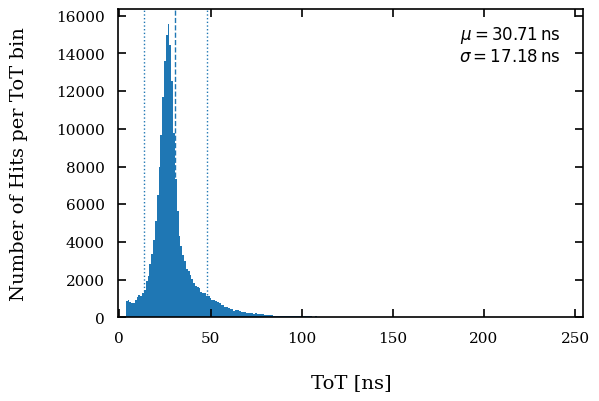

In [150]:
bin_edges=np.arange(-0.5, 255.5)

mean_tot = np.mean(totall)
std_tot = np.std(totall)
plt.hist(totall, bins=bin_edges)
plt.axvline(mean_tot, linestyle='--', linewidth=1)
plt.axvline(mean_tot + std_tot, linestyle=':', linewidth=1)
plt.axvline(mean_tot - std_tot, linestyle=':', linewidth=1)

plt.text(
    0.95, 0.95,
    f"$\\mu = {mean_tot:.2f}\\,\\mathrm{{ns}}$\n$\\sigma = {std_tot:.2f}\\,\\mathrm{{ns}}$",
    transform=plt.gca().transAxes,
    ha="right", va="top"
)
plt.ylabel('Number of Hits per ToT bin')
plt.xlabel('ToT [ns]')
pth = os.path.join("analysis_plots", "tot_value_hist")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

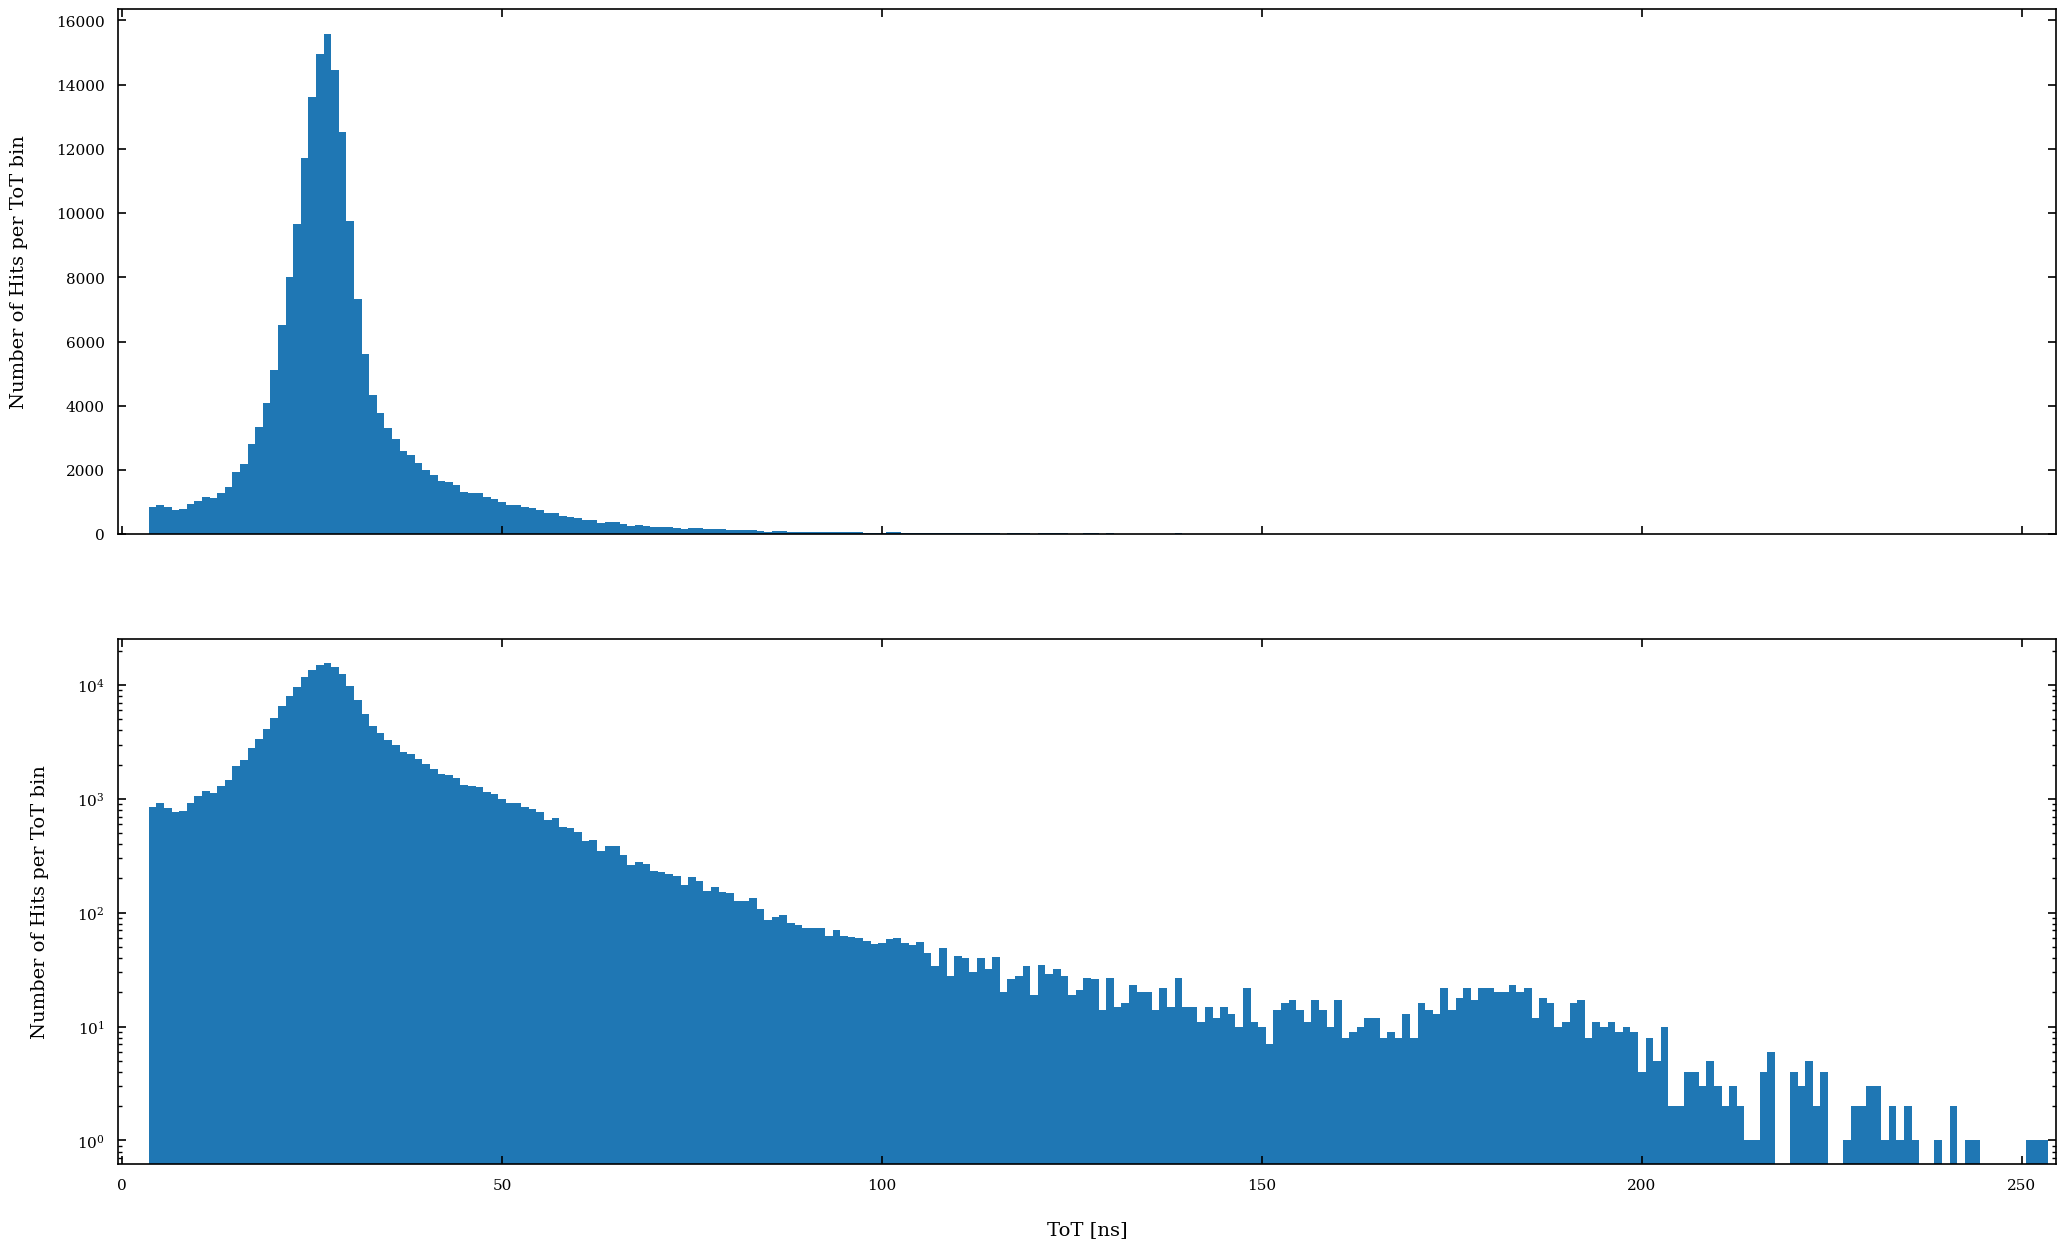

In [143]:
fig, axi = plt.subplots(2, sharex=True, figsize=(25, 15))
bin_edges=np.arange(-0.5, 255.5)
axi[0].hist(totall, bins=bin_edges)
axi[0].set_ylabel('Number of Hits per ToT bin')
axi[1].hist(totall, bins=bin_edges)
axi[1].set_yscale('log')
axi[1].set_ylabel('Number of Hits per ToT bin')
axi[1].set_xlabel('ToT [ns]')
plt.show()

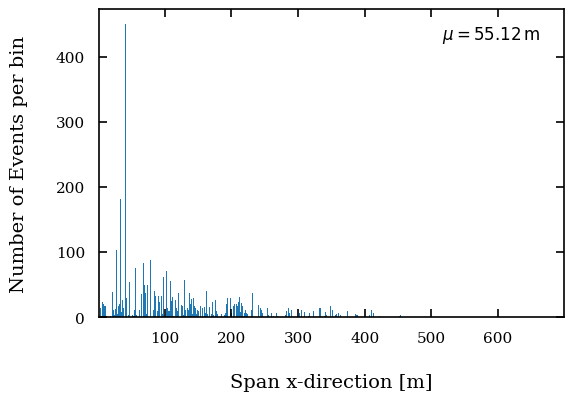

In [151]:
bin_edges=np.arange(1, 700)
plt.hist(deltaxposevt, bins=bin_edges)
mean_xspan = np.mean(deltaxposevt)
plt.text(
    0.95, 0.95,
    f"$\\mu = {mean_xspan:.2f}\\,\\mathrm{{m}}$",
    transform=plt.gca().transAxes,
    ha="right", va="top"
)
plt.ylabel('Number of Events per bin')
plt.xlabel('Span x-direction [m]')
pth = os.path.join("analysis_plots", "numOfEvents_xspan_hist")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

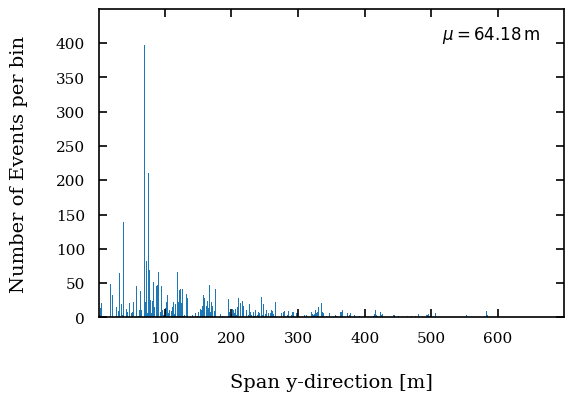

In [152]:
bin_edges=np.arange(1, 700)
plt.hist(deltayposevt, bins=bin_edges)
mean_yspan = np.mean(deltayposevt)
plt.text(
    0.95, 0.95,
    f"$\\mu = {mean_yspan:.2f}\\,\\mathrm{{m}}$",
    transform=plt.gca().transAxes,
    ha="right", va="top"
)
plt.ylabel('Number of Events per bin')
plt.xlabel('Span y-direction [m]')
pth = os.path.join("analysis_plots", "numOfEvents_yspan_hist")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

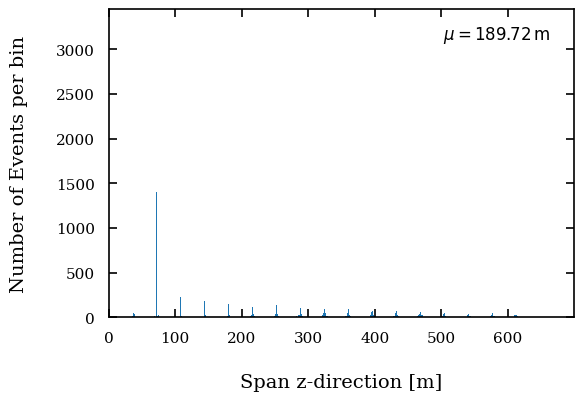

In [159]:
bin_edges=np.arange(0, 700)
plt.hist(deltazposevt, bins=bin_edges)
mean_zspan = np.mean(deltazposevt)
plt.text(
    0.95, 0.95,
    f"$\\mu = {mean_zspan:.2f}\\,\\mathrm{{m}}$",
    transform=plt.gca().transAxes,
    ha="right", va="top"
)

plt.ylabel('Number of Events per bin')
plt.xlabel('Span z-direction [m]')
pth = os.path.join("analysis_plots", "numOfEvents_zspan_hist")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

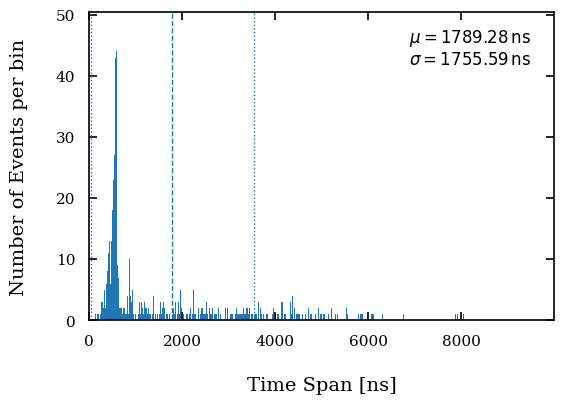

In [161]:
bin_edges=np.arange(0, 10000)
plt.hist(deltatimeevt, bins=bin_edges)
mean_tspan = np.mean(deltatimeevt)
std_tspan = np.std(deltatimeevt)

plt.axvline(mean_tspan, linestyle='--', linewidth=1)
plt.axvline(mean_tspan + std_tspan, linestyle=':', linewidth=1)
plt.axvline(mean_tspan - std_tspan, linestyle=':', linewidth=1)

plt.text(
    0.95, 0.95,
    f"$\\mu = {mean_tspan:.2f}\\,\\mathrm{{ns}}$\n$\\sigma = {std_tspan:.2f}\\,\\mathrm{{ns}}$",
    transform=plt.gca().transAxes,
    ha="right", va="top"
)

plt.ylabel('Number of Events per bin')
plt.xlabel('Time Span [ns]')
pth = os.path.join("analysis_plots", "numOfEvents_tspan_hist")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

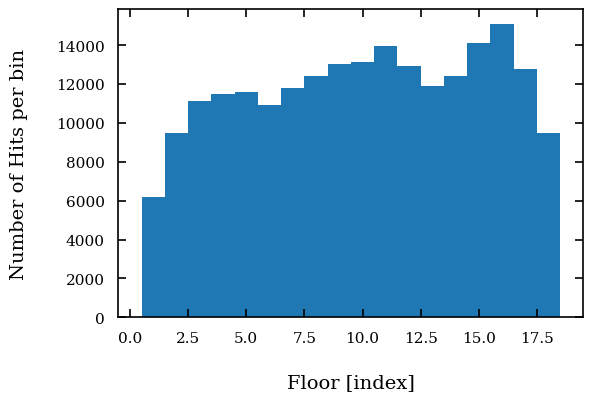

In [295]:
bin_edges=np.arange(-0.5, 20.5)
plt.hist(floorall, bins=bin_edges)
plt.ylabel('Number of Hits per bin')
plt.xlabel('Floor [index]')
plt.show()

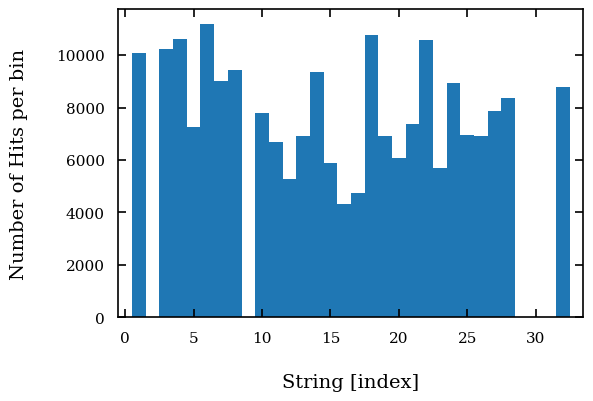

In [294]:
bin_edges=np.arange(-0.5, 34.5)
plt.hist(stringall, bins=bin_edges)
plt.ylabel('Number of Hits per bin')
plt.xlabel('String [index]')
plt.show()

In [51]:
nhittrg1 = 0
nhittrg2 = 0
nhittrg4 = 0
nhittrg5 = 0
for trg in triggermaskall:
    if((int(trg) >> trig["JTRIGGER3DSHOWER"])&(0x01)):
        nhittrg1 += 1
    if((int(trg) >> trig["JTRIGGERMXSHOWER"])&(0x01)):
        nhittrg2 += 1
    if((int(trg) >> trig["JTRIGGER3DMUON"])&(0x01)):
        nhittrg4 += 1
    if((int(trg) >> trig["JTRIGGERNB"])&(0x01)):
        nhittrg5 += 1
print(" Trigger Count: 3DSHOWER = ",nhittrg1)
print(" Trigger Count: MXSHOWER = ",nhittrg2)
print(" Trigger Count: 3DMUON = ",nhittrg4)
print(" Trigger Count: NB = ",nhittrg5)

 Trigger Count: 3DSHOWER =  30519
 Trigger Count: MXSHOWER =  154794
 Trigger Count: 3DMUON =  108564
 Trigger Count: NB =  0


Finding track direction

In [40]:
MUON_TRIGGER = 4
muon_indices = np.where(headers["trigger_mask"] == MUON_TRIGGER)[0]

In [41]:
muon_headers = headers[muon_indices]
muon_hits = triggered_hits[muon_indices]

In [360]:
def dom_earliest_hit(dom_ids, channel_ids, times, tots):
    ordered_times = np.argsort(times)
    seen_ids = set()
    kept_id_index = []
    for t in ordered_times:
        d = int(dom_ids[t])
        if d not in seen_ids:
            seen_ids.add(d)
            kept_id_index.append(t)
    kept_id_index = np.array(kept_id_index, dtype=int)

    ret_dom_ids = []
    ret_times = []
    ret_tots = []
    ret_channel_ids = []
    for i in kept_id_index:
        ret_dom_ids.append(dom_ids[i])
        ret_times.append(times[i])
        ret_tots.append(tots[i])
        ret_channel_ids.append(channel_ids[i])

    return np.array(ret_dom_ids), np.array(ret_channel_ids), np.array(ret_times), np.array(ret_tots)
            

/tmp/ipykernel_4063941/1059357632.py:3: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


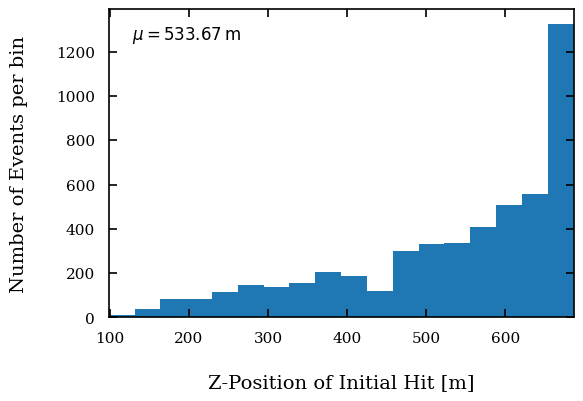

In [372]:
initial_z_values = []
for i in range(len(triggered_hits)):
    res = up_or_down(triggered_hits[i], 0.6)
    if(res is not None):
        dirrr, z, t, _, _ = res
        if(dirrr=="TRACK-LIKE DOWN" or dirrr=="TRACK-LIKE DOWN AND VERTEX-CONTAINED"):
            val = z[0]
            initial_z_values.append(val)

plt.hist(initial_z_values, bins=18)
mean_init_z = np.mean(initial_z_values)
plt.text(
    0.05, 0.95,
    f"$\\mu = {mean_init_z:.2f}\\,\\mathrm{{m}}$",
    transform=plt.gca().transAxes,
    ha="left", va="top"
)
plt.xlabel("Z-Position of Initial Hit [m]")
plt.ylabel("Number of Events per bin")
pth = os.path.join("analysis_plots", "numOfEvents_initialz_hist")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

In [195]:
def ToT_vs_charge(ar):
    c = 210 #c=210nm saturation
    ret_arr = np.ones(len(ar), dtype=float) #default p.e. 1 for ToT less than 25 ns
    x = ar-25
    #cutoff at 100 p.e.s
    xcutoff = c*100/(np.sqrt(c**2+100**2))
    #mask with default and cutoff p.e. number
    mask = (x>=0) & (x<=xcutoff)

    ret_arr[x>xcutoff] = 100
    ret_arr[mask] = c*x[mask]/(np.sqrt(c**2-x[mask]**2))
    
    return ret_arr

In [172]:
def are_causally_connected(dom_ids, channel_ids, times, hit1_index, hit2_index):
    delta_t = 100.0 #100 ns legroom
    C_WATER = 2.25*1e-1#speed of light in water in km3net m/ns
    hit1_pos = []
    hit2_pos = []
    for i in range(3):
        hit1_pos.append(pmt_dict[str(dom_ids[hit1_index])][str(channel_ids[hit1_index])][i])
        hit2_pos.append(pmt_dict[str(dom_ids[hit2_index])][str(channel_ids[hit2_index])][i])
    distance = np.linalg.norm(np.array(hit1_pos)-np.array(hit2_pos)) 

    #causally connected
    if(abs(times[hit1_index]-times[hit2_index]) <= distance/C_WATER+delta_t):
        return True
    
    #not causally connected
    else:
        return False
    
    

In [173]:
def background_rejection(event, MIN_TOT, MIN_DOM_HIT):
    validEvent = True
    dom_ids = np.array(event[:]["dom_id"])
    channel_ids = np.array(event[:]["channel_id"])
    times = np.array(event[:]["time"], dtype=float) #dtype float to avoid runtime errors
    tots = np.array(event[:]["tot"], dtype=float)

    #filtering by ToT
    dom_ids = dom_ids[tots>MIN_TOT]
    channel_ids = channel_ids[tots>MIN_TOT]
    times = times[tots>MIN_TOT]
    tots = tots[tots>MIN_TOT]

    #taking earliest hit per DOM
    dom_ids, channel_ids, times, tots = dom_earliest_hit(dom_ids, channel_ids, times, tots)
    
    #filtering by causally connectedness
    '''numOfHits = len(dom_ids)
    vertex_index = 0 #taking the first hit as the vertex
    keep = [True]*numOfHits
    for i in range(1, numOfHits):
        if(are_causally_connected(dom_ids, channel_ids, times, i, vertex_index)==False):
            keep[i] = False
            
    dom_ids = dom_ids[keep]
    channel_ids = channel_ids[keep]
    times = times[keep]
    tots = tots[keep]'''
    '''connected = np.zeros(numOfHits, dtype=bool)
    connected[0] = True
    
    for i in range(1, numOfHits):
        connected[i] = are_causally_connected(
            dom_ids, channel_ids, times, i, np.argmax(tots)
        )
    
    if np.sum(connected) < MIN_DOM_HIT:
        validEvent = False'''
    
    #filtering by DOM hits
    if(len(dom_ids) < MIN_DOM_HIT):
        validEvent = False

    return dom_ids, channel_ids, times, tots, validEvent
    

    

In [514]:
#the event that should be entered should be like triggered_hits[0]
def up_or_down(event, pc):
    PEARSON_THRESHOLD = pc
    MIN_TOT = 13
    MAXIMUM_Z = 400 #tracks starting below this value are considered vertex contained

    #background_rejection takes care of ToT/DOM hit filtering and earliest hit per DOM selection
    dom_ids, channel_ids, times, tots, validEvent = background_rejection(event, MIN_TOT = 13, MIN_DOM_HIT = 4)
    
    if(validEvent):
        #using weights for more confident track rec via ToTs
        weights = ToT_vs_charge(np.array(tots))
    
        z_positions= []
        for i in range(len(dom_ids)):
            #adding z positions of earliest hit PMTs for each dom, in time order
            z_positions.append(pmt_dict[str(dom_ids[i])][str(channel_ids[i])][2])
        
        #z_max = np.max(np.array(z_positions))
        z_initial = z_positions[0]
        #generating a linear track fit
        fit = np.polyfit(z_positions, times, 1, w = np.sqrt(weights))
        #pearson_corr_factor = np.corrcoef(z_positions, times)[0,1]
        pearson_corr_factor = weighted_pearson(z_positions, times, np.sqrt(weights))
        #return parameters
        ret_topology = ""
        if(abs(pearson_corr_factor) > PEARSON_THRESHOLD):
            if(fit[0]<0):
                ret_topology = "TRACK-LIKE DOWN"
                if(z_initial<MAXIMUM_Z):
                    ret_topology = "TRACK-LIKE DOWN AND VERTEX-CONTAINED"
            elif(z_initial == np.min(np.array(z_positions))):
                ret_topology = "TRACK-LIKE UP"
            else:
                ret_topology = "UNIDENTIFIED"
        else:
            ret_topology = "SHOWER-LIKE"
            clusters = find_clusters(causally_connectedness_matrix(dom_ids, channel_ids, times))
            additional = shower_classifier(clusters, dom_ids, channel_ids, times)
            ret_topology += " " + additional
            
        return ret_topology, z_positions, times, pearson_corr_factor, tots
    else:
        return None

In [527]:
def weighted_pearson(x, y, w):
    x = np.asarray(x)
    y = np.asarray(y)
    w = np.asarray(w)

    w_sum=np.sum(w)
    if(w_sum == 0):
        return np.nan

    mx = np.sum(w*x)/w_sum
    my = np.sum(w*y)/w_sum

    cov_xy = np.sum(w*(x-mx)*(y-my))
    var_x  = np.sum(w*(x-mx)**2)
    var_y  = np.sum(w*(y-my)**2)

    if(var_x<=0 or var_y<=0):
        return np.nan

    return cov_xy / np.sqrt(var_x * var_y)


In [118]:
def causally_connectedness_matrix(dom_ids, channel_ids, times):
    hitNum = len(dom_ids)
    matrix = np.zeros((hitNum,hitNum), dtype=bool)
    for i in range(hitNum):
        for j in range(i+1, hitNum):
            el = are_causally_connected(dom_ids, channel_ids, times, i, j)
            matrix[i, j] = el
            matrix[j,i] = el
    return matrix
    

In [126]:
def find_clusters(matrix):
    graph = nx.from_numpy_array(matrix)
    return np.array(list(nx.connected_components(graph)))

In [515]:
def shower_classifier(clusters, dom_ids, channel_ids, times):
    MIN_GAP_TAU = 30 # in m
    ret_topo = ""
    #finding cluster sizes
    cluster_sizes = []
    for cl in clusters:
        cluster_sizes.append(len(cl))
    cluster_sizes = np.array(cluster_sizes)

    #electron-neutrino signature
    if(len(clusters) == 1):
        ret_topo = "SINGLE CASCADE"
    
    #tau-neutrino signature
    else:
        sorting_inds = np.argsort(cluster_sizes)
        cl1 = clusters[sorting_inds[-1]]
        cl2 = clusters[sorting_inds[-2]]

        positions = get_positions(dom_ids, channel_ids)

        mean_cl_pos1 = np.mean([positions[i] for i in cl1], axis=0)
        mean_cl_pos2 = np.mean([positions[i] for i in cl2], axis=0)

        gap = np.linalg.norm(mean_cl_pos1-mean_cl_pos2)

        if(gap>MIN_GAP_TAU):
            ret_topo = "DOUBLE CASCADE"
    return ret_topo
        
        

In [121]:
def get_positions(dom_ids, channel_ids):
    positions = []
    for i in range(len(dom_ids)):
        xyz = []
        xyz.append(pmt_dict[str(dom_ids[i])][str(channel_ids[i])][0])
        xyz.append(pmt_dict[str(dom_ids[i])][str(channel_ids[i])][1])
        xyz.append(pmt_dict[str(dom_ids[i])][str(channel_ids[i])][2])
        positions.append(xyz)
    
    return np.array(positions)
        

In [ ]:
pip install networkx[default]

# Number of Events After Background Rejection

In [350]:
count_eventsAfterBackRej = 0
eventsAfterBackRej_indices = []
for i in range(len(triggered_hits)):
    res = up_or_down(triggered_hits[i], 0.6)
    if(res is not None):
            count_eventsAfterBackRej += 1
            eventsAfterBackRej_indices.append(i)
print(count_eventsAfterBackRej)

/tmp/ipykernel_4063941/3198573059.py:4: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


5341


# Number of Shower-like Events

## Shower-like Single Cascade

In [381]:
count_showerSingleCas = 0
showerSingleCas_indices = []
for i in range(len(triggered_hits)):
    res = up_or_down(triggered_hits[i], 0.6)
    if(res is not None):
        ret_topology, _, _, _, _ = res
        if(ret_topology == "SHOWER-LIKE SINGLE CASCADE"):
            count_showerSingleCas += 1
            showerSingleCas_indices.append(i)
print(count_showerSingleCas)

/tmp/ipykernel_4063941/1763540407.py:4: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


142


## Shower-like Double Cascade

In [519]:
k=20
gapSizes = []
counts_forGapSize = []
while(k<120):
    count_showerDoubleCas = 0
    showerDoubleCas_indices = []
    
    doubleCas_DOMHitsForEvents = []
    doubleCas_avgtotForEvents = []
    doubleCas_zspanForEvents = []
    doubleCas_tspanForEvents = []
    doubleCas_pcForEvents = []
    
    for i in range(len(triggered_hits)):
        res = up_or_down(triggered_hits[i], 0.6, k)
        if(res is not None):
            ret_topology, zpos_showerDoubleCas, t_showerDoubleCas, pc, tots = res
            if(ret_topology == "SHOWER-LIKE DOUBLE CASCADE"):
                count_showerDoubleCas += 1
                showerDoubleCas_indices.append(i)
                
                doubleCas_DOMHitsForEvents.append(len(zpos_showerDoubleCas))
                doubleCas_avgtotForEvents.append(np.mean(tots))
                doubleCas_zspanForEvents.append(np.max(zpos_showerDoubleCas)-np.min(zpos_showerDoubleCas))
                doubleCas_tspanForEvents.append(np.max(t_showerDoubleCas)-np.min(t_showerDoubleCas))
                doubleCas_pcForEvents.append(pc)
                
    gapSizes.append(k)
    counts_forGapSize.append(count_showerDoubleCas)
    k += 5

/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6, k)
/tmp/ipykernel_4063941/269889307.py:15: RankWarning: Polyfit may be p

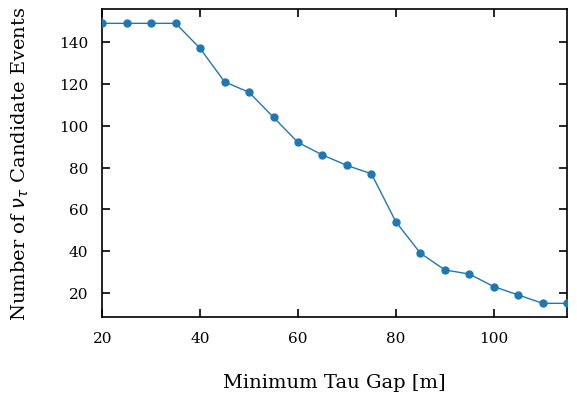

In [526]:
plt.scatter(gapSizes, counts_forGapSize, s=25, zorder=3)
plt.plot(gapSizes, counts_forGapSize, linestyle='-', linewidth=1)
plt.xlabel("Minimum Tau Gap [m]")
plt.ylabel(r'Number of $\nu_\tau$ Candidate Events')
pth = os.path.join("analysis_plots", "tauGap_vs_TauCandNum")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

## Total Shower-like Events

In [383]:
print(count_showerDoubleCas+count_showerSingleCas)

291


# Number of Track-like Events

## Down-moving Vertex Outside

In [379]:
count_trackNotVC = 0
trackNotVC_indices = []
for i in range(len(triggered_hits)):
    res = up_or_down(triggered_hits[i], 0.6)
    if(res is not None):
        ret_topology, _, _, _, _ = res
        if(ret_topology == "TRACK-LIKE DOWN"):
            count_trackNotVC += 1
            trackNotVC_indices.append(i)
print(count_trackNotVC)

/tmp/ipykernel_4063941/156721614.py:4: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


4055


## Down-moving Vertex Contained

In [380]:
count_trackVC = 0
trackVC_indices = []
for i in range(len(triggered_hits)):
    res = up_or_down(triggered_hits[i], 0.6)
    if(res is not None):
        ret_topology, _, _, _,_ = res
        if(ret_topology == "TRACK-LIKE DOWN AND VERTEX-CONTAINED"):
            count_trackVC += 1
            trackVC_indices.append(i)
print(count_trackVC)

/tmp/ipykernel_4063941/1091864242.py:4: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


988


## Up-moving

In [357]:
count_trackUp = 0
trackUp_indices = []
for i in range(len(triggered_hits)):
    res = up_or_down(triggered_hits[i], 0.6)
    if(res is not None):
        ret_topology, _, _, _, _ = res
        if(ret_topology == "TRACK-LIKE UP"):
            count_trackUp += 1
            trackUp_indices.append(i)
print(count_trackUp)

/tmp/ipykernel_4063941/345927036.py:4: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


1


## Total Number of Track-like Events

In [358]:
totalTrackNum =  count_trackNotVC + count_trackVC + count_trackUp
print(totalTrackNum)

5044


# Examples from different event signatures

In [337]:
def z_vs_t_plotter(event_index, plotSaveName, plotTitle):
    dirr, z, t, pc, tots = up_or_down(triggered_hits[event_index], 0.6)
    print(dirr)
    print(pc)
    plt.scatter(t-np.min(t), z)
    plt.xlabel('Time [ns]')
    plt.ylabel('z-position [m]')
    plt.title(plotTitle)
    pth = os.path.join("analysis_plots", plotSaveName)
    plt.savefig(pth, dpi=300, bbox_inches = "tight")
    plt.show()

In [338]:
def z_vs_t_plotter_withfit(event_index, plotSaveName, plotTitle):
    dirr, z, t, pc, tots = up_or_down(triggered_hits[event_index], 0.6)
    
    print(dirr)
    print(pc)
    weights = ToT_vs_charge(np.array(tots))
    print(weights)
    fit = np.polyfit(z, t, 1, w = np.sqrt(weights))
    
    plt.scatter(t-np.min(t), z)
    plt.xlabel('Time [ns]')
    plt.ylabel('z-position [m]')

    z_fit = np.linspace(np.min(z), np.max(z), 100)
    t_fit = fit[0] * z_fit + fit[1]
    t_fit_shifted = t_fit - np.min(t)
    plt.plot(t_fit_shifted, z_fit, '--', color="red",label="Linear fit")
    plt.title(plotTitle)
    plt.legend()
    pth = os.path.join("analysis_plots", plotSaveName)
    plt.savefig(pth, dpi=300, bbox_inches = "tight")
    plt.show()

## Shower-like Single Cascade

34
SHOWER-LIKE SINGLE CASCADE
-0.369551965629798


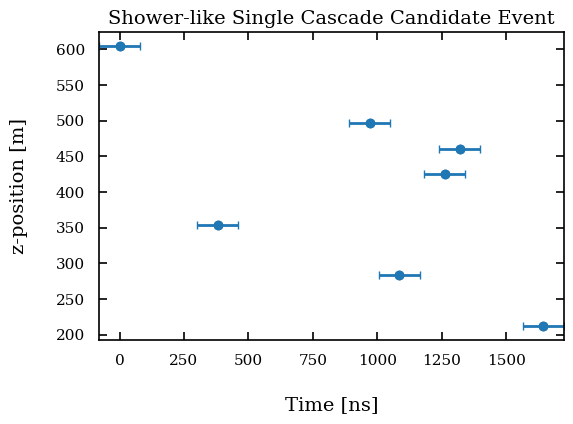

In [335]:
event_index = showerSingleCas_indices[0]
print(event_index)
z_vs_t_plotter(event_index, "showerLikeSingleCascade_Example", "Shower-like Single Cascade Candidate Event")

## Shower-like Double Cascade

6268
SHOWER-LIKE DOUBLE CASCADE
-0.5859879901076824


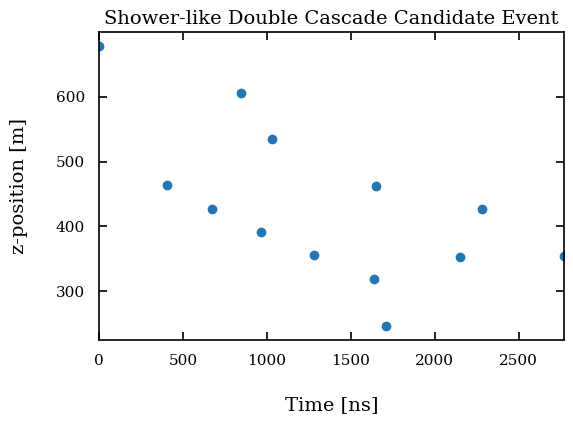

In [376]:
event_index = showerDoubleCas_indices[20]
print(event_index)
z_vs_t_plotter(event_index, "showerLikeDoubleCascade_Example", "Shower-like Double Cascade Candidate Event")

## Track-like Vertex-Contained

1
TRACK-LIKE DOWN AND VERTEX-CONTAINED
-0.9752428625666413
[ 6.00245048  5.00141784  1.         15.03841235  1.          3.00030617
  4.00072582]


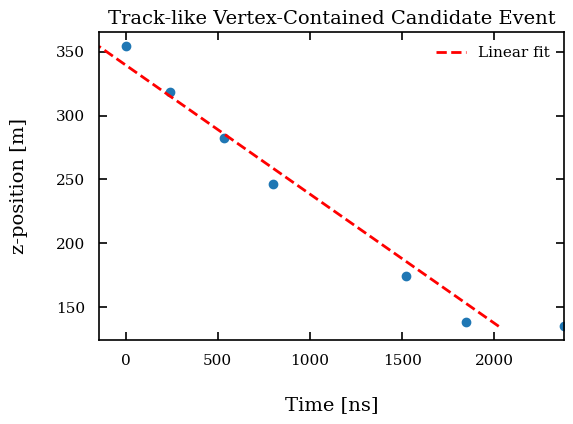

In [339]:
event_index = trackVC_indices[0]
print(event_index)
z_vs_t_plotter_withfit(event_index, "trackLikeVC_Example", "Track-like Vertex-Contained Candidate Event")

## Track-like Down (Atmospheric)

5
TRACK-LIKE DOWN
-0.9997090922147754
[ 1.          1.          4.00072582  7.00389213  5.00141784  8.00581131
  1.         15.03841235  1.          1.        ]


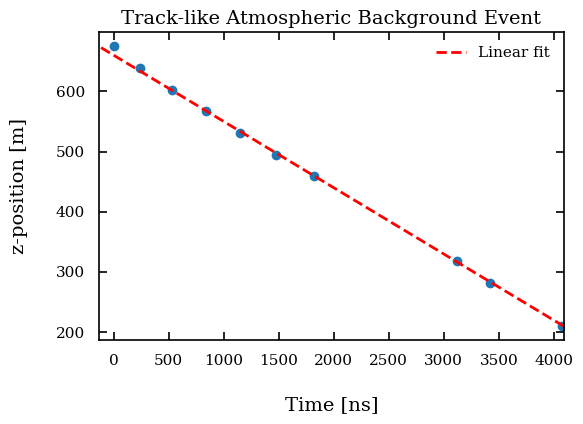

In [340]:
event_index = trackNotVC_indices[2]
print(event_index)
z_vs_t_plotter_withfit(event_index, "trackLikeNotVC_Example", "Track-like Atmospheric Background Event")

## Track-like Up-Moving

7084
TRACK-LIKE UP
0.9764649583728564


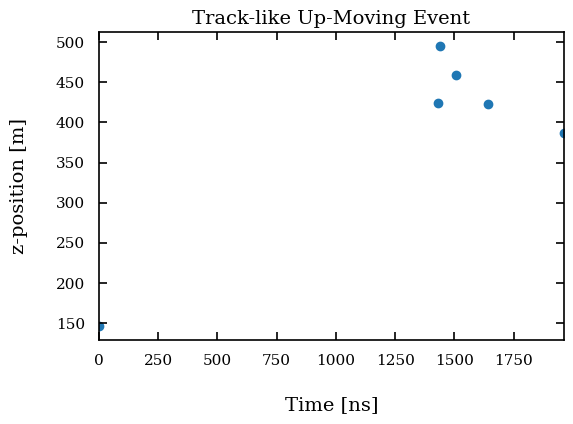

In [359]:
event_index = trackUp_indices[0]
print(event_index)
z_vs_t_plotter(event_index, "trackLikeUp_Example", "Track-like Up-Moving Event")

# Overall Data Visualization

In [392]:
print(track_vals)
print(shower_vals)

[4055, 988, 1]
[142, 149]


In [394]:
print(sum(track_vals))
print(sum(shower_vals))

5044
291


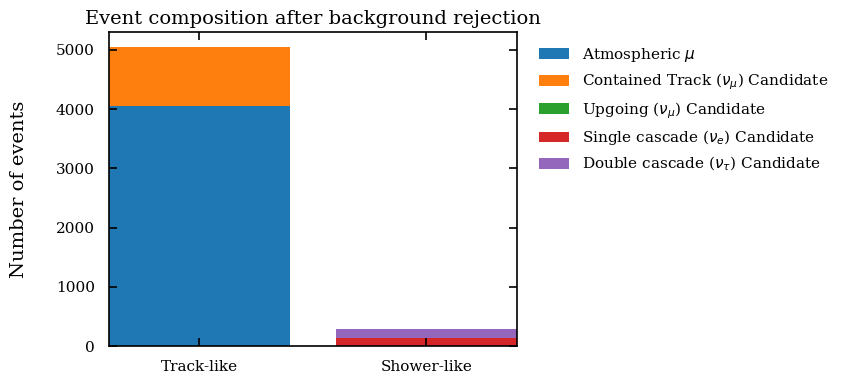

In [391]:


labels = ['Track-like', 'Shower-like']

# stack values
track_vals = [count_trackNotVC, count_trackVC, count_trackUp]
shower_vals = [count_showerSingleCas, count_showerDoubleCas]

fig, ax = plt.subplots(figsize=(7,4))

bottom_track = 0
for val, lab in zip(track_vals,
                    ["Atmospheric $\mu$", r"Contained Track ($\nu_\mu$) Candidate", r"Upgoing ($\nu_\mu$) Candidate"]):
    ax.bar('Track-like', val, bottom=bottom_track, label=lab)
    bottom_track += val

bottom_shower = 0
for val, lab in zip(shower_vals,
                    [r"Single cascade ($\nu_e$) Candidate", r"Double cascade ($\nu_\tau$) Candidate"]):
    ax.bar('Shower-like', val, bottom=bottom_shower, label=lab)
    bottom_shower += val

ax.set_ylabel('Number of events')
ax.set_title('Event composition after background rejection')
ax.legend(loc='upper left',
    bbox_to_anchor=(1.02, 1.0),frameon=False)

plt.tight_layout()
fig.subplots_adjust(right=0.75)
pth = os.path.join("analysis_plots", "FINAL_eventComposition")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()


# Statistics for Different Event Types

In [407]:
def statistics(eventIdentifier):
    count = 0
    indices = []
    
    DOMHitsForEvents = []
    avgtotForEvents = []
    zspanForEvents = []
    tspanForEvents = []
    pcForEvents = []
    
    for i in range(len(triggered_hits)):
        res = up_or_down(triggered_hits[i], 0.6)
        if(res is not None):
            ret_topology, zpos, t, pc, tots = res
            if(ret_topology == eventIdentifier):
                count += 1
                indices.append(i)
                
                DOMHitsForEvents.append(len(zpos))
                avgtotForEvents.append(np.mean(tots))
                zspanForEvents.append(np.max(zpos)-np.min(zpos))
                tspanForEvents.append(np.max(t)-np.min(t))
                pcForEvents.append(pc)
    return DOMHitsForEvents, avgtotForEvents, zspanForEvents, tspanForEvents, abs(np.array(pcForEvents))

In [511]:
#stat_id: 0:DOmHits, 1:avgtot, 2:zspan, 3:tspan, 4:pc
import matplotlib.ticker as mticker
def histogram_plotter(eventIdentifier, stat_id):
    keys = ["Dom Hits", "Average ToT [ns]", "Span z-direction [m]", "Time Span [ns]", "Pearson Coefficient"]
    if(eventIdentifier=="TRACK-LIKE DOWN"):
        color = "blue"
        plotTitle = r'Atmospheric $\mu$'
    elif(eventIdentifier=="TRACK-LIKE DOWN AND VERTEX-CONTAINED"):
        color = "orange"
        plotTitle = r'Contained Track ($\nu_\mu$) Candidate'
    elif(eventIdentifier=="SHOWER-LIKE SINGLE CASCADE"):
        color = "red"
        plotTitle = r'Single Cascade ($\nu_e$) Candidate'
    elif(eventIdentifier=="SHOWER-LIKE DOUBLE CASCADE"):
        color = "purple"
        plotTitle = r'Double Cascade ($\nu_\tau$) Candidate'
    else:
        print("enter valid eventIdentifier")
    res = statistics(eventIdentifier)
    if(stat_id == 0):
        plt.hist(res[stat_id], bins = range(max(res[stat_id])), histtype="step", linewidth=2, color = color)
        plt.xlabel(keys[stat_id])
        plt.ylabel("Number of Events per bin")
        if(color=="red" or color=="purple"):
            plt.xticks(range(max(res[stat_id])))
        mean_stat = np.mean(res[stat_id])
        plt.text(
            0.95, 0.95,
            f"$\\mu = {mean_stat:.2f}\\,\\mathrm{{hits}}$",
            transform=plt.gca().transAxes,
            ha="right", va="top"
        )
        plotSaveName = eventIdentifier+"_domhits"
    elif(stat_id==1):
        iqr = np.subtract(*np.percentile(res[stat_id], [75, 25]))
        bin_width = 2 * iqr / (len(res[stat_id]) ** (1/3))
        bins = int((max(res[stat_id]) - min(res[stat_id])) / bin_width)

        ax = plt.gca()

        ax.set_xlim(10, 75)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(10))
        ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))
        
        ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)
        
        plt.hist(res[stat_id], bins = bins, histtype="step", linewidth=2, color = color)
        plt.xlabel(keys[stat_id])
        plt.ylabel("Number of Events per bin")


        mean_stat = np.mean(res[stat_id])
        plt.text(
            0.95, 0.95,
            f"$\\mu = {mean_stat:.2f}\\,\\mathrm{{ns}}$",
            transform=plt.gca().transAxes,
            ha="right", va="top"
        )
        
        plotSaveName = eventIdentifier+"_avgtot"
    elif(stat_id==2):
        plt.hist(res[stat_id], bins = 18, histtype="step", linewidth=2, color = color)
        plt.xlabel(keys[stat_id])
        plt.ylabel("Number of Events per bin")


        mean_stat = np.mean(res[stat_id])
        plt.text(
            0.95, 0.95,
            f"$\\mu = {mean_stat:.2f}\\,\\mathrm{{m}}$",
            transform=plt.gca().transAxes,
            ha="right", va="top"
        )
        plotSaveName = eventIdentifier+"_spanz"
    elif(stat_id==3):
        plt.hist(res[stat_id], bins = int(np.sqrt(len(res[stat_id])))+1, histtype="step", linewidth=2, color = color)
        plt.xlabel(keys[stat_id])
        plt.ylabel("Number of Events per bin")
        mean_stat = np.mean(res[stat_id])
        plt.text(
            0.95, 0.95,
            f"$\\mu = {mean_stat:.2f}\\,\\mathrm{{ns}}$",
            transform=plt.gca().transAxes,
            ha="right", va="top"
        )
        plotSaveName = eventIdentifier+"_spant"
    elif(stat_id ==4):
        plt.hist(res[stat_id], bins = 12, histtype="step", linewidth=2, color = color, density=False)
        plt.xlabel(keys[stat_id])
        plt.ylabel("Number of Events per bin")

        ax=plt.gca()
        ymax = ax.get_ylim()[1]
        if(color=="red" or color=="purple"):
            ax.set_yticks(np.arange(0, ymax+1, 2))
        
        plotSaveName = eventIdentifier+"_pc"
    else:
        print("enter valid stat_id")
    plt.title(plotTitle)
    pth = os.path.join("analysis_plots/eventSpecificStats", plotSaveName)
    plt.savefig(pth, dpi=300, bbox_inches = "tight")
    plt.show()
    

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


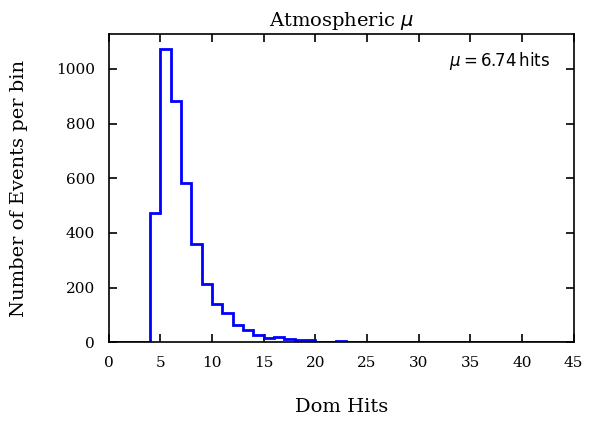

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


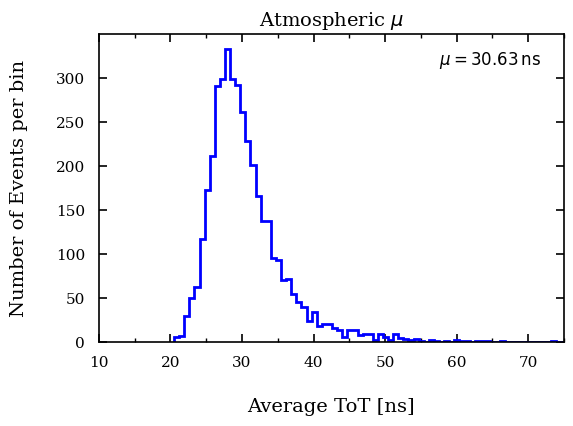

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


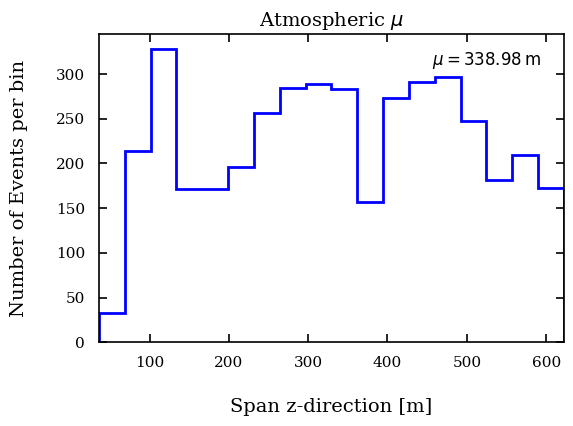

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


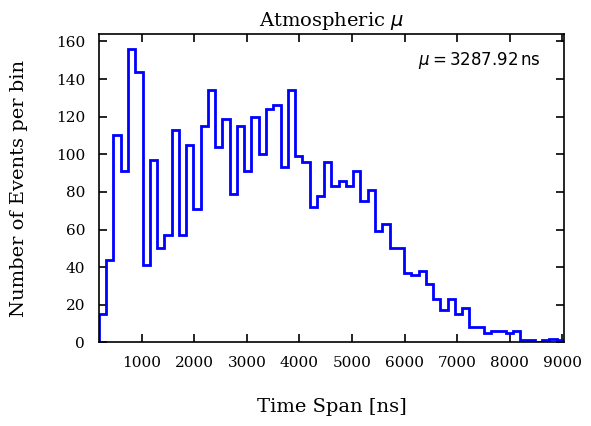

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


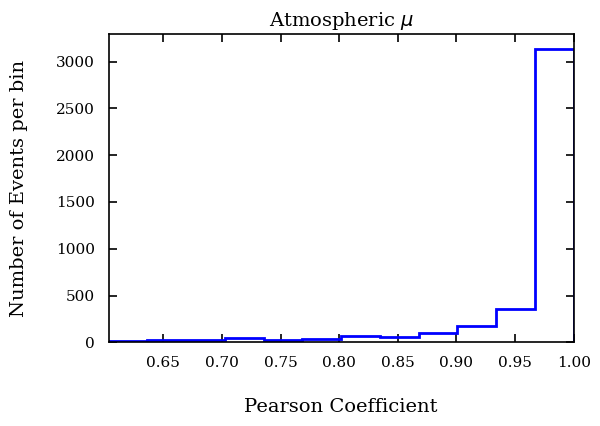

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


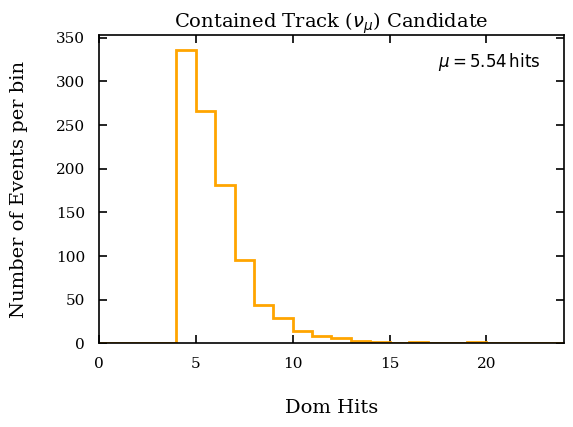

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


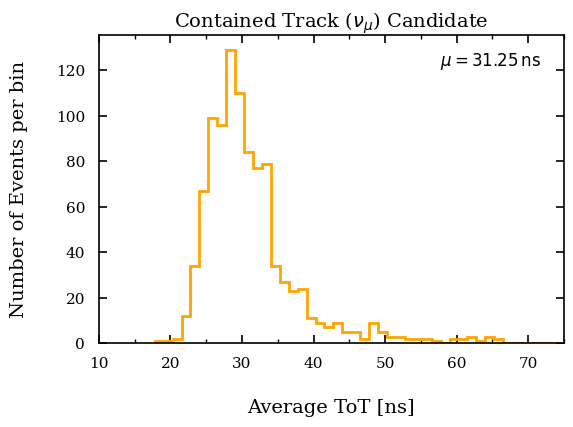

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


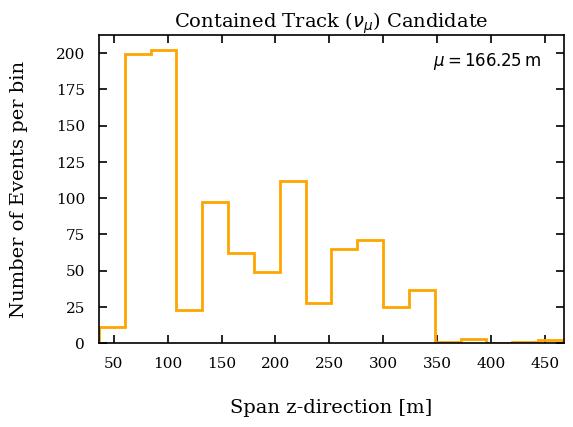

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


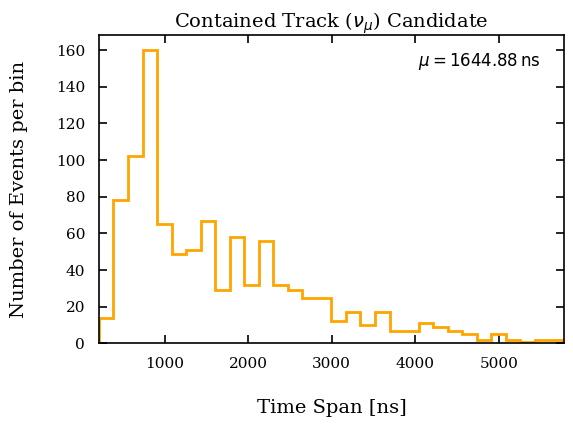

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


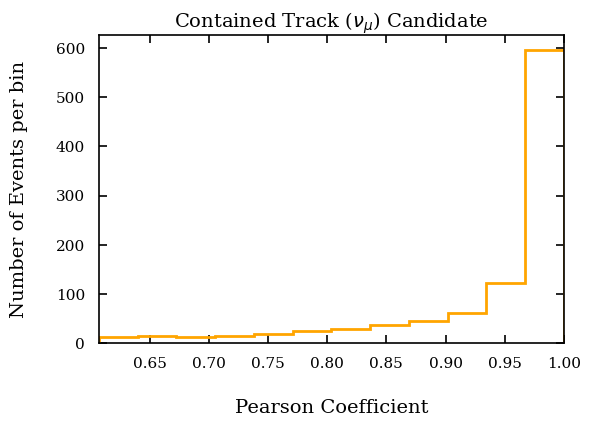

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


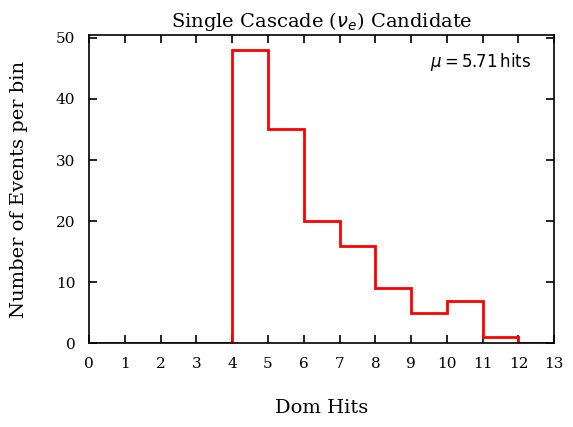

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


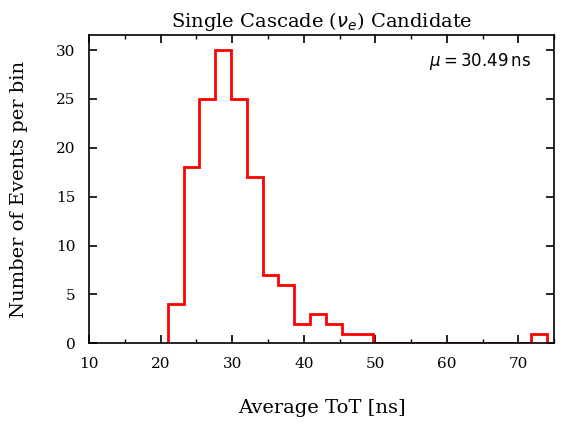

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


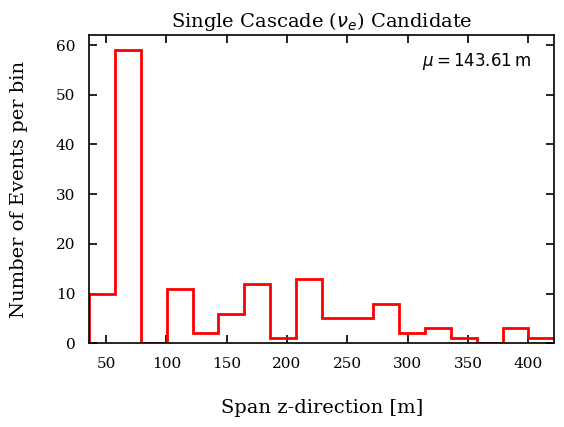

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


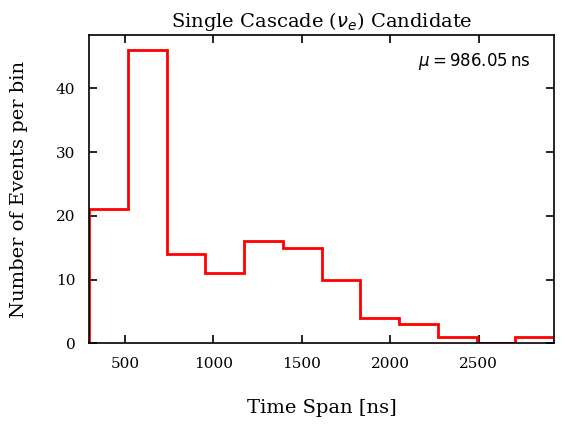

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


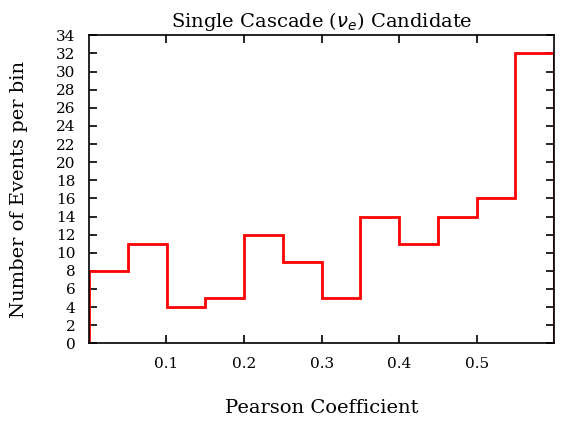

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


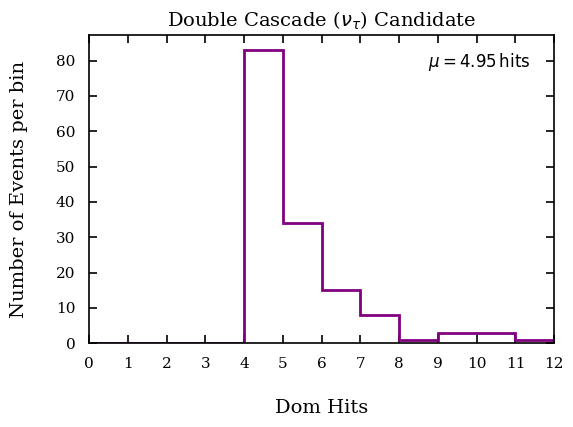

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


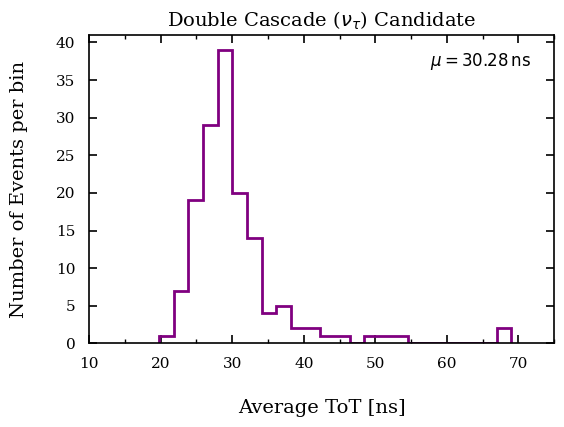

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


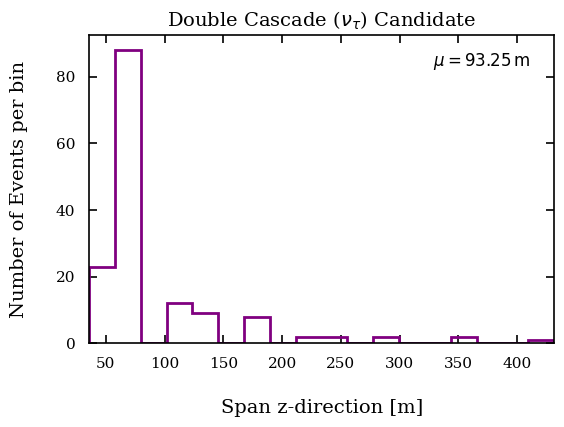

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


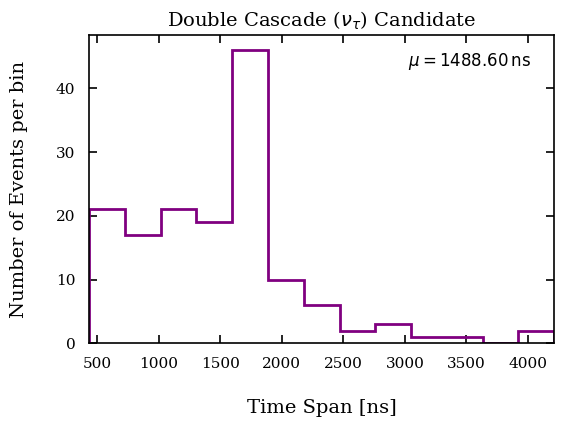

/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


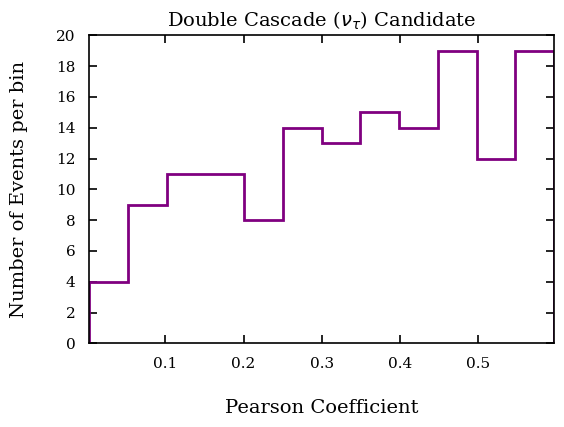

In [512]:
event_identifiers = ["TRACK-LIKE DOWN", "TRACK-LIKE DOWN AND VERTEX-CONTAINED", "SHOWER-LIKE SINGLE CASCADE", "SHOWER-LIKE DOUBLE CASCADE"]
for i in range(len(event_identifiers)):
    for j in range(5):
        histogram_plotter(event_identifiers[i], j)
        

In [502]:
histogram_plotter("TRACK-LIKE DOWN AND VERTEX-CONTAINED", 0)

enter valid eventIdentifier


/tmp/ipykernel_4063941/3209546676.py:12: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], 0.6)


ValueError: max() arg is an empty sequence

# Pearson Threshold

In [214]:
pc_lim = 0
pc_lims = []
numOfShowerEvents = []
while pc_lim <= 1:
    ct = 0
    for i in range(len(triggered_hits)):
        res = up_or_down(triggered_hits[i], pc_lim)
        if(res is not None):
            ret_topology, _, _, _ = res
            if(ret_topology == "SHOWER-LIKE SINGLE CASCADE" or ret_topology == "SHOWER-LIKE DOUBLE CASCADE"):
                ct += 1 
    pc_lims.append(pc_lim)
    numOfShowerEvents.append(ct)

    pc_lim += 0.05

/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be poorly conditioned
  res = up_or_down(triggered_hits[i], pc_lim)
/tmp/ipykernel_4063941/4079810096.py:7: RankWarning: Polyfit may be p

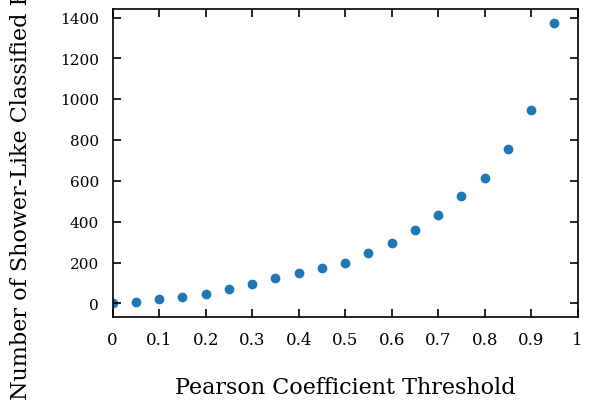

In [215]:
plt.scatter(pc_lims, numOfShowerEvents)
plt.xticks(ticks = np.linspace(0,1, 11), labels = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9", "1"], fontsize = 12)
plt.ylabel("Number of Shower-Like Classified Events", fontsize = 16)
plt.xlabel("Pearson Coefficient Threshold", fontsize=16)
pth = os.path.join("analysis_plots", "showerlike_vs_pc")
plt.savefig(pth, dpi=300, bbox_inches = "tight")
plt.show()

## Likely fit to this plot

In [226]:

from scipy.optimize import curve_fit

def lin_exp(x, a, b, k):
    return a*x + b*np.exp(k*x)

params, cov = curve_fit(
    lin_exp, pc_lims, numOfShowerEvents,
    bounds=(0, np.inf),
    maxfev=10000
)




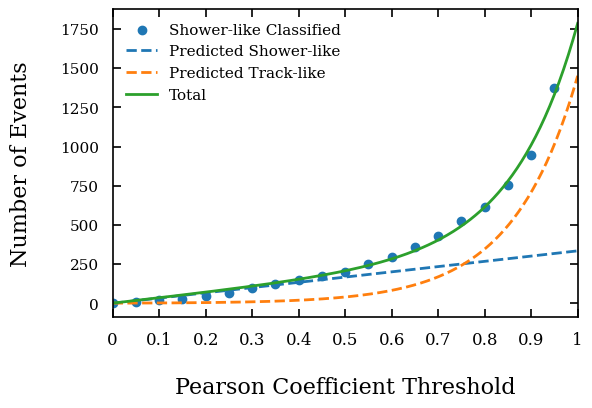

In [232]:


x_fit = np.linspace(0, 1, 300)
a, b, k = params

plt.scatter(pc_lims, numOfShowerEvents, label="Shower-like Classified")
plt.plot(x_fit, a*x_fit, '--', label="Predicted Shower-like")
plt.plot(x_fit, b*np.exp(k*x_fit), '--', label="Predicted Track-like")
plt.plot(x_fit, lin_exp(x_fit, *params), label="Total")
plt.xticks(ticks = np.linspace(0,1, 11), labels = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9", "1"], fontsize = 12)
plt.legend()

plt.ylabel("Number of Events", fontsize = 16)
plt.xlabel("Pearson Coefficient Threshold", fontsize=16)

pth = os.path.join("analysis_plots", "showerlike_vs_pc_FIT")
plt.savefig(pth, dpi=300, bbox_inches = "tight")

plt.show()





SHOWER-LIKE DOUBLE CASCADE
0.11084931788517757


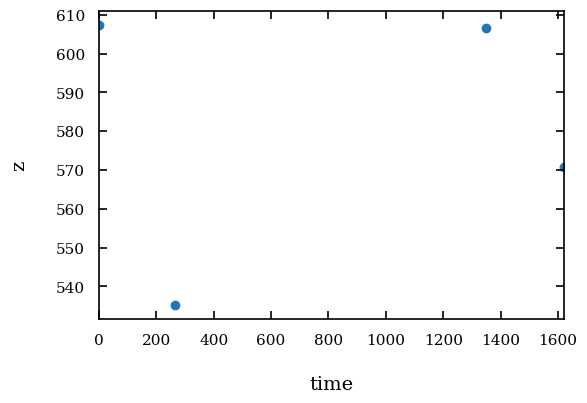

In [165]:
dirr, z, t, pc = up_or_down(triggered_hits[9363], 0.6)
print(dirr)
print(pc)
plt.scatter(t-np.min(t), z)
plt.xlabel('time')
plt.ylabel('z')
plt.show()

In [100]:
import os 
os.makedirs("plots", exist_ok =True)


In [ ]:
for i in inds:
    dirr, z, t = up_or_down(triggered_hits[i])
    fig, ax = plt.subplots()
    ax.plot(t, z)
    ax.set_title(f"Event {i}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Z Position")

    nm = f"plot_{i}.png"
    path = os.path.join("plots", nm)
    plt.savefig(path, dpi=300, bbox_inches = "tight")
    plt.close(fig)





In [68]:
import os 
os.makedirs("pc_0.6_plots", exist_ok =True)


In [50]:
#the event that should be entered should be like triggered_hits[0]
def xy_plot(event):
    PEARSON_THRESHOLD = 0.30
    MIN_TOT = 2
    dom_ids = np.array(event[:]["dom_id"])
    channel_ids = np.array(event[:]["channel_id"])
    times = np.array(event[:]["time"])
    tots = np.array(event[:]["tot"])

    #filtering by ToT
    dom_ids = dom_ids[tots>MIN_TOT]
    channel_ids = channel_ids[tots>MIN_TOT]
    times = times[tots>MIN_TOT]
    tots = tots[tots>MIN_TOT]
    print(tots)

    dom_ids, channel_ids, times, tots = dom_earliest_hit(dom_ids, channel_ids, times, tots)

    #using weights for more confident track tec via ToTs
    weights = ToT_vs_charge(np.array(tots))

    x_positions= []
    y_positions = []
    count = 0
    for i in range(len(dom_ids)):
        #adding x and y positions of earliest hit PMTs for each dom, in time order
        x_positions.append(pmt_dict[str(dom_ids[i])][str(channel_ids[i])][0])
        y_positions.append(pmt_dict[str(dom_ids[i])][str(channel_ids[i])][1])
        count += 1
    print(count)
    
    
    return x_positions, y_positions

In [61]:
import os
os.makedirs("analysis_plots", exist_ok =True)